In [1]:
import pandas as pd
pd.set_option('display.max_rows', 500)

In [2]:
data = pd.read_csv("ESGData.csv")

In [3]:
df = data.copy()
df = df.iloc[3266:]

In [4]:
df.head(3)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,Unnamed: 67
3266,Afghanistan,AFG,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,25.700000,27.250000,28.500000,30.000000,31.100000,32.45000,33.800000,35.4,NaN,NaN
3267,Afghanistan,AFG,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,89.500000,71.500000,97.700000,97.700000,93.430878,97.70000,97.700000,97.7,NaN,NaN
3268,Afghanistan,AFG,Adjusted savings: natural resources depletion ...,NY.ADJ.DRES.GN.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,0.288231,0.295242,0.355951,0.344837,0.397921,0.36222,0.381654,NaN,NaN,NaN


In [5]:
df = df.drop(columns=['Unnamed: 67'])

In [6]:
df.columns.tolist()

['Country Name',
 'Country Code',
 'Indicator Name',
 'Indicator Code',
 '1960',
 '1961',
 '1962',
 '1963',
 '1964',
 '1965',
 '1966',
 '1967',
 '1968',
 '1969',
 '1970',
 '1971',
 '1972',
 '1973',
 '1974',
 '1975',
 '1976',
 '1977',
 '1978',
 '1979',
 '1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018',
 '2019',
 '2020',
 '2021',
 '2022']

In [7]:
# Filter the data for specific 'Indicator Name' values
filtered_indicators = [
    'Life expectancy at birth, total (years)',  
    'GDP growth (annual %)',
    'Standardised Precipitation-Evapotranspiration Index'
]
df_filtered = df[df['Indicator Name'].isin(filtered_indicators)]

# Transpose the year columns and create a new DataFrame
df_formatted = pd.melt(df_filtered, 
                       id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'], 
                       var_name='Year', 
                       value_name='Value')

# Display the first few rows of the formatted DataFrame
df_formatted.head()

,Country Name,Country Code,Indicator Name,Indicator Code,Year,Value
0,Afghanistan,AFG,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,1960,NaN
1,Afghanistan,AFG,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1960,32.53500
2,Afghanistan,AFG,Standardised Precipitation-Evapotranspiration ...,EN.CLC.SPEI.XD,1960,0.76152
3,Albania,ALB,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,1960,NaN
4,Albania,ALB,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1960,54.43900


In [8]:
# Splitting df_formatted into separate DataFrames for each Indicator Name
life_expectancy_df = df_formatted[df_formatted['Indicator Name'] == 'Life expectancy at birth, total (years)'][
    ['Country Name', 'Country Code', 'Year', 'Value']
].rename(columns={'Value': 'Life expectancy at birth, total (years)'})

gdp_growth_df = df_formatted[df_formatted['Indicator Name'] == 'GDP growth (annual %)'][
    ['Country Name', 'Country Code', 'Year', 'Value']
].rename(columns={'Value': 'GDP growth (annual %)'})

spei_df = df_formatted[df_formatted['Indicator Name'] == 'Standardised Precipitation-Evapotranspiration Index'][
    ['Country Name', 'Country Code', 'Year', 'Value']
].rename(columns={'Value': 'Standardised Precipitation-Evapotranspiration Index'})

# Merging the DataFrames on 'Country Name', 'Country Code', and 'Year' to combine them
merged_df = life_expectancy_df.merge(gdp_growth_df, on=['Country Name', 'Country Code', 'Year'], how='outer')\
                              .merge(spei_df, on=['Country Name', 'Country Code', 'Year'], how='outer')

# Display the first few rows of the final merged DataFrame
merged_df.head()

,Country Name,Country Code,Year,"Life expectancy at birth, total (years)",GDP growth (annual %),Standardised Precipitation-Evapotranspiration Index
0,Afghanistan,AFG,1960,32.535,NaN,0.761520
1,Albania,ALB,1960,54.439,NaN,1.341166
2,Algeria,DZA,1960,40.532,NaN,-0.304291
3,Andorra,AND,1960,NaN,NaN,1.628674
4,Angola,AGO,1960,38.211,NaN,1.592433


In [9]:
merged_df.loc[(merged_df['Country Name'] == 'Austria')].sort_values(by ='Year')

,Country Name,Country Code,Year,"Life expectancy at birth, total (years)",GDP growth (annual %),Standardised Precipitation-Evapotranspiration Index
9,Austria,AUT,1960,68.585610,NaN,0.817471
202,Austria,AUT,1961,69.577317,5.537979,-0.945359
395,Austria,AUT,1962,69.309512,2.648675,0.665004
588,Austria,AUT,1963,69.443659,4.138268,-1.061164
781,Austria,AUT,1964,69.921951,6.124354,0.193018
974,Austria,AUT,1965,69.722195,3.480175,1.981050
1167,Austria,AUT,1966,70.045854,5.642861,1.620247
1360,Austria,AUT,1967,69.917805,3.008048,-0.605576
1553,Austria,AUT,1968,70.057561,4.472313,-0.670223
1746,Austria,AUT,1969,69.833171,6.275867,-0.890059


In [10]:
# Selecting specified columns
selected_df_3 = merged_df[['Country Name', 'Country Code', 'Year', 'Standardised Precipitation-Evapotranspiration Index']].copy()

# Sorting by 'Country Name' and 'Year' to prepare for rolling calculations
selected_df_3 = selected_df_3.sort_values(by=['Country Name', 'Year'])

# Creating Moving Average and STD columns for the specified time frames (2, 3, 5, and 10 years)
# time_frames = [2, 3, 5, 10]
time_frames = [2, 3, 5, 10]
for window in time_frames:
    selected_df_3[f'SPEI Moving_Avg_{window}Y'] = selected_df_3.groupby('Country Name')['Standardised Precipitation-Evapotranspiration Index'].transform(lambda x: x.rolling(window, min_periods=1).mean())
    # selected_df[f'STD_{window}Y'] = selected_df.groupby('Country Name')['Life expectancy at birth, total (years)'].transform(lambda x: x.rolling(window, min_periods=1).std())

# Displaying the first few rows of the updated DataFrame
selected_df_3.loc[selected_df_3['Country Name'] == 'Austria']

,Country Name,Country Code,Year,Standardised Precipitation-Evapotranspiration Index,SPEI Moving_Avg_2Y,SPEI Moving_Avg_3Y,SPEI Moving_Avg_5Y,SPEI Moving_Avg_10Y
9,Austria,AUT,1960,0.817471,0.817471,0.817471,0.817471,0.817471
202,Austria,AUT,1961,-0.945359,-0.063944,-0.063944,-0.063944,-0.063944
395,Austria,AUT,1962,0.665004,-0.140178,0.179039,0.179039,0.179039
588,Austria,AUT,1963,-1.061164,-0.198080,-0.447173,-0.131012,-0.131012
781,Austria,AUT,1964,0.193018,-0.434073,-0.067714,-0.066206,-0.066206
974,Austria,AUT,1965,1.981050,1.087034,0.370968,0.166510,0.275003
1167,Austria,AUT,1966,1.620247,1.800649,1.264772,0.679631,0.467181
1360,Austria,AUT,1967,-0.605576,0.507335,0.998574,0.425515,0.333086
1553,Austria,AUT,1968,-0.670223,-0.637900,0.114816,0.503703,0.221607
1746,Austria,AUT,1969,-0.890059,-0.780141,-0.721953,0.287088,0.110441


In [11]:
selected_df_3.columns.tolist()

['Country Name',
 'Country Code',
 'Year',
 'Standardised Precipitation-Evapotranspiration Index',
 'SPEI Moving_Avg_2Y',
 'SPEI Moving_Avg_3Y',
 'SPEI Moving_Avg_5Y',
 'SPEI Moving_Avg_10Y']

In [12]:
selected_df_3['Year'] = selected_df_3['Year'].astype(int)

In [13]:
selected_df_3

,Country Name,Country Code,Year,Standardised Precipitation-Evapotranspiration Index,SPEI Moving_Avg_2Y,SPEI Moving_Avg_3Y,SPEI Moving_Avg_5Y,SPEI Moving_Avg_10Y
0,Afghanistan,AFG,1960,0.761520,0.761520,0.761520,0.761520,0.761520
193,Afghanistan,AFG,1961,-0.076736,0.342392,0.342392,0.342392,0.342392
386,Afghanistan,AFG,1962,-0.665528,-0.371132,0.006419,0.006419,0.006419
579,Afghanistan,AFG,1963,0.216942,-0.224293,-0.175107,0.059050,0.059050
772,Afghanistan,AFG,1964,0.488956,0.352949,0.013457,0.145031,0.145031
...,...,...,...,...,...,...,...,...
11386,Zimbabwe,ZWE,2018,-0.690707,0.303161,-0.288977,-0.701846,-0.533974
11579,Zimbabwe,ZWE,2019,-0.301619,-0.496163,0.101567,-0.648865,-0.520342
11772,Zimbabwe,ZWE,2020,-0.204054,-0.252837,-0.398793,-0.274521,-0.516990
11965,Zimbabwe,ZWE,2021,-0.549090,-0.376572,-0.351588,-0.089688,-0.608330


In [14]:
selected_df_3['Country Name'].nunique()

193

In [15]:
selected_df_3.columns.tolist()

['Country Name',
 'Country Code',
 'Year',
 'Standardised Precipitation-Evapotranspiration Index',
 'SPEI Moving_Avg_2Y',
 'SPEI Moving_Avg_3Y',
 'SPEI Moving_Avg_5Y',
 'SPEI Moving_Avg_10Y']

## Training and testing the model for indicator 3

In [16]:
!pip install scikit-learn

In [17]:
import logging
from sklearn.ensemble import RandomForestRegressor

# Define year variables for training and prediction
TRAIN_START_YEAR = 1990
TRAIN_END_YEAR = 2009
PREDICTION_START_YEAR = 2010
PREDICTION_END_YEAR = 2019

# Setting up logging configuration
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
logger = logging.getLogger()

# Splitting data into training (2000-2019) set and setting up prediction years
train_df_3 = selected_df_3[(selected_df_3['Year'] >= TRAIN_START_YEAR) & (selected_df_3['Year'] <= TRAIN_END_YEAR)].dropna(subset=['Standardised Precipitation-Evapotranspiration Index'])
prediction_years = range(PREDICTION_START_YEAR, PREDICTION_END_YEAR + 1)

# Preparing training data for the model
X_train = train_df_3[['Year', 'SPEI Moving_Avg_2Y', 'SPEI Moving_Avg_3Y', 'SPEI Moving_Avg_5Y', 'SPEI Moving_Avg_10Y']].values
y_train = train_df_3['Standardised Precipitation-Evapotranspiration Index'].values

# Initializing and training the Random Forest model on all training data
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)
logger.info(f"Model trained on all countries' data ({TRAIN_START_YEAR}-{TRAIN_END_YEAR}). Starting recursive forecasting.")

# Dictionary to store predictions for each country
country_recursive_predictions_rf = {}

# Recursive forecasting for each country separately with detailed logging
for country in train_df_3['Country Name'].unique():
    logger.info(f"Processing country: {country}")

    # Get the last available data point for the country to start recursive prediction
    country_data = train_df_3[train_df_3['Country Name'] == country].iloc[-1].copy()
    predictions_per_country = {country_data['Year']: country_data['Standardised Precipitation-Evapotranspiration Index']}

    # Recursive prediction loop from PREDICTION_START_YEAR to PREDICTION_END_YEAR
    for year in prediction_years:
        country_data['Year'] = year
        
        # Logging the input data used for this prediction
        logger.info(f"Prediction inputs for {country} in {year}: Year={year}, "
                    f"SPEI Moving_Avg_2Y={country_data['SPEI Moving_Avg_2Y']}, "
                    f"SPEI Moving_Avg_3Y={country_data['SPEI Moving_Avg_3Y']}, "
                    f"SPEI Moving_Avg_5Y={country_data['SPEI Moving_Avg_5Y']}, "
                    f"SPEI Moving_Avg_10Y={country_data['SPEI Moving_Avg_10Y']}")
        
        # Preparing the features for the current prediction
        X_test = country_data[['Year', 'SPEI Moving_Avg_2Y', 'SPEI Moving_Avg_3Y', 'SPEI Moving_Avg_5Y', 'SPEI Moving_Avg_10Y']].values.reshape(1, -1)
        
        # Predicting life expectancy for the current year
        predicted_value = model_rf.predict(X_test)[0]
        logger.info(f"Predicted value for {country} in {year}: {predicted_value}")
        
        # Update the prediction in the dictionary
        predictions_per_country[year] = predicted_value
        
        # Update the features for the next prediction year based on the new prediction
        country_data['Standardised Precipitation-Evapotranspiration Index)'] = predicted_value
        country_data['SPEI Moving_Avg_2Y'] = (predictions_per_country.get(year - 1, predicted_value) + predicted_value) / 2
        country_data['SPEI Moving_Avg_3Y'] = (predictions_per_country.get(year - 2, predicted_value) +
                                         predictions_per_country.get(year - 1, predicted_value) + predicted_value) / 3
        country_data['SPEI Moving_Avg_5Y'] = (sum(predictions_per_country.get(y, predicted_value) for y in range(year - 4, year + 1)) / 5)
        country_data['SPEI Moving_Avg_10Y'] = (sum(predictions_per_country.get(y, predicted_value) for y in range(year - 9, year + 1)) / 10)

    # Store the predictions for the country
    country_recursive_predictions_rf[country] = predictions_per_country


2024-11-11 16:55:58,829 - INFO - Model trained on all countries' data (1990-2009). Starting recursive forecasting.
2024-11-11 16:55:58,829 - INFO - Processing country: Afghanistan
2024-11-11 16:55:58,845 - INFO - Prediction inputs for Afghanistan in 2010: Year=2010, SPEI Moving_Avg_2Y=-0.12610044900000006, SPEI Moving_Avg_3Y=-0.2037149300000003, SPEI Moving_Avg_5Y=-0.030779462400000002, SPEI Moving_Avg_10Y=-0.44428278480000005
2024-11-11 16:55:58,847 - INFO - Predicted value for Afghanistan in 2010: 0.741533339879999
2024-11-11 16:55:58,847 - INFO - Prediction inputs for Afghanistan in 2011: Year=2011, SPEI Moving_Avg_2Y=0.9388981519399995, SPEI Moving_Avg_3Y=0.8731098812533326, SPEI Moving_Avg_5Y=0.8204792647039992, SPEI Moving_Avg_10Y=0.7810063022919993
2024-11-11 16:55:58,847 - INFO - Predicted value for Afghanistan in 2011: 0.74935407398
2024-11-11 16:55:58,847 - INFO - Prediction inputs for Afghanistan in 2012: Year=2012, SPEI Moving_Avg_2Y=0.7454437069299995, SPEI Moving_Avg_3Y=0

2024-11-11 16:55:59,018 - INFO - Prediction inputs for Algeria in 2014: Year=2014, SPEI Moving_Avg_2Y=-1.1679861256549993, SPEI Moving_Avg_3Y=-1.1667909640399994, SPEI Moving_Avg_5Y=-1.2204061684659995, SPEI Moving_Avg_10Y=-1.1619949004529992
2024-11-11 16:55:59,018 - INFO - Predicted value for Algeria in 2014: -0.9993694959799996
2024-11-11 16:55:59,018 - INFO - Prediction inputs for Algeria in 2015: Year=2015, SPEI Moving_Avg_2Y=-1.0514765642099995, SPEI Moving_Avg_3Y=-1.1117805824299993, SPEI Moving_Avg_5Y=-1.1433142278619994, SPEI Moving_Avg_10Y=-1.1098878322229997
2024-11-11 16:55:59,018 - INFO - Predicted value for Algeria in 2015: -0.9313886869099994
2024-11-11 16:55:59,034 - INFO - Prediction inputs for Algeria in 2016: Year=2016, SPEI Moving_Avg_2Y=-0.9653790914449996, SPEI Moving_Avg_3Y=-1.0114472717766663, SPEI Moving_Avg_5Y=-1.0862262150019995, SPEI Moving_Avg_10Y=-1.0826955085949994
2024-11-11 16:55:59,034 - INFO - Predicted value for Algeria in 2016: -0.7696868307999998
2

2024-11-11 16:55:59,232 - INFO - Predicted value for Angola in 2018: 0.24356185071999992
2024-11-11 16:55:59,232 - INFO - Prediction inputs for Angola in 2019: Year=2019, SPEI Moving_Avg_2Y=0.2530138115349999, SPEI Moving_Avg_3Y=0.28121123568333334, SPEI Moving_Avg_5Y=0.28406598628199997, SPEI Moving_Avg_10Y=0.25854946258
2024-11-11 16:55:59,232 - INFO - Predicted value for Angola in 2019: 0.23724519892
2024-11-11 16:55:59,232 - INFO - Processing country: Antigua and Barbuda
2024-11-11 16:55:59,232 - INFO - Prediction inputs for Antigua and Barbuda in 2010: Year=2010, SPEI Moving_Avg_2Y=0.1897925545, SPEI Moving_Avg_3Y=-0.11124187766666653, SPEI Moving_Avg_5Y=0.6652438713999999, SPEI Moving_Avg_10Y=0.29729055400000004
2024-11-11 16:55:59,247 - INFO - Predicted value for Antigua and Barbuda in 2010: -1.2938074187000013
2024-11-11 16:55:59,247 - INFO - Prediction inputs for Antigua and Barbuda in 2011: Year=2011, SPEI Moving_Avg_2Y=-1.6082816188500006, SPEI Moving_Avg_3Y=-1.5034568854666

2024-11-11 16:55:59,420 - INFO - Predicted value for Armenia in 2012: 1.27576856257
2024-11-11 16:55:59,420 - INFO - Prediction inputs for Armenia in 2013: Year=2013, SPEI Moving_Avg_2Y=1.3303309787250002, SPEI Moving_Avg_3Y=1.1594407057199998, SPEI Moving_Avg_5Y=1.270702390146, SPEI Moving_Avg_10Y=1.273235476358
2024-11-11 16:55:59,420 - INFO - Predicted value for Armenia in 2013: 1.090946974529999
2024-11-11 16:55:59,420 - INFO - Prediction inputs for Armenia in 2014: Year=2014, SPEI Moving_Avg_2Y=1.1833577685499994, SPEI Moving_Avg_3Y=1.2505363106599996, SPEI Moving_Avg_5Y=1.2337380725379996, SPEI Moving_Avg_10Y=1.1623425235339993
2024-11-11 16:55:59,420 - INFO - Predicted value for Armenia in 2014: 0.8210592080399993
2024-11-11 16:55:59,420 - INFO - Prediction inputs for Armenia in 2015: Year=2015, SPEI Moving_Avg_2Y=0.956003091284999, SPEI Moving_Avg_3Y=1.0625915817133327, SPEI Moving_Avg_5Y=1.0780656599459995, SPEI Moving_Avg_10Y=1.0273986402889996
2024-11-11 16:55:59,437 - INFO 

2024-11-11 16:55:59,605 - INFO - Predicted value for Austria in 2017: -0.24861498215000005
2024-11-11 16:55:59,606 - INFO - Prediction inputs for Austria in 2018: Year=2018, SPEI Moving_Avg_2Y=-0.2651271620150001, SPEI Moving_Avg_3Y=-0.12408013355000003, SPEI Moving_Avg_5Y=0.010846086723999959, SPEI Moving_Avg_10Y=0.10730370476699994
2024-11-11 16:55:59,611 - INFO - Predicted value for Austria in 2018: -0.5097471395700002
2024-11-11 16:55:59,612 - INFO - Prediction inputs for Austria in 2019: Year=2019, SPEI Moving_Avg_2Y=-0.37918106086000014, SPEI Moving_Avg_3Y=-0.34666715453333347, SPEI Moving_Avg_5Y=-0.15670148610200008, SPEI Moving_Avg_10Y=0.08119048902499992
2024-11-11 16:55:59,618 - INFO - Predicted value for Austria in 2019: -0.54135579007
2024-11-11 16:55:59,618 - INFO - Processing country: Azerbaijan
2024-11-11 16:55:59,619 - INFO - Prediction inputs for Azerbaijan in 2010: Year=2010, SPEI Moving_Avg_2Y=0.011860904499999825, SPEI Moving_Avg_3Y=0.15081628133333344, SPEI Moving_

2024-11-11 16:55:59,801 - INFO - Predicted value for Bahrain in 2011: -0.25384525794000007
2024-11-11 16:55:59,801 - INFO - Prediction inputs for Bahrain in 2012: Year=2012, SPEI Moving_Avg_2Y=-0.3521012484700002, SPEI Moving_Avg_3Y=-0.3634212486466668, SPEI Moving_Avg_5Y=-0.31959085236400014, SPEI Moving_Avg_10Y=-0.2867180551520001
2024-11-11 16:55:59,833 - INFO - Predicted value for Bahrain in 2012: -0.31573346113000006
2024-11-11 16:55:59,834 - INFO - Prediction inputs for Bahrain in 2013: Year=2013, SPEI Moving_Avg_2Y=-0.28478935953500006, SPEI Moving_Avg_3Y=-0.33997865269000016, SPEI Moving_Avg_5Y=-0.3443461336400001, SPEI Moving_Avg_10Y=-0.3300397973850001
2024-11-11 16:55:59,837 - INFO - Predicted value for Bahrain in 2013: -0.10369871652000004
2024-11-11 16:55:59,837 - INFO - Prediction inputs for Bahrain in 2014: Year=2014, SPEI Moving_Avg_2Y=-0.20971608882500004, SPEI Moving_Avg_3Y=-0.2244258118633334, SPEI Moving_Avg_5Y=-0.3019391847180001, SPEI Moving_Avg_10Y=-0.20281895061

2024-11-11 16:56:00,019 - INFO - Prediction inputs for Barbados in 2016: Year=2016, SPEI Moving_Avg_2Y=-0.6943241191249998, SPEI Moving_Avg_3Y=-0.7149790218499996, SPEI Moving_Avg_5Y=-0.7701641099639999, SPEI Moving_Avg_10Y=-0.7927981683749998
2024-11-11 16:56:00,028 - INFO - Predicted value for Barbados in 2016: -0.6113453710200004
2024-11-11 16:56:00,028 - INFO - Prediction inputs for Barbados in 2017: Year=2017, SPEI Moving_Avg_2Y=-0.6082935054750003, SPEI Moving_Avg_3Y=-0.6666645364233333, SPEI Moving_Avg_5Y=-0.689328600292, SPEI Moving_Avg_10Y=-0.794629287702
2024-11-11 16:56:00,035 - INFO - Predicted value for Barbados in 2017: -0.3994199929199999
2024-11-11 16:56:00,035 - INFO - Prediction inputs for Barbados in 2018: Year=2018, SPEI Moving_Avg_2Y=-0.5053826819700001, SPEI Moving_Avg_3Y=-0.5386690012900002, SPEI Moving_Avg_5Y=-0.6311404858979999, SPEI Moving_Avg_10Y=-0.7522442120819999
2024-11-11 16:56:00,035 - INFO - Predicted value for Barbados in 2018: -0.59378347026
2024-11-

2024-11-11 16:56:00,215 - INFO - Predicted value for Belize in 2010: -1.19329622402
2024-11-11 16:56:00,216 - INFO - Prediction inputs for Belize in 2011: Year=2011, SPEI Moving_Avg_2Y=-1.32593527251, SPEI Moving_Avg_3Y=-1.2817222563466666, SPEI Moving_Avg_5Y=-1.246351843416, SPEI Moving_Avg_10Y=-1.219824033718
2024-11-11 16:56:00,222 - INFO - Predicted value for Belize in 2011: -1.2424527598699995
2024-11-11 16:56:00,222 - INFO - Prediction inputs for Belize in 2012: Year=2012, SPEI Moving_Avg_2Y=-1.2178744919449997, SPEI Moving_Avg_3Y=-1.2981077682966664, SPEI Moving_Avg_5Y=-1.2758457649259998, SPEI Moving_Avg_10Y=-1.2591492623979996
2024-11-11 16:56:00,228 - INFO - Predicted value for Belize in 2012: -1.22078599824
2024-11-11 16:56:00,228 - INFO - Prediction inputs for Belize in 2013: Year=2013, SPEI Moving_Avg_2Y=-1.2316193790549996, SPEI Moving_Avg_3Y=-1.218844994043333, SPEI Moving_Avg_5Y=-1.267179060274, SPEI Moving_Avg_10Y=-1.2439825292570001
2024-11-11 16:56:00,233 - INFO - Pr

2024-11-11 16:56:00,381 - INFO - Predicted value for Bhutan in 2015: -1.715460301069999
2024-11-11 16:56:00,381 - INFO - Prediction inputs for Bhutan in 2016: Year=2016, SPEI Moving_Avg_2Y=-1.7307797366749993, SPEI Moving_Avg_3Y=-1.7359392548133326, SPEI Moving_Avg_5Y=-1.7207722957879994, SPEI Moving_Avg_10Y=-1.743091453121999
2024-11-11 16:56:00,381 - INFO - Predicted value for Bhutan in 2016: -1.6897491771899988
2024-11-11 16:56:00,381 - INFO - Prediction inputs for Bhutan in 2017: Year=2017, SPEI Moving_Avg_2Y=-1.702604739129999, SPEI Moving_Avg_3Y=-1.7171028835133324, SPEI Moving_Avg_5Y=-1.7015896052819994, SPEI Moving_Avg_10Y=-1.7353781159579995
2024-11-11 16:56:00,397 - INFO - Predicted value for Bhutan in 2017: -1.7219013888199992
2024-11-11 16:56:00,397 - INFO - Prediction inputs for Bhutan in 2018: Year=2018, SPEI Moving_Avg_2Y=-1.705825283004999, SPEI Moving_Avg_3Y=-1.7090369556933325, SPEI Moving_Avg_5Y=-1.723893666089999, SPEI Moving_Avg_10Y=-1.7418085582839993
2024-11-11 1

2024-11-11 16:56:00,554 - INFO - Predicted value for Bosnia and Herzegovina in 2019: -0.08712360432000008
2024-11-11 16:56:00,554 - INFO - Processing country: Botswana
2024-11-11 16:56:00,554 - INFO - Prediction inputs for Botswana in 2010: Year=2010, SPEI Moving_Avg_2Y=-0.36715718099999956, SPEI Moving_Avg_3Y=-0.5190938596666667, SPEI Moving_Avg_5Y=-0.42158759140000013, SPEI Moving_Avg_10Y=-0.27041778819999995
2024-11-11 16:56:00,554 - INFO - Predicted value for Botswana in 2010: -0.27551637416999986
2024-11-11 16:56:00,554 - INFO - Prediction inputs for Botswana in 2011: Year=2011, SPEI Moving_Avg_2Y=-0.30643197758499996, SPEI Moving_Avg_3Y=-0.2961267764466666, SPEI Moving_Avg_5Y=-0.28788261553599986, SPEI Moving_Avg_10Y=-0.28169949485299994
2024-11-11 16:56:00,570 - INFO - Predicted value for Botswana in 2011: -0.32198849029999993
2024-11-11 16:56:00,570 - INFO - Prediction inputs for Botswana in 2012: Year=2012, SPEI Moving_Avg_2Y=-0.2987524322349999, SPEI Moving_Avg_3Y=-0.31161748

2024-11-11 16:56:00,711 - INFO - Predicted value for Brunei Darussalam in 2013: 0.9591329705500007
2024-11-11 16:56:00,727 - INFO - Prediction inputs for Brunei Darussalam in 2014: Year=2014, SPEI Moving_Avg_2Y=0.9795376289700005, SPEI Moving_Avg_3Y=0.9856220108866672, SPEI Moving_Avg_5Y=1.0264654165900002, SPEI Moving_Avg_10Y=0.9927991935700003
2024-11-11 16:56:00,727 - INFO - Predicted value for Brunei Darussalam in 2014: 0.8690880089799995
2024-11-11 16:56:00,727 - INFO - Prediction inputs for Brunei Darussalam in 2015: Year=2015, SPEI Moving_Avg_2Y=0.9141104897650001, SPEI Moving_Avg_3Y=0.9427210889733336, SPEI Moving_Avg_5Y=0.9965770841860001, SPEI Moving_Avg_10Y=0.9477767127849998
2024-11-11 16:56:00,727 - INFO - Predicted value for Brunei Darussalam in 2015: 0.8906002966300001
2024-11-11 16:56:00,727 - INFO - Prediction inputs for Brunei Darussalam in 2016: Year=2016, SPEI Moving_Avg_2Y=0.8798441528049998, SPEI Moving_Avg_3Y=0.9062737587200002, SPEI Moving_Avg_5Y=0.9433108676540

2024-11-11 16:56:00,909 - INFO - Predicted value for Burkina Faso in 2017: 8.033169999999649e-05
2024-11-11 16:56:00,910 - INFO - Prediction inputs for Burkina Faso in 2018: Year=2018, SPEI Moving_Avg_2Y=-0.006621549604999994, SPEI Moving_Avg_3Y=0.025170040053333346, SPEI Moving_Avg_5Y=0.017505386914000016, SPEI Moving_Avg_10Y=0.034331164032
2024-11-11 16:56:00,915 - INFO - Predicted value for Burkina Faso in 2018: -0.04241119101999999
2024-11-11 16:56:00,916 - INFO - Prediction inputs for Burkina Faso in 2019: Year=2019, SPEI Moving_Avg_2Y=-0.021165429659999995, SPEI Moving_Avg_3Y=-0.018551430076666656, SPEI Moving_Avg_5Y=0.0012422772900000183, SPEI Moving_Avg_10Y=0.030082011759999992
2024-11-11 16:56:00,921 - INFO - Predicted value for Burkina Faso in 2019: -0.0331821709
2024-11-11 16:56:00,922 - INFO - Processing country: Burundi
2024-11-11 16:56:00,924 - INFO - Prediction inputs for Burundi in 2010: Year=2010, SPEI Moving_Avg_2Y=-0.400145379, SPEI Moving_Avg_3Y=-0.14116262666666662

2024-11-11 16:56:01,079 - INFO - Predicted value for Cambodia in 2011: -0.08868955852
2024-11-11 16:56:01,079 - INFO - Prediction inputs for Cambodia in 2012: Year=2012, SPEI Moving_Avg_2Y=-0.041558710015, SPEI Moving_Avg_3Y=0.03924467665666666, SPEI Moving_Avg_5Y=-0.011929017414000005, SPEI Moving_Avg_10Y=-0.050309287967000016
2024-11-11 16:56:01,085 - INFO - Predicted value for Cambodia in 2012: -0.05104701202999996
2024-11-11 16:56:01,086 - INFO - Prediction inputs for Cambodia in 2013: Year=2013, SPEI Moving_Avg_2Y=-0.06986828527499998, SPEI Moving_Avg_3Y=-0.044721477353333317, SPEI Moving_Avg_5Y=0.003128001182000013, SPEI Moving_Avg_10Y=-0.023959505423999973
2024-11-11 16:56:01,091 - INFO - Predicted value for Cambodia in 2013: -0.17677029311000017
2024-11-11 16:56:01,091 - INFO - Prediction inputs for Cambodia in 2014: Year=2014, SPEI Moving_Avg_2Y=-0.11390865257000006, SPEI Moving_Avg_3Y=-0.10550228788666671, SPEI Moving_Avg_5Y=-0.02201665503400003, SPEI Moving_Avg_10Y=-0.099393

2024-11-11 16:56:01,245 - INFO - Predicted value for Canada in 2016: 0.11057127039000003
2024-11-11 16:56:01,246 - INFO - Prediction inputs for Canada in 2017: Year=2017, SPEI Moving_Avg_2Y=-0.15327245554, SPEI Moving_Avg_3Y=-0.1400970363566667, SPEI Moving_Avg_5Y=-0.05280860790400005, SPEI Moving_Avg_10Y=0.10292600116900004
2024-11-11 16:56:01,253 - INFO - Predicted value for Canada in 2017: -0.21024699853000006
2024-11-11 16:56:01,254 - INFO - Prediction inputs for Canada in 2018: Year=2018, SPEI Moving_Avg_2Y=-0.049837864070000015, SPEI Moving_Avg_3Y=-0.17226396987, SPEI Moving_Avg_5Y=-0.14679353464000006, SPEI Moving_Avg_10Y=0.03876234738500001
2024-11-11 16:56:01,260 - INFO - Predicted value for Canada in 2018: 0.07072284695000002
2024-11-11 16:56:01,261 - INFO - Prediction inputs for Canada in 2019: Year=2019, SPEI Moving_Avg_2Y=-0.06976207579000002, SPEI Moving_Avg_3Y=-0.009650960396666672, SPEI Moving_Avg_5Y=-0.11196305213000005, SPEI Moving_Avg_10Y=0.06685933193299999
2024-11-

2024-11-11 16:56:01,416 - INFO - Predicted value for Chile in 2010: -0.5350603868299992
2024-11-11 16:56:01,418 - INFO - Prediction inputs for Chile in 2011: Year=2011, SPEI Moving_Avg_2Y=-0.42682047091499964, SPEI Moving_Avg_3Y=-0.46290044288666615, SPEI Moving_Avg_5Y=-0.4917644204639994, SPEI Moving_Avg_10Y=-0.5134124036469994
2024-11-11 16:56:01,422 - INFO - Predicted value for Chile in 2011: -0.3938865921099999
2024-11-11 16:56:01,422 - INFO - Prediction inputs for Chile in 2012: Year=2012, SPEI Moving_Avg_2Y=-0.46447348946999956, SPEI Moving_Avg_3Y=-0.41584251131333305, SPEI Moving_Avg_5Y=-0.40706014363199977, SPEI Moving_Avg_10Y=-0.40047336787099985
2024-11-11 16:56:01,422 - INFO - Predicted value for Chile in 2012: -0.11880103216000007
2024-11-11 16:56:01,422 - INFO - Prediction inputs for Chile in 2013: Year=2013, SPEI Moving_Avg_2Y=-0.25634381213499996, SPEI Moving_Avg_3Y=-0.3492493370333331, SPEI Moving_Avg_5Y=-0.29702591965199987, SPEI Moving_Avg_10Y=-0.20791347590599996
202

2024-11-11 16:56:01,590 - INFO - Predicted value for Colombia in 2015: -0.5889639240500004
2024-11-11 16:56:01,590 - INFO - Prediction inputs for Colombia in 2016: Year=2016, SPEI Moving_Avg_2Y=-0.6692906951200002, SPEI Moving_Avg_3Y=-0.69941836506, SPEI Moving_Avg_5Y=-0.7149823100659999, SPEI Moving_Avg_10Y=-0.7632382406730002
2024-11-11 16:56:01,590 - INFO - Predicted value for Colombia in 2016: -0.9519595102799998
2024-11-11 16:56:01,590 - INFO - Prediction inputs for Colombia in 2017: Year=2017, SPEI Moving_Avg_2Y=-0.7704617171650001, SPEI Moving_Avg_3Y=-0.7635136335066667, SPEI Moving_Avg_5Y=-0.728297499368, SPEI Moving_Avg_10Y=-0.8721369165419999
2024-11-11 16:56:01,603 - INFO - Predicted value for Colombia in 2017: -0.5959951544700002
2024-11-11 16:56:01,604 - INFO - Prediction inputs for Colombia in 2018: Year=2018, SPEI Moving_Avg_2Y=-0.773977332375, SPEI Moving_Avg_3Y=-0.7123061962666668, SPEI Moving_Avg_5Y=-0.7292419519860001, SPEI Moving_Avg_10Y=-0.80094404538
2024-11-11 16

2024-11-11 16:56:01,747 - INFO - Predicted value for Congo, Dem. Rep. in 2019: 0.15862844830000003
2024-11-11 16:56:01,747 - INFO - Processing country: Congo, Rep.
2024-11-11 16:56:01,747 - INFO - Prediction inputs for Congo, Rep. in 2010: Year=2010, SPEI Moving_Avg_2Y=1.0096280189999998, SPEI Moving_Avg_3Y=0.7833753760000001, SPEI Moving_Avg_5Y=0.13271727019999996, SPEI Moving_Avg_10Y=-0.1653904285
2024-11-11 16:56:01,747 - INFO - Predicted value for Congo, Rep. in 2010: 0.7054489494499997
2024-11-11 16:56:01,763 - INFO - Prediction inputs for Congo, Rep. in 2011: Year=2011, SPEI Moving_Avg_2Y=0.6146808047249999, SPEI Moving_Avg_3Y=0.6449368529666665, SPEI Moving_Avg_5Y=0.6691416915599998, SPEI Moving_Avg_10Y=0.6872953205049999
2024-11-11 16:56:01,763 - INFO - Predicted value for Congo, Rep. in 2011: 0.30091423817000024
2024-11-11 16:56:01,763 - INFO - Prediction inputs for Congo, Rep. in 2012: Year=2012, SPEI Moving_Avg_2Y=0.5031815938099999, SPEI Moving_Avg_3Y=0.5100919492066667, SP

2024-11-11 16:56:01,922 - INFO - Predicted value for Cote d'Ivoire in 2013: 0.15344674511000003
2024-11-11 16:56:01,923 - INFO - Prediction inputs for Cote d'Ivoire in 2014: Year=2014, SPEI Moving_Avg_2Y=0.041088609280000014, SPEI Moving_Avg_3Y=0.053878437280000004, SPEI Moving_Avg_5Y=0.10098609170399994, SPEI Moving_Avg_10Y=0.127216418407
2024-11-11 16:56:01,929 - INFO - Predicted value for Cote d'Ivoire in 2014: -0.12389984954000002
2024-11-11 16:56:01,930 - INFO - Prediction inputs for Cote d'Ivoire in 2015: Year=2015, SPEI Moving_Avg_2Y=0.014773447785000005, SPEI Moving_Avg_3Y=-0.013907543659999999, SPEI Moving_Avg_5Y=0.050321463395999966, SPEI Moving_Avg_10Y=-0.01145687891800003
2024-11-11 16:56:01,935 - INFO - Predicted value for Cote d'Ivoire in 2015: 0.01752292125000002
2024-11-11 16:56:01,937 - INFO - Prediction inputs for Cote d'Ivoire in 2016: Year=2016, SPEI Moving_Avg_2Y=-0.053188464145, SPEI Moving_Avg_3Y=0.01568993894000001, SPEI Moving_Avg_5Y=0.011051676710000003, SPEI 

2024-11-11 16:56:02,084 - INFO - Prediction inputs for Cuba in 2018: Year=2018, SPEI Moving_Avg_2Y=-0.702348490025, SPEI Moving_Avg_3Y=-0.7334981130833332, SPEI Moving_Avg_5Y=-0.8095263296419997, SPEI Moving_Avg_10Y=-0.8096579429479999
2024-11-11 16:56:02,090 - INFO - Predicted value for Cuba in 2018: -0.62216819973
2024-11-11 16:56:02,091 - INFO - Prediction inputs for Cuba in 2019: Year=2019, SPEI Moving_Avg_2Y=-0.6480491694000001, SPEI Moving_Avg_3Y=-0.6756217265933334, SPEI Moving_Avg_5Y=-0.7119850215019999, SPEI Moving_Avg_10Y=-0.8044817490139999
2024-11-11 16:56:02,096 - INFO - Predicted value for Cuba in 2019: -0.26687018502999993
2024-11-11 16:56:02,097 - INFO - Processing country: Cyprus
2024-11-11 16:56:02,099 - INFO - Prediction inputs for Cyprus in 2010: Year=2010, SPEI Moving_Avg_2Y=-0.5921613220000002, SPEI Moving_Avg_3Y=-0.6713675306666667, SPEI Moving_Avg_5Y=-0.8494644482, SPEI Moving_Avg_10Y=-0.5499311609
2024-11-11 16:56:02,099 - INFO - Predicted value for Cyprus in 2

2024-11-11 16:56:02,246 - INFO - Predicted value for Denmark in 2012: -0.6495269352999999
2024-11-11 16:56:02,246 - INFO - Prediction inputs for Denmark in 2013: Year=2013, SPEI Moving_Avg_2Y=-0.7165726879549998, SPEI Moving_Avg_3Y=-0.7398340638233329, SPEI Moving_Avg_5Y=-0.7538711679539998, SPEI Moving_Avg_10Y=-0.7016990516269999
2024-11-11 16:56:02,246 - INFO - Predicted value for Denmark in 2013: -0.6749236706700001
2024-11-11 16:56:02,246 - INFO - Prediction inputs for Denmark in 2014: Year=2014, SPEI Moving_Avg_2Y=-0.662225302985, SPEI Moving_Avg_3Y=-0.7026896821933333, SPEI Moving_Avg_5Y=-0.7589505150279998, SPEI Moving_Avg_10Y=-0.716937092849
2024-11-11 16:56:02,261 - INFO - Predicted value for Denmark in 2014: -0.3175936149500001
2024-11-11 16:56:02,261 - INFO - Prediction inputs for Denmark in 2015: Year=2015, SPEI Moving_Avg_2Y=-0.4962586428100001, SPEI Moving_Avg_3Y=-0.54734807364, SPEI Moving_Avg_5Y=-0.6424038954179998, SPEI Moving_Avg_10Y=-0.5382720649889998
2024-11-11 16:

2024-11-11 16:56:02,419 - INFO - Predicted value for Dominica in 2017: -0.43224431720999995
2024-11-11 16:56:02,419 - INFO - Prediction inputs for Dominica in 2018: Year=2018, SPEI Moving_Avg_2Y=-0.366681551305, SPEI Moving_Avg_3Y=-0.4488701623933334, SPEI Moving_Avg_5Y=-0.590823820618, SPEI Moving_Avg_10Y=-0.684180911605
2024-11-11 16:56:02,419 - INFO - Predicted value for Dominica in 2018: -0.36478103990000016
2024-11-11 16:56:02,419 - INFO - Prediction inputs for Dominica in 2019: Year=2019, SPEI Moving_Avg_2Y=-0.39851267855500005, SPEI Moving_Avg_3Y=-0.3660480475033334, SPEI Moving_Avg_5Y=-0.46769606339800013, SPEI Moving_Avg_10Y=-0.6774345838740001
2024-11-11 16:56:02,430 - INFO - Predicted value for Dominica in 2019: -0.33783056596999983
2024-11-11 16:56:02,430 - INFO - Processing country: Dominican Republic
2024-11-11 16:56:02,435 - INFO - Prediction inputs for Dominican Republic in 2010: Year=2010, SPEI Moving_Avg_2Y=0.040310755000000004, SPEI Moving_Avg_3Y=0.24290725299999996,

2024-11-11 16:56:02,561 - INFO - Prediction inputs for Egypt, Arab Rep. in 2011: Year=2011, SPEI Moving_Avg_2Y=-1.4716414496849994, SPEI Moving_Avg_3Y=-1.4743337879133325, SPEI Moving_Avg_5Y=-1.4764876584959992, SPEI Moving_Avg_10Y=-1.4781030614329989
2024-11-11 16:56:02,577 - INFO - Predicted value for Egypt, Arab Rep. in 2011: -1.7315656749699995
2024-11-11 16:56:02,577 - INFO - Prediction inputs for Egypt, Arab Rep. in 2012: Year=2012, SPEI Moving_Avg_2Y=-1.6056420696699991, SPEI Moving_Avg_3Y=-1.5582828581133328, SPEI Moving_Avg_5Y=-1.6275959848559993, SPEI Moving_Avg_10Y=-1.6795808299129995
2024-11-11 16:56:02,577 - INFO - Predicted value for Egypt, Arab Rep. in 2012: -1.6008370384300008
2024-11-11 16:56:02,577 - INFO - Prediction inputs for Egypt, Arab Rep. in 2013: Year=2013, SPEI Moving_Avg_2Y=-1.6662013567000002, SPEI Moving_Avg_3Y=-1.6040403925899998, SPEI Moving_Avg_5Y=-1.57530453024, SPEI Moving_Avg_10Y=-1.5880707843350004
2024-11-11 16:56:02,594 - INFO - Predicted value fo

2024-11-11 16:56:02,735 - INFO - Predicted value for Equatorial Guinea in 2014: -0.6064333404700001
2024-11-11 16:56:02,735 - INFO - Prediction inputs for Equatorial Guinea in 2015: Year=2015, SPEI Moving_Avg_2Y=-0.7025830631300005, SPEI Moving_Avg_3Y=-0.663379278316667, SPEI Moving_Avg_5Y=-0.6732783581200004, SPEI Moving_Avg_10Y=-0.6593212926480001
2024-11-11 16:56:02,750 - INFO - Predicted value for Equatorial Guinea in 2015: -0.7164545046600004
2024-11-11 16:56:02,750 - INFO - Prediction inputs for Equatorial Guinea in 2016: Year=2016, SPEI Moving_Avg_2Y=-0.6614439225650002, SPEI Moving_Avg_3Y=-0.7072068769733338, SPEI Moving_Avg_5Y=-0.6958112858020004, SPEI Moving_Avg_10Y=-0.7033297583240004
2024-11-11 16:56:02,750 - INFO - Predicted value for Equatorial Guinea in 2016: -0.3876394956600002
2024-11-11 16:56:02,750 - INFO - Prediction inputs for Equatorial Guinea in 2017: Year=2017, SPEI Moving_Avg_2Y=-0.5520470001600003, SPEI Moving_Avg_3Y=-0.5701757802633335, SPEI Moving_Avg_5Y=-0.

2024-11-11 16:56:02,907 - INFO - Prediction inputs for Estonia in 2019: Year=2019, SPEI Moving_Avg_2Y=0.1838343639249999, SPEI Moving_Avg_3Y=0.2242278171666666, SPEI Moving_Avg_5Y=0.2942239252039999, SPEI Moving_Avg_10Y=0.4138727703079999
2024-11-11 16:56:02,917 - INFO - Predicted value for Estonia in 2019: 0.03636341572000004
2024-11-11 16:56:02,918 - INFO - Processing country: Eswatini
2024-11-11 16:56:02,919 - INFO - Prediction inputs for Eswatini in 2010: Year=2010, SPEI Moving_Avg_2Y=-0.07939968200000024, SPEI Moving_Avg_3Y=-0.3647503646666667, SPEI Moving_Avg_5Y=-0.34418560540000004, SPEI Moving_Avg_10Y=-0.0848343436
2024-11-11 16:56:02,923 - INFO - Predicted value for Eswatini in 2010: 0.1466422787200001
2024-11-11 16:56:02,923 - INFO - Prediction inputs for Eswatini in 2011: Year=2011, SPEI Moving_Avg_2Y=0.13570505036000005, SPEI Moving_Avg_3Y=0.13935079314666673, SPEI Moving_Avg_5Y=0.1422673873760001, SPEI Moving_Avg_10Y=0.14445483304800008
2024-11-11 16:56:02,934 - INFO - Pre

2024-11-11 16:56:03,073 - INFO - Prediction inputs for Fiji in 2013: Year=2013, SPEI Moving_Avg_2Y=-0.09716338994500003, SPEI Moving_Avg_3Y=-0.09493464845000003, SPEI Moving_Avg_5Y=-0.11700203569800002, SPEI Moving_Avg_10Y=-0.11088095091900001
2024-11-11 16:56:03,084 - INFO - Predicted value for Fiji in 2013: -0.014007503260000012
2024-11-11 16:56:03,085 - INFO - Prediction inputs for Fiji in 2014: Year=2014, SPEI Moving_Avg_2Y=-0.05938368470000002, SPEI Moving_Avg_3Y=-0.06944476105000003, SPEI Moving_Avg_5Y=-0.09885156312200002, SPEI Moving_Avg_10Y=-0.05642953319100001
2024-11-11 16:56:03,090 - INFO - Predicted value for Fiji in 2014: 0.010547703530000006
2024-11-11 16:56:03,090 - INFO - Prediction inputs for Fiji in 2015: Year=2015, SPEI Moving_Avg_2Y=-0.001729899865000003, SPEI Moving_Avg_3Y=-0.03607322195666668, SPEI Moving_Avg_5Y=-0.05765274901600002, SPEI Moving_Avg_10Y=-0.04415192979600001
2024-11-11 16:56:03,095 - INFO - Predicted value for Fiji in 2015: 0.06766312256000001
202

2024-11-11 16:56:03,244 - INFO - Predicted value for France in 2017: -0.38152478993000005
2024-11-11 16:56:03,244 - INFO - Prediction inputs for France in 2018: Year=2018, SPEI Moving_Avg_2Y=-0.5098157031950001, SPEI Moving_Avg_3Y=-0.5639521840100002, SPEI Moving_Avg_5Y=-0.6176719891940001, SPEI Moving_Avg_10Y=-0.6832547087860001
2024-11-11 16:56:03,244 - INFO - Predicted value for France in 2018: -0.6310326010900001
2024-11-11 16:56:03,244 - INFO - Prediction inputs for France in 2019: Year=2019, SPEI Moving_Avg_2Y=-0.50627869551, SPEI Moving_Avg_3Y=-0.5502213358266669, SPEI Moving_Avg_5Y=-0.6109946627800001, SPEI Moving_Avg_10Y=-0.708205489902
2024-11-11 16:56:03,244 - INFO - Predicted value for France in 2019: -0.5991131198700002
2024-11-11 16:56:03,244 - INFO - Processing country: Gabon
2024-11-11 16:56:03,244 - INFO - Prediction inputs for Gabon in 2010: Year=2010, SPEI Moving_Avg_2Y=0.5100353909999997, SPEI Moving_Avg_3Y=1.0648515399999998, SPEI Moving_Avg_5Y=0.17190933079999998,

2024-11-11 16:56:03,400 - INFO - Prediction inputs for Georgia in 2012: Year=2012, SPEI Moving_Avg_2Y=1.245414945535, SPEI Moving_Avg_3Y=1.4465357300233335, SPEI Moving_Avg_5Y=1.406118773762, SPEI Moving_Avg_10Y=1.3758060565659997
2024-11-11 16:56:03,405 - INFO - Predicted value for Georgia in 2012: 0.9033796894199995
2024-11-11 16:56:03,406 - INFO - Prediction inputs for Georgia in 2013: Year=2013, SPEI Moving_Avg_2Y=1.1244365143949997, SPEI Moving_Avg_3Y=1.1314031934966666, SPEI Moving_Avg_5Y=1.229273313782, SPEI Moving_Avg_10Y=1.0663265016009995
2024-11-11 16:56:03,411 - INFO - Predicted value for Georgia in 2013: 1.0664632477799996
2024-11-11 16:56:03,412 - INFO - Prediction inputs for Georgia in 2014: Year=2014, SPEI Moving_Avg_2Y=0.9849214685999995, SPEI Moving_Avg_3Y=1.1051120921899997, SPEI Moving_Avg_5Y=1.261890025454, SPEI Moving_Avg_10Y=1.1641766366169999
2024-11-11 16:56:03,416 - INFO - Predicted value for Georgia in 2014: 0.9047814632299996
2024-11-11 16:56:03,417 - INFO -

2024-11-11 16:56:03,564 - INFO - Predicted value for Ghana in 2016: -0.056246959580000006
2024-11-11 16:56:03,566 - INFO - Prediction inputs for Ghana in 2017: Year=2017, SPEI Moving_Avg_2Y=-0.11268533548499995, SPEI Moving_Avg_3Y=-0.11122041221333334, SPEI Moving_Avg_5Y=-0.06910106045, SPEI Moving_Avg_10Y=0.006903727643000024
2024-11-11 16:56:03,572 - INFO - Predicted value for Ghana in 2017: -0.1762300078000001
2024-11-11 16:56:03,573 - INFO - Prediction inputs for Ghana in 2018: Year=2018, SPEI Moving_Avg_2Y=-0.11623848369000005, SPEI Moving_Avg_3Y=-0.13386689292333334, SPEI Moving_Avg_5Y=-0.125149770878, SPEI Moving_Avg_10Y=-0.017092882001
2024-11-11 16:56:03,578 - INFO - Predicted value for Ghana in 2018: -0.11881353572000018
2024-11-11 16:56:03,579 - INFO - Prediction inputs for Ghana in 2019: Year=2019, SPEI Moving_Avg_2Y=-0.14752177176000014, SPEI Moving_Avg_3Y=-0.11709683436666675, SPEI Moving_Avg_5Y=-0.12574095603200006, SPEI Moving_Avg_10Y=-0.011351234793000002
2024-11-11 16

2024-11-11 16:56:03,733 - INFO - Predicted value for Guatemala in 2011: -0.88476150002
2024-11-11 16:56:03,734 - INFO - Prediction inputs for Guatemala in 2012: Year=2012, SPEI Moving_Avg_2Y=-0.9379696912350002, SPEI Moving_Avg_3Y=-1.03154417949, SPEI Moving_Avg_5Y=-0.9728311077020001, SPEI Moving_Avg_10Y=-0.9287963038609999
2024-11-11 16:56:03,740 - INFO - Predicted value for Guatemala in 2012: -0.7448026232199999
2024-11-11 16:56:03,740 - INFO - Prediction inputs for Guatemala in 2013: Year=2013, SPEI Moving_Avg_2Y=-0.8147820616199999, SPEI Moving_Avg_3Y=-0.8735806685633335, SPEI Moving_Avg_5Y=-0.916847556982, SPEI Moving_Avg_10Y=-0.8308250901009998
2024-11-11 16:56:03,746 - INFO - Predicted value for Guatemala in 2013: -0.7842884186599997
2024-11-11 16:56:03,746 - INFO - Prediction inputs for Guatemala in 2014: Year=2014, SPEI Moving_Avg_2Y=-0.7645455209399998, SPEI Moving_Avg_3Y=-0.8046175139666665, SPEI Moving_Avg_5Y=-0.9247447160699999, SPEI Moving_Avg_10Y=-0.8545165673649999
202

2024-11-11 16:56:03,885 - INFO - Prediction inputs for Guinea-Bissau in 2016: Year=2016, SPEI Moving_Avg_2Y=0.061066317530000004, SPEI Moving_Avg_3Y=0.056483413763333344, SPEI Moving_Avg_5Y=-0.005573439162000005, SPEI Moving_Avg_10Y=0.016273554813999995
2024-11-11 16:56:03,903 - INFO - Predicted value for Guinea-Bissau in 2016: 0.03665752223
2024-11-11 16:56:03,903 - INFO - Prediction inputs for Guinea-Bissau in 2017: Year=2017, SPEI Moving_Avg_2Y=0.097567076665, SPEI Moving_Avg_3Y=0.052930052430000006, SPEI Moving_Avg_5Y=0.020387986555999996, SPEI Moving_Avg_10Y=-0.020272177846999993
2024-11-11 16:56:03,903 - INFO - Predicted value for Guinea-Bissau in 2017: -0.22680020630999986
2024-11-11 16:56:03,903 - INFO - Prediction inputs for Guinea-Bissau in 2018: Year=2018, SPEI Moving_Avg_2Y=-0.09507134203999992, SPEI Moving_Avg_3Y=-0.010555350993333287, SPEI Moving_Avg_5Y=-0.004138488557999964, SPEI Moving_Avg_10Y=-0.07296372355499997
2024-11-11 16:56:03,919 - INFO - Predicted value for Gui

2024-11-11 16:56:04,068 - INFO - Predicted value for Honduras in 2010: -0.6798689668099998
2024-11-11 16:56:04,068 - INFO - Prediction inputs for Honduras in 2011: Year=2011, SPEI Moving_Avg_2Y=-0.8719087429049999, SPEI Moving_Avg_3Y=-0.8078954842066665, SPEI Moving_Avg_5Y=-0.7566848772479998, SPEI Moving_Avg_10Y=-0.718276922029
2024-11-11 16:56:04,068 - INFO - Predicted value for Honduras in 2011: -0.8002594310399997
2024-11-11 16:56:04,068 - INFO - Prediction inputs for Honduras in 2012: Year=2012, SPEI Moving_Avg_2Y=-0.7400641989249997, SPEI Moving_Avg_3Y=-0.8480256389499998, SPEI Moving_Avg_5Y=-0.8289191557859998, SPEI Moving_Avg_10Y=-0.8145892934129998
2024-11-11 16:56:04,085 - INFO - Predicted value for Honduras in 2012: -0.7959172697799997
2024-11-11 16:56:04,085 - INFO - Prediction inputs for Honduras in 2013: Year=2013, SPEI Moving_Avg_2Y=-0.7980883504099997, SPEI Moving_Avg_3Y=-0.7586818892099997, SPEI Moving_Avg_5Y=-0.8271822912819997, SPEI Moving_Avg_10Y=-0.8115497805309998

2024-11-11 16:56:04,241 - INFO - Predicted value for Iceland in 2015: 0.9059998419999998
2024-11-11 16:56:04,241 - INFO - Prediction inputs for Iceland in 2016: Year=2016, SPEI Moving_Avg_2Y=0.87584489495, SPEI Moving_Avg_3Y=0.9282494501799999, SPEI Moving_Avg_5Y=1.0255247248, SPEI Moving_Avg_10Y=1.0094416997289999
2024-11-11 16:56:04,250 - INFO - Predicted value for Iceland in 2016: 0.8516524846
2024-11-11 16:56:04,251 - INFO - Prediction inputs for Iceland in 2017: Year=2017, SPEI Moving_Avg_2Y=0.8788261632999999, SPEI Moving_Avg_3Y=0.8677807581666667, SPEI Moving_Avg_5Y=0.9139361096039998, SPEI Moving_Avg_10Y=0.9931374925090001
2024-11-11 16:56:04,257 - INFO - Predicted value for Iceland in 2017: 0.82816649524
2024-11-11 16:56:04,257 - INFO - Prediction inputs for Iceland in 2018: Year=2018, SPEI Moving_Avg_2Y=0.8399094899199999, SPEI Moving_Avg_3Y=0.86193960728, SPEI Moving_Avg_5Y=0.8929134660759999, SPEI Moving_Avg_10Y=0.9884402946370001
2024-11-11 16:56:04,257 - INFO - Predicted 

2024-11-11 16:56:04,410 - INFO - Prediction inputs for Iran, Islamic Rep. in 2010: Year=2010, SPEI Moving_Avg_2Y=-1.0395975935000001, SPEI Moving_Avg_3Y=-0.9734833990000001, SPEI Moving_Avg_5Y=-0.9168693903999999, SPEI Moving_Avg_10Y=-0.9686998211999999
2024-11-11 16:56:04,415 - INFO - Predicted value for Iran, Islamic Rep. in 2010: -0.6119239082200005
2024-11-11 16:56:04,416 - INFO - Prediction inputs for Iran, Islamic Rep. in 2011: Year=2011, SPEI Moving_Avg_2Y=-0.30583531461000024, SPEI Moving_Avg_3Y=-0.40786484581333365, SPEI Moving_Avg_5Y=-0.48948847077600044, SPEI Moving_Avg_10Y=-0.5507061894980005
2024-11-11 16:56:04,417 - INFO - Predicted value for Iran, Islamic Rep. in 2011: -0.15699899337999998
2024-11-11 16:56:04,417 - INFO - Prediction inputs for Iran, Islamic Rep. in 2012: Year=2012, SPEI Moving_Avg_2Y=-0.38446145080000027, SPEI Moving_Avg_3Y=-0.2562232075333335, SPEI Moving_Avg_5Y=-0.2165335218720001, SPEI Moving_Avg_10Y=-0.18676625762600002
2024-11-11 16:56:04,417 - INFO

2024-11-11 16:56:04,567 - INFO - Prediction inputs for Ireland in 2014: Year=2014, SPEI Moving_Avg_2Y=2.050448008574999, SPEI Moving_Avg_3Y=2.0296945022399986, SPEI Moving_Avg_5Y=1.9126590288599996, SPEI Moving_Avg_10Y=1.9870463851449998
2024-11-11 16:56:04,567 - INFO - Predicted value for Ireland in 2014: 2.199804983809998
2024-11-11 16:56:04,567 - INFO - Prediction inputs for Ireland in 2015: Year=2015, SPEI Moving_Avg_2Y=2.1306193626199983, SPEI Moving_Avg_3Y=2.1002336669866657, SPEI Moving_Avg_5Y=2.019234919421999, SPEI Moving_Avg_10Y=2.056232006334999
2024-11-11 16:56:04,567 - INFO - Predicted value for Ireland in 2015: 2.1972210425499976
2024-11-11 16:56:04,583 - INFO - Prediction inputs for Ireland in 2016: Year=2016, SPEI Moving_Avg_2Y=2.1985130131799977, SPEI Moving_Avg_3Y=2.152819922596665, SPEI Moving_Avg_5Y=2.0972219066159985, SPEI Moving_Avg_10Y=2.055198429830999
2024-11-11 16:56:04,583 - INFO - Predicted value for Ireland in 2016: 2.1972210425499976
2024-11-11 16:56:04,58

2024-11-11 16:56:04,735 - INFO - Predicted value for Italy in 2018: 0.03893181565000001
2024-11-11 16:56:04,735 - INFO - Prediction inputs for Italy in 2019: Year=2019, SPEI Moving_Avg_2Y=0.022157107655, SPEI Moving_Avg_3Y=0.018528910756666676, SPEI Moving_Avg_5Y=0.023423472874000015, SPEI Moving_Avg_10Y=0.004937227079000008
2024-11-11 16:56:04,735 - INFO - Predicted value for Italy in 2019: 0.009523723509999988
2024-11-11 16:56:04,749 - INFO - Processing country: Jamaica
2024-11-11 16:56:04,751 - INFO - Prediction inputs for Jamaica in 2010: Year=2010, SPEI Moving_Avg_2Y=-0.5263783345, SPEI Moving_Avg_3Y=0.20258025866666673, SPEI Moving_Avg_5Y=0.26119293179999997, SPEI Moving_Avg_10Y=0.04009722959999993
2024-11-11 16:56:04,753 - INFO - Predicted value for Jamaica in 2010: -1.180568825649999
2024-11-11 16:56:04,753 - INFO - Prediction inputs for Jamaica in 2011: Year=2011, SPEI Moving_Avg_2Y=-1.2667581368249996, SPEI Moving_Avg_3Y=-1.2380283664333327, SPEI Moving_Avg_5Y=-1.215044550119

2024-11-11 16:56:04,899 - INFO - Prediction inputs for Jordan in 2013: Year=2013, SPEI Moving_Avg_2Y=-1.641787072995, SPEI Moving_Avg_3Y=-1.5848573829000001, SPEI Moving_Avg_5Y=-1.570479957336, SPEI Moving_Avg_10Y=-1.6478751941579997
2024-11-11 16:56:04,914 - INFO - Predicted value for Jordan in 2013: -1.67559779657
2024-11-11 16:56:04,914 - INFO - Prediction inputs for Jordan in 2014: Year=2014, SPEI Moving_Avg_2Y=-1.7004341137749996, SPEI Moving_Avg_3Y=-1.6530573141866665, SPEI Moving_Avg_5Y=-1.560545430454, SPEI Moving_Avg_10Y=-1.6180716135120001
2024-11-11 16:56:04,914 - INFO - Predicted value for Jordan in 2014: -1.7615251412799997
2024-11-11 16:56:04,914 - INFO - Prediction inputs for Jordan in 2015: Year=2015, SPEI Moving_Avg_2Y=-1.718561468925, SPEI Moving_Avg_3Y=-1.7207977896099997, SPEI Moving_Avg_5Y=-1.63833901731, SPEI Moving_Avg_10Y=-1.661035285867
2024-11-11 16:56:04,914 - INFO - Predicted value for Jordan in 2015: -1.7224527550299993
2024-11-11 16:56:04,914 - INFO - Pred

2024-11-11 16:56:05,072 - INFO - Predicted value for Kenya in 2017: -1.2874526231899994
2024-11-11 16:56:05,072 - INFO - Prediction inputs for Kenya in 2018: Year=2018, SPEI Moving_Avg_2Y=-1.1455341202099996, SPEI Moving_Avg_3Y=-1.124201350023333, SPEI Moving_Avg_5Y=-0.9411392924359999, SPEI Moving_Avg_10Y=-0.8430797425800002
2024-11-11 16:56:05,087 - INFO - Predicted value for Kenya in 2018: -0.9824464611200006
2024-11-11 16:56:05,087 - INFO - Prediction inputs for Kenya in 2019: Year=2019, SPEI Moving_Avg_2Y=-1.134949542155, SPEI Moving_Avg_3Y=-1.09117156718, SPEI Moving_Avg_5Y=-1.02131714057, SPEI Moving_Avg_10Y=-0.8125791263730002
2024-11-11 16:56:05,087 - INFO - Predicted value for Kenya in 2019: -1.0846041543100007
2024-11-11 16:56:05,087 - INFO - Processing country: Kiribati
2024-11-11 16:56:05,087 - INFO - Prediction inputs for Kiribati in 2010: Year=2010, SPEI Moving_Avg_2Y=0.20436454400000034, SPEI Moving_Avg_3Y=0.20436454399999984, SPEI Moving_Avg_5Y=0.20436454399999993, SPE

2024-11-11 16:56:05,229 - INFO - Predicted value for Korea, Rep. in 2010: -0.34921424813999996
2024-11-11 16:56:05,229 - INFO - Prediction inputs for Korea, Rep. in 2011: Year=2011, SPEI Moving_Avg_2Y=-0.25723620157, SPEI Moving_Avg_3Y=-0.28789555042666665, SPEI Moving_Avg_5Y=-0.31242302951199996, SPEI Moving_Avg_10Y=-0.330818638826
2024-11-11 16:56:05,229 - INFO - Predicted value for Korea, Rep. in 2011: -0.2581780042899998
2024-11-11 16:56:05,229 - INFO - Prediction inputs for Korea, Rep. in 2012: Year=2012, SPEI Moving_Avg_2Y=-0.30369612621499986, SPEI Moving_Avg_3Y=-0.2575501358099999, SPEI Moving_Avg_5Y=-0.2578012832019999, SPEI Moving_Avg_10Y=-0.2579896437459999
2024-11-11 16:56:05,245 - INFO - Predicted value for Korea, Rep. in 2012: -0.12687480899000003
2024-11-11 16:56:05,245 - INFO - Prediction inputs for Korea, Rep. in 2013: Year=2013, SPEI Moving_Avg_2Y=-0.19252640663999993, SPEI Moving_Avg_3Y=-0.24475568713999993, SPEI Moving_Avg_5Y=-0.20528000508199992, SPEI Moving_Avg_10

2024-11-11 16:56:05,386 - INFO - Predicted value for Kyrgyz Republic in 2014: -0.12883624831
2024-11-11 16:56:05,386 - INFO - Prediction inputs for Kyrgyz Republic in 2015: Year=2015, SPEI Moving_Avg_2Y=-0.11976656485500004, SPEI Moving_Avg_3Y=-0.042070449833333357, SPEI Moving_Avg_5Y=0.06909261752200002, SPEI Moving_Avg_10Y=0.050818035137000006
2024-11-11 16:56:05,401 - INFO - Predicted value for Kyrgyz Republic in 2015: -0.06321430806
2024-11-11 16:56:05,401 - INFO - Prediction inputs for Kyrgyz Republic in 2016: Year=2016, SPEI Moving_Avg_2Y=-0.09602527818500001, SPEI Moving_Avg_3Y=-0.10091581259000003, SPEI Moving_Avg_5Y=0.0016339118259999896, SPEI Moving_Avg_10Y=0.07706681123700002
2024-11-11 16:56:05,401 - INFO - Predicted value for Kyrgyz Republic in 2016: -0.1307288346200001
2024-11-11 16:56:05,401 - INFO - Prediction inputs for Kyrgyz Republic in 2017: Year=2017, SPEI Moving_Avg_2Y=-0.09697157134000005, SPEI Moving_Avg_3Y=-0.10759313033000002, SPEI Moving_Avg_5Y=-0.06403089843

2024-11-11 16:56:05,590 - INFO - Predicted value for Latvia in 2019: -0.5426851089400002
2024-11-11 16:56:05,590 - INFO - Processing country: Lebanon
2024-11-11 16:56:05,590 - INFO - Prediction inputs for Lebanon in 2010: Year=2010, SPEI Moving_Avg_2Y=-1.277416386, SPEI Moving_Avg_3Y=-1.2132702319999997, SPEI Moving_Avg_5Y=-1.0485507669999998, SPEI Moving_Avg_10Y=-0.5248777596
2024-11-11 16:56:05,590 - INFO - Predicted value for Lebanon in 2010: -0.8606937221200001
2024-11-11 16:56:05,590 - INFO - Prediction inputs for Lebanon in 2011: Year=2011, SPEI Moving_Avg_2Y=-0.76523114506, SPEI Moving_Avg_3Y=-0.7970520040800001, SPEI Moving_Avg_5Y=-0.822508691296, SPEI Moving_Avg_10Y=-0.8416012067080001
2024-11-11 16:56:05,605 - INFO - Predicted value for Lebanon in 2011: -0.69427127949
2024-11-11 16:56:05,605 - INFO - Prediction inputs for Lebanon in 2012: Year=2012, SPEI Moving_Avg_2Y=-0.777482500805, SPEI Moving_Avg_3Y=-0.7415778565366667, SPEI Moving_Avg_5Y=-0.7226552257180001, SPEI Moving_

2024-11-11 16:56:05,760 - INFO - Prediction inputs for Liberia in 2014: Year=2014, SPEI Moving_Avg_2Y=-0.017793113075000054, SPEI Moving_Avg_3Y=-0.024122039680000037, SPEI Moving_Avg_5Y=-0.065501603446, SPEI Moving_Avg_10Y=0.0016781067469999965
2024-11-11 16:56:05,769 - INFO - Predicted value for Liberia in 2014: -0.07322225205000003
2024-11-11 16:56:05,770 - INFO - Prediction inputs for Liberia in 2015: Year=2015, SPEI Moving_Avg_2Y=-0.0021822175550000183, SPEI Moving_Avg_3Y=-0.03626949273333338, SPEI Moving_Avg_5Y=-0.04973409445600001, SPEI Moving_Avg_10Y=-0.06936192774800001
2024-11-11 16:56:05,775 - INFO - Predicted value for Liberia in 2015: 0.12526945557999997
2024-11-11 16:56:05,775 - INFO - Prediction inputs for Liberia in 2016: Year=2016, SPEI Moving_Avg_2Y=0.026023601764999967, SPEI Moving_Avg_3Y=0.040301673489999974, SPEI Moving_Avg_5Y=-0.004063783102000035, SPEI Moving_Avg_10Y=0.010034755303999983
2024-11-11 16:56:05,780 - INFO - Predicted value for Liberia in 2016: 0.05224

2024-11-11 16:56:05,916 - INFO - Predicted value for Liechtenstein in 2018: 0.06335848166
2024-11-11 16:56:05,916 - INFO - Prediction inputs for Liechtenstein in 2019: Year=2019, SPEI Moving_Avg_2Y=-0.010220682600000017, SPEI Moving_Avg_3Y=0.0615872025033333, SPEI Moving_Avg_5Y=-0.030855845438000025, SPEI Moving_Avg_10Y=-0.24255929435900012
2024-11-11 16:56:05,931 - INFO - Predicted value for Liechtenstein in 2019: -0.01098209132
2024-11-11 16:56:05,931 - INFO - Processing country: Lithuania
2024-11-11 16:56:05,931 - INFO - Prediction inputs for Lithuania in 2010: Year=2010, SPEI Moving_Avg_2Y=0.0032276640000002133, SPEI Moving_Avg_3Y=0.16810556966666668, SPEI Moving_Avg_5Y=-0.28833165619999995, SPEI Moving_Avg_10Y=-0.43087764030000003
2024-11-11 16:56:05,931 - INFO - Predicted value for Lithuania in 2010: 0.2147888625
2024-11-11 16:56:05,931 - INFO - Prediction inputs for Lithuania in 2011: Year=2011, SPEI Moving_Avg_2Y=0.28112181675000003, SPEI Moving_Avg_3Y=0.259010832, SPEI Moving_

2024-11-11 16:56:06,072 - INFO - Prediction inputs for Madagascar in 2013: Year=2013, SPEI Moving_Avg_2Y=0.40595451591999976, SPEI Moving_Avg_3Y=0.40932751530333317, SPEI Moving_Avg_5Y=0.4100284805119999, SPEI Moving_Avg_10Y=0.41388690508099996
2024-11-11 16:56:06,088 - INFO - Predicted value for Madagascar in 2013: 0.39652044748999976
2024-11-11 16:56:06,088 - INFO - Prediction inputs for Madagascar in 2014: Year=2014, SPEI Moving_Avg_2Y=0.4071328885699998, SPEI Moving_Avg_3Y=0.4028098264433331, SPEI Moving_Avg_5Y=0.40578350407999986, SPEI Moving_Avg_10Y=0.40115197578499984
2024-11-11 16:56:06,088 - INFO - Predicted value for Madagascar in 2014: 0.4221140234499998
2024-11-11 16:56:06,088 - INFO - Prediction inputs for Madagascar in 2015: Year=2015, SPEI Moving_Avg_2Y=0.40931723546999976, SPEI Moving_Avg_3Y=0.4121266001966665, SPEI Moving_Avg_5Y=0.40932340336999984, SPEI Moving_Avg_10Y=0.41394876376499995
2024-11-11 16:56:06,088 - INFO - Predicted value for Madagascar in 2015: 0.403059

2024-11-11 16:56:06,245 - INFO - Predicted value for Malaysia in 2017: 2.1972210425499976
2024-11-11 16:56:06,245 - INFO - Prediction inputs for Malaysia in 2018: Year=2018, SPEI Moving_Avg_2Y=2.1972210425499976, SPEI Moving_Avg_3Y=2.198082356303331, SPEI Moving_Avg_5Y=2.1481683967059984, SPEI Moving_Avg_10Y=2.0117520722869986
2024-11-11 16:56:06,260 - INFO - Predicted value for Malaysia in 2018: 2.1972210425499976
2024-11-11 16:56:06,260 - INFO - Prediction inputs for Malaysia in 2019: Year=2019, SPEI Moving_Avg_2Y=2.1972210425499976, SPEI Moving_Avg_3Y=2.1972210425499976, SPEI Moving_Avg_5Y=2.1815697102979983, SPEI Moving_Avg_10Y=2.0117520722869986
2024-11-11 16:56:06,260 - INFO - Predicted value for Malaysia in 2019: 2.1972210425499976
2024-11-11 16:56:06,260 - INFO - Processing country: Mali
2024-11-11 16:56:06,260 - INFO - Prediction inputs for Mali in 2010: Year=2010, SPEI Moving_Avg_2Y=-0.3713744624999998, SPEI Moving_Avg_3Y=-0.6297247456666666, SPEI Moving_Avg_5Y=-0.70492636960

2024-11-11 16:56:06,449 - INFO - Predicted value for Mauritania in 2012: -0.17859487289
2024-11-11 16:56:06,449 - INFO - Prediction inputs for Mauritania in 2013: Year=2013, SPEI Moving_Avg_2Y=-0.2826366087649999, SPEI Moving_Avg_3Y=-0.34061523896333307, SPEI Moving_Avg_5Y=-0.3454211963559998, SPEI Moving_Avg_10Y=-0.26200803462299993
2024-11-11 16:56:06,449 - INFO - Predicted value for Mauritania in 2013: -0.07807793033999999
2024-11-11 16:56:06,449 - INFO - Prediction inputs for Mauritania in 2014: Year=2014, SPEI Moving_Avg_2Y=-0.12833640161499998, SPEI Moving_Avg_3Y=-0.21445038262333327, SPEI Moving_Avg_5Y=-0.32531780784599984, SPEI Moving_Avg_10Y=-0.20169786909299994
2024-11-11 16:56:06,464 - INFO - Predicted value for Mauritania in 2014: 0.28618952312999996
2024-11-11 16:56:06,464 - INFO - Prediction inputs for Mauritania in 2015: Year=2015, SPEI Moving_Avg_2Y=0.10405579639499998, SPEI Moving_Avg_3Y=0.00983890663333333, SPEI Moving_Avg_5Y=-0.16274682481999986, SPEI Moving_Avg_10Y=

2024-11-11 16:56:06,601 - INFO - Predicted value for Mexico in 2016: -0.8396430784699995
2024-11-11 16:56:06,616 - INFO - Prediction inputs for Mexico in 2017: Year=2017, SPEI Moving_Avg_2Y=-0.8896402259799995, SPEI Moving_Avg_3Y=-0.9324028223433327, SPEI Moving_Avg_5Y=-1.0213544900539997, SPEI Moving_Avg_10Y=-1.0686816954269995
2024-11-11 16:56:06,625 - INFO - Predicted value for Mexico in 2017: -0.6844133141900004
2024-11-11 16:56:06,625 - INFO - Prediction inputs for Mexico in 2018: Year=2018, SPEI Moving_Avg_2Y=-0.76202819633, SPEI Moving_Avg_3Y=-0.8212312553833332, SPEI Moving_Avg_5Y=-0.9117659434359997, SPEI Moving_Avg_10Y=-1.0376357425709997
2024-11-11 16:56:06,628 - INFO - Predicted value for Mexico in 2018: -0.6967526228499996
2024-11-11 16:56:06,634 - INFO - Prediction inputs for Mexico in 2019: Year=2019, SPEI Moving_Avg_2Y=-0.69058296852, SPEI Moving_Avg_3Y=-0.7402696718366665, SPEI Moving_Avg_5Y=-0.8356748808139998, SPEI Moving_Avg_10Y=-1.0388696734369998
2024-11-11 16:56:

2024-11-11 16:56:06,766 - INFO - Predicted value for Monaco in 2010: -0.5273417875499995
2024-11-11 16:56:06,766 - INFO - Prediction inputs for Monaco in 2011: Year=2011, SPEI Moving_Avg_2Y=-0.6344845947749997, SPEI Moving_Avg_3Y=-0.5987703256999997, SPEI Moving_Avg_5Y=-0.5701989104399996, SPEI Moving_Avg_10Y=-0.5487703489949994
2024-11-11 16:56:06,781 - INFO - Predicted value for Monaco in 2011: -0.5494972432500002
2024-11-11 16:56:06,781 - INFO - Prediction inputs for Monaco in 2012: Year=2012, SPEI Moving_Avg_2Y=-0.5384195153999998, SPEI Moving_Avg_3Y=-0.6061554775999999, SPEI Moving_Avg_5Y=-0.58349218386, SPEI Moving_Avg_10Y=-0.5664947135550001
2024-11-11 16:56:06,781 - INFO - Predicted value for Monaco in 2012: -0.27299691903999995
2024-11-11 16:56:06,781 - INFO - Prediction inputs for Monaco in 2013: Year=2013, SPEI Moving_Avg_2Y=-0.4112470811450001, SPEI Moving_Avg_3Y=-0.44994531661333315, SPEI Moving_Avg_5Y=-0.4728920541759999, SPEI Moving_Avg_10Y=-0.37294448660799995
2024-11-1

2024-11-11 16:56:06,934 - INFO - Predicted value for Montenegro in 2015: 0.2768576229799999
2024-11-11 16:56:06,935 - INFO - Prediction inputs for Montenegro in 2016: Year=2016, SPEI Moving_Avg_2Y=0.38461977456499985, SPEI Moving_Avg_3Y=0.4128460702933332, SPEI Moving_Avg_5Y=0.4139379428519999, SPEI Moving_Avg_10Y=0.4546204692629998
2024-11-11 16:56:06,940 - INFO - Predicted value for Montenegro in 2016: 0.2749893648599999
2024-11-11 16:56:06,941 - INFO - Prediction inputs for Montenegro in 2017: Year=2017, SPEI Moving_Avg_2Y=0.27592349391999993, SPEI Moving_Avg_3Y=0.3480763046633332, SPEI Moving_Avg_5Y=0.3556813588899999, SPEI Moving_Avg_10Y=0.4540599918269998
2024-11-11 16:56:06,947 - INFO - Predicted value for Montenegro in 2017: 0.09967415985999997
2024-11-11 16:56:06,947 - INFO - Prediction inputs for Montenegro in 2018: Year=2018, SPEI Moving_Avg_2Y=0.18733176235999993, SPEI Moving_Avg_3Y=0.21717371589999993, SPEI Moving_Avg_5Y=0.3226403471199999, SPEI Moving_Avg_10Y=0.4189969508

2024-11-11 16:56:07,104 - INFO - Processing country: Myanmar
2024-11-11 16:56:07,105 - INFO - Prediction inputs for Myanmar in 2010: Year=2010, SPEI Moving_Avg_2Y=-0.5787537125000002, SPEI Moving_Avg_3Y=-0.01775137366666672, SPEI Moving_Avg_5Y=-0.01159672360000008, SPEI Moving_Avg_10Y=-0.007614373200000002
2024-11-11 16:56:07,110 - INFO - Predicted value for Myanmar in 2010: -0.9631605360100006
2024-11-11 16:56:07,111 - INFO - Prediction inputs for Myanmar in 2011: Year=2011, SPEI Moving_Avg_2Y=-1.0756479145050002, SPEI Moving_Avg_3Y=-1.0381521216733336, SPEI Moving_Avg_5Y=-1.0081554874080005, SPEI Moving_Avg_10Y=-0.9856580117090008
2024-11-11 16:56:07,116 - INFO - Predicted value for Myanmar in 2011: -0.7978928049299995
2024-11-11 16:56:07,117 - INFO - Prediction inputs for Myanmar in 2012: Year=2012, SPEI Moving_Avg_2Y=-0.8805266704700001, SPEI Moving_Avg_3Y=-0.98306287798, SPEI Moving_Avg_5Y=-0.9089948487599997, SPEI Moving_Avg_10Y=-0.8534438268449996
2024-11-11 16:56:07,122 - INFO 

2024-11-11 16:56:07,259 - INFO - Predicted value for Nepal in 2014: -1.693377089669999
2024-11-11 16:56:07,259 - INFO - Prediction inputs for Nepal in 2015: Year=2015, SPEI Moving_Avg_2Y=-1.721323353604999, SPEI Moving_Avg_3Y=-1.7365593662433325, SPEI Moving_Avg_5Y=-1.6306369375759993, SPEI Moving_Avg_10Y=-1.670202180255999
2024-11-11 16:56:07,274 - INFO - Predicted value for Nepal in 2015: -1.712094221649999
2024-11-11 16:56:07,274 - INFO - Prediction inputs for Nepal in 2016: Year=2016, SPEI Moving_Avg_2Y=-1.7027356556599988, SPEI Moving_Avg_3Y=-1.7182469762866657, SPEI Moving_Avg_5Y=-1.7249553286679995, SPEI Moving_Avg_10Y=-1.6776890330479994
2024-11-11 16:56:07,274 - INFO - Predicted value for Nepal in 2016: -1.7140421209499994
2024-11-11 16:56:07,274 - INFO - Prediction inputs for Nepal in 2017: Year=2017, SPEI Moving_Avg_2Y=-1.7130681712999993, SPEI Moving_Avg_3Y=-1.7065044774233324, SPEI Moving_Avg_5Y=-1.7271628882659993, SPEI Moving_Avg_10Y=-1.678273402837999
2024-11-11 16:56:0

2024-11-11 16:56:07,433 - INFO - Prediction inputs for New Zealand in 2019: Year=2019, SPEI Moving_Avg_2Y=0.07721038152500008, SPEI Moving_Avg_3Y=0.0020604995700000037, SPEI Moving_Avg_5Y=-0.17155449968000003, SPEI Moving_Avg_10Y=-0.2920302503919999
2024-11-11 16:56:07,448 - INFO - Predicted value for New Zealand in 2019: -0.034181537639999954
2024-11-11 16:56:07,448 - INFO - Processing country: Nicaragua
2024-11-11 16:56:07,448 - INFO - Prediction inputs for Nicaragua in 2010: Year=2010, SPEI Moving_Avg_2Y=0.3353119725, SPEI Moving_Avg_3Y=0.08424432166666662, SPEI Moving_Avg_5Y=0.22114344099999994, SPEI Moving_Avg_10Y=-0.10940351769999998
2024-11-11 16:56:07,448 - INFO - Predicted value for Nicaragua in 2010: -0.31777351221999967
2024-11-11 16:56:07,448 - INFO - Prediction inputs for Nicaragua in 2011: Year=2011, SPEI Moving_Avg_2Y=-0.6155686781099998, SPEI Moving_Avg_3Y=-0.5163036228133331, SPEI Moving_Avg_5Y=-0.4368915785759998, SPEI Moving_Avg_10Y=-0.3773325453979997
2024-11-11 16:

2024-11-11 16:56:07,617 - INFO - Predicted value for Nigeria in 2013: -0.17867114825000002
2024-11-11 16:56:07,617 - INFO - Prediction inputs for Nigeria in 2014: Year=2014, SPEI Moving_Avg_2Y=-0.27574615274500003, SPEI Moving_Avg_3Y=-0.38620448204666674, SPEI Moving_Avg_5Y=-0.45564296126399995, SPEI Moving_Avg_10Y=-0.317157054757
2024-11-11 16:56:07,624 - INFO - Predicted value for Nigeria in 2014: -0.24805595402999994
2024-11-11 16:56:07,624 - INFO - Prediction inputs for Nigeria in 2015: Year=2015, SPEI Moving_Avg_2Y=-0.21336355114, SPEI Moving_Avg_3Y=-0.26651608650666664, SPEI Moving_Avg_5Y=-0.37289029747, SPEI Moving_Avg_10Y=-0.35184945764699993
2024-11-11 16:56:07,632 - INFO - Predicted value for Nigeria in 2015: -0.21084372277999988
2024-11-11 16:56:07,633 - INFO - Prediction inputs for Nigeria in 2016: Year=2016, SPEI Moving_Avg_2Y=-0.2294498384049999, SPEI Moving_Avg_3Y=-0.21252360835333328, SPEI Moving_Avg_5Y=-0.32350262459, SPEI Moving_Avg_10Y=-0.3369645651469999
2024-11-11 

2024-11-11 16:56:07,806 - INFO - Prediction inputs for Norway in 2018: Year=2018, SPEI Moving_Avg_2Y=0.12730811775500006, SPEI Moving_Avg_3Y=0.14611779890666673, SPEI Moving_Avg_5Y=0.17454418142200007, SPEI Moving_Avg_10Y=0.20136858634000004
2024-11-11 16:56:07,820 - INFO - Predicted value for Norway in 2018: -0.26633473498000004
2024-11-11 16:56:07,821 - INFO - Prediction inputs for Norway in 2019: Year=2019, SPEI Moving_Avg_2Y=-0.07359988531, SPEI Moving_Avg_3Y=-0.0039061664899999737, SPEI Moving_Avg_5Y=0.06953449924800004, SPEI Moving_Avg_10Y=0.162821616406
2024-11-11 16:56:07,828 - INFO - Predicted value for Norway in 2019: -0.11557266320999997
2024-11-11 16:56:07,829 - INFO - Processing country: Oman
2024-11-11 16:56:07,830 - INFO - Prediction inputs for Oman in 2010: Year=2010, SPEI Moving_Avg_2Y=-1.0126905700000002, SPEI Moving_Avg_3Y=-0.5926111973333333, SPEI Moving_Avg_5Y=-0.5689939473999999, SPEI Moving_Avg_10Y=-0.8694766075
2024-11-11 16:56:07,840 - INFO - Predicted value fo

2024-11-11 16:56:08,035 - INFO - Predicted value for Palau in 2012: -0.16487589033
2024-11-11 16:56:08,036 - INFO - Prediction inputs for Palau in 2013: Year=2013, SPEI Moving_Avg_2Y=-0.13317890907, SPEI Moving_Avg_3Y=0.06406281893333315, SPEI Moving_Avg_5Y=0.13115132209399988, SPEI Moving_Avg_10Y=-0.016862284118000066
2024-11-11 16:56:08,039 - INFO - Predicted value for Palau in 2013: -0.3873605122400001
2024-11-11 16:56:08,039 - INFO - Prediction inputs for Palau in 2014: Year=2014, SPEI Moving_Avg_2Y=-0.2761182012850001, SPEI Moving_Avg_3Y=-0.2179061101266667, SPEI Moving_Avg_5Y=0.08665439771199987, SPEI Moving_Avg_10Y=-0.15035305726400014
2024-11-11 16:56:08,039 - INFO - Predicted value for Palau in 2014: -0.3467274103000002
2024-11-11 16:56:08,039 - INFO - Prediction inputs for Palau in 2015: Year=2015, SPEI Moving_Avg_2Y=-0.36704396127000016, SPEI Moving_Avg_3Y=-0.2996546042900001, SPEI Moving_Avg_5Y=-0.10837989314800019, SPEI Moving_Avg_10Y=-0.13003650629400015
2024-11-11 16:56:

2024-11-11 16:56:08,220 - INFO - Predicted value for Papua New Guinea in 2017: 0.4176670770699998
2024-11-11 16:56:08,220 - INFO - Prediction inputs for Papua New Guinea in 2018: Year=2018, SPEI Moving_Avg_2Y=0.3943494345749998, SPEI Moving_Avg_3Y=0.3979679721233331, SPEI Moving_Avg_5Y=0.40782968883199977, SPEI Moving_Avg_10Y=0.38697264429499995
2024-11-11 16:56:08,220 - INFO - Predicted value for Papua New Guinea in 2018: 0.40721651224999983
2024-11-11 16:56:08,220 - INFO - Prediction inputs for Papua New Guinea in 2019: Year=2019, SPEI Moving_Avg_2Y=0.4124417946599998, SPEI Moving_Avg_3Y=0.39863846046666646, SPEI Moving_Avg_5Y=0.39542658277999976, SPEI Moving_Avg_10Y=0.3859275878129999
2024-11-11 16:56:08,236 - INFO - Predicted value for Papua New Guinea in 2019: 0.45727960755999986
2024-11-11 16:56:08,236 - INFO - Processing country: Paraguay
2024-11-11 16:56:08,236 - INFO - Prediction inputs for Paraguay in 2010: Year=2010, SPEI Moving_Avg_2Y=-0.7858583065, SPEI Moving_Avg_3Y=-0.72

2024-11-11 16:56:08,386 - INFO - Predicted value for Philippines in 2012: 1.1023484083200004
2024-11-11 16:56:08,386 - INFO - Prediction inputs for Philippines in 2013: Year=2013, SPEI Moving_Avg_2Y=0.9975870682050004, SPEI Moving_Avg_3Y=1.0442539842533332, SPEI Moving_Avg_5Y=1.0388511968160001, SPEI Moving_Avg_10Y=1.0705998025680004
2024-11-11 16:56:08,403 - INFO - Predicted value for Philippines in 2013: 0.9519089285400005
2024-11-11 16:56:08,403 - INFO - Prediction inputs for Philippines in 2014: Year=2014, SPEI Moving_Avg_2Y=1.0271286684300005, SPEI Moving_Avg_3Y=0.9823610216500005, SPEI Moving_Avg_5Y=1.00876330086, SPEI Moving_Avg_10Y=0.9803361147000004
2024-11-11 16:56:08,403 - INFO - Predicted value for Philippines in 2014: 1.0844215712600005
2024-11-11 16:56:08,403 - INFO - Prediction inputs for Philippines in 2015: Year=2015, SPEI Moving_Avg_2Y=1.0181652499000005, SPEI Moving_Avg_3Y=1.0462263027066672, SPEI Moving_Avg_5Y=1.0338184905120003, SPEI Moving_Avg_10Y=1.04659243606000

2024-11-11 16:56:08,536 - INFO - Prediction inputs for Portugal in 2017: Year=2017, SPEI Moving_Avg_2Y=-0.011501876080000004, SPEI Moving_Avg_3Y=-0.00880508250666667, SPEI Moving_Avg_5Y=-0.023819190964000002, SPEI Moving_Avg_10Y=-0.07523070117500001
2024-11-11 16:56:08,553 - INFO - Predicted value for Portugal in 2017: -0.016824366709999997
2024-11-11 16:56:08,553 - INFO - Prediction inputs for Portugal in 2018: Year=2018, SPEI Moving_Avg_2Y=-0.008987974919999999, SPEI Moving_Avg_3Y=-0.013276039623333334, SPEI Moving_Avg_5Y=-0.01662739077400001, SPEI Moving_Avg_10Y=-0.07836525789100002
2024-11-11 16:56:08,553 - INFO - Predicted value for Portugal in 2018: -0.01301143882
2024-11-11 16:56:08,553 - INFO - Prediction inputs for Portugal in 2019: Year=2019, SPEI Moving_Avg_2Y=-0.014917902764999998, SPEI Moving_Avg_3Y=-0.010329129553333332, SPEI Moving_Avg_5Y=-0.01125021061, SPEI Moving_Avg_10Y=-0.07798396510200002
2024-11-11 16:56:08,567 - INFO - Predicted value for Portugal in 2019: -0.026

2024-11-11 16:56:08,720 - INFO - Predicted value for Russian Federation in 2011: -0.08349747987999998
2024-11-11 16:56:08,720 - INFO - Prediction inputs for Russian Federation in 2012: Year=2012, SPEI Moving_Avg_2Y=0.2807518373850002, SPEI Moving_Avg_3Y=0.2981328219233335, SPEI Moving_Avg_5Y=0.1454807012020001, SPEI Moving_Avg_10Y=0.030991610661000056
2024-11-11 16:56:08,720 - INFO - Predicted value for Russian Federation in 2012: 0.26656697344
2024-11-11 16:56:08,720 - INFO - Prediction inputs for Russian Federation in 2013: Year=2013, SPEI Moving_Avg_2Y=0.09153474678000002, SPEI Moving_Avg_3Y=0.27602354940333346, SPEI Moving_Avg_5Y=0.2855064825300001, SPEI Moving_Avg_10Y=0.27603672798500006
2024-11-11 16:56:08,733 - INFO - Predicted value for Russian Federation in 2013: -0.20973004109999993
2024-11-11 16:56:08,734 - INFO - Prediction inputs for Russian Federation in 2014: Year=2014, SPEI Moving_Avg_2Y=0.028418466170000045, SPEI Moving_Avg_3Y=-0.008886849179999962, SPEI Moving_Avg_5Y=

2024-11-11 16:56:08,896 - INFO - Predicted value for Samoa in 2015: 0.03631047661
2024-11-11 16:56:08,897 - INFO - Prediction inputs for Samoa in 2016: Year=2016, SPEI Moving_Avg_2Y=0.05340636072000004, SPEI Moving_Avg_3Y=0.06270349422333336, SPEI Moving_Avg_5Y=0.06235914332000003, SPEI Moving_Avg_10Y=0.05439093382700001
2024-11-11 16:56:08,903 - INFO - Predicted value for Samoa in 2016: 0.07701177219000012
2024-11-11 16:56:08,904 - INFO - Prediction inputs for Samoa in 2017: Year=2017, SPEI Moving_Avg_2Y=0.05666112440000006, SPEI Moving_Avg_3Y=0.06127483121000007, SPEI Moving_Avg_5Y=0.06201005431000004, SPEI Moving_Avg_10Y=0.06660132250100005
2024-11-11 16:56:08,906 - INFO - Predicted value for Samoa in 2017: 0.04917693412000004
2024-11-11 16:56:08,906 - INFO - Prediction inputs for Samoa in 2018: Year=2018, SPEI Moving_Avg_2Y=0.06309435315500009, SPEI Moving_Avg_3Y=0.05416639430666672, SPEI Moving_Avg_5Y=0.06285983779600006, SPEI Moving_Avg_10Y=0.06103435488700003
2024-11-11 16:56:08

2024-11-11 16:56:09,055 - INFO - Processing country: Senegal
2024-11-11 16:56:09,055 - INFO - Prediction inputs for Senegal in 2010: Year=2010, SPEI Moving_Avg_2Y=0.09373021199999979, SPEI Moving_Avg_3Y=-0.35861177733333327, SPEI Moving_Avg_5Y=-0.2607036464, SPEI Moving_Avg_10Y=-0.6447687279
2024-11-11 16:56:09,072 - INFO - Predicted value for Senegal in 2010: 0.10296633998000004
2024-11-11 16:56:09,072 - INFO - Prediction inputs for Senegal in 2011: Year=2011, SPEI Moving_Avg_2Y=0.10205734049000002, SPEI Moving_Avg_3Y=0.10236034032000003, SPEI Moving_Avg_5Y=0.10260274018400004, SPEI Moving_Avg_10Y=0.10278454008200004
2024-11-11 16:56:09,076 - INFO - Predicted value for Senegal in 2011: -0.08523635434000008
2024-11-11 16:56:09,076 - INFO - Prediction inputs for Senegal in 2012: Year=2012, SPEI Moving_Avg_2Y=0.00886499281999998, SPEI Moving_Avg_3Y=0.03962610887999999, SPEI Moving_Avg_5Y=-0.010318876408000041, SPEI Moving_Avg_10Y=-0.04777761537400006
2024-11-11 16:56:09,089 - INFO - Pred

2024-11-11 16:56:09,249 - INFO - Predicted value for Seychelles in 2014: -0.23679997742999995
2024-11-11 16:56:09,249 - INFO - Prediction inputs for Seychelles in 2015: Year=2015, SPEI Moving_Avg_2Y=-0.011859700739999965, SPEI Moving_Avg_3Y=-0.053695512250000015, SPEI Moving_Avg_5Y=-0.13309115728000007, SPEI Moving_Avg_10Y=-0.178995576812
2024-11-11 16:56:09,249 - INFO - Predicted value for Seychelles in 2015: -0.009064677579999993
2024-11-11 16:56:09,249 - INFO - Prediction inputs for Seychelles in 2016: Year=2016, SPEI Moving_Avg_2Y=-0.12293232750499997, SPEI Moving_Avg_3Y=-0.010928026353333307, SPEI Moving_Avg_5Y=-0.075416566604, SPEI Moving_Avg_10Y=-0.08790145687200002
2024-11-11 16:56:09,266 - INFO - Predicted value for Seychelles in 2016: -0.11190953886000007
2024-11-11 16:56:09,266 - INFO - Prediction inputs for Seychelles in 2017: Year=2017, SPEI Moving_Avg_2Y=-0.06048710822000003, SPEI Moving_Avg_3Y=-0.11925806462333333, SPEI Moving_Avg_5Y=-0.05641215063800002, SPEI Moving_Avg

2024-11-11 16:56:09,432 - INFO - Predicted value for Singapore in 2018: -0.05359739340999997
2024-11-11 16:56:09,433 - INFO - Prediction inputs for Singapore in 2019: Year=2019, SPEI Moving_Avg_2Y=-0.037193473229999975, SPEI Moving_Avg_3Y=-0.028264669746666648, SPEI Moving_Avg_5Y=-0.003963886593999976, SPEI Moving_Avg_10Y=-0.006324989598
2024-11-11 16:56:09,433 - INFO - Predicted value for Singapore in 2019: -0.10364254608000005
2024-11-11 16:56:09,433 - INFO - Processing country: Slovak Republic
2024-11-11 16:56:09,433 - INFO - Prediction inputs for Slovak Republic in 2010: Year=2010, SPEI Moving_Avg_2Y=-0.26523749899999977, SPEI Moving_Avg_3Y=-0.38264292133333316, SPEI Moving_Avg_5Y=-0.3123154194000001, SPEI Moving_Avg_10Y=-0.5385592282
2024-11-11 16:56:09,433 - INFO - Predicted value for Slovak Republic in 2010: -0.11528090444000014
2024-11-11 16:56:09,449 - INFO - Prediction inputs for Slovak Republic in 2011: Year=2011, SPEI Moving_Avg_2Y=-0.08324951822000007, SPEI Moving_Avg_3Y=-

2024-11-11 16:56:09,600 - INFO - Prediction inputs for Solomon Islands in 2012: Year=2012, SPEI Moving_Avg_2Y=-0.02486139815499999, SPEI Moving_Avg_3Y=-0.02665176043666666, SPEI Moving_Avg_5Y=-0.035480092549999995, SPEI Moving_Avg_10Y=-0.042101341635
2024-11-11 16:56:09,602 - INFO - Predicted value for Solomon Islands in 2012: -0.00020459755999999748
2024-11-11 16:56:09,602 - INFO - Prediction inputs for Solomon Islands in 2013: Year=2013, SPEI Moving_Avg_2Y=-0.024463594139999996, SPEI Moving_Avg_3Y=-0.016642464623333325, SPEI Moving_Avg_5Y=-0.016072895285999995, SPEI Moving_Avg_10Y=-0.008138746422999995
2024-11-11 16:56:09,615 - INFO - Predicted value for Solomon Islands in 2013: -0.039607891580000006
2024-11-11 16:56:09,616 - INFO - Prediction inputs for Solomon Islands in 2014: Year=2014, SPEI Moving_Avg_2Y=-0.019906244570000002, SPEI Moving_Avg_3Y=-0.029511693286666668, SPEI Moving_Avg_5Y=-0.023953554089999995, SPEI Moving_Avg_10Y=-0.031780722835000004
2024-11-11 16:56:09,621 - INF

2024-11-11 16:56:09,782 - INFO - Predicted value for South Africa in 2015: -0.5004779748300003
2024-11-11 16:56:09,782 - INFO - Prediction inputs for South Africa in 2016: Year=2016, SPEI Moving_Avg_2Y=-0.2719214105250002, SPEI Moving_Avg_3Y=-0.30299916334333343, SPEI Moving_Avg_5Y=-0.18718337147200007, SPEI Moving_Avg_10Y=-0.2978854419450001
2024-11-11 16:56:09,782 - INFO - Predicted value for South Africa in 2016: 0.017342248670000015
2024-11-11 16:56:09,782 - INFO - Prediction inputs for South Africa in 2017: Year=2017, SPEI Moving_Avg_2Y=-0.24156786308000017, SPEI Moving_Avg_3Y=-0.17550019079333345, SPEI Moving_Avg_5Y=-0.17136029771000005, SPEI Moving_Avg_10Y=-0.14253937489500002
2024-11-11 16:56:09,782 - INFO - Predicted value for South Africa in 2017: -0.4362042959800004
2024-11-11 16:56:09,782 - INFO - Prediction inputs for South Africa in 2018: Year=2018, SPEI Moving_Avg_2Y=-0.2094310236550002, SPEI Moving_Avg_3Y=-0.3064466740466669, SPEI Moving_Avg_5Y=-0.26557190746800013, SPE

2024-11-11 16:56:09,949 - INFO - Processing country: Sri Lanka
2024-11-11 16:56:09,949 - INFO - Prediction inputs for Sri Lanka in 2010: Year=2010, SPEI Moving_Avg_2Y=0.11338133950000001, SPEI Moving_Avg_3Y=-0.15289408533333335, SPEI Moving_Avg_5Y=0.17413983440000005, SPEI Moving_Avg_10Y=-0.021355579400000026
2024-11-11 16:56:09,966 - INFO - Predicted value for Sri Lanka in 2010: -0.6798078754100004
2024-11-11 16:56:09,966 - INFO - Prediction inputs for Sri Lanka in 2011: Year=2011, SPEI Moving_Avg_2Y=-0.8030896592050002, SPEI Moving_Avg_3Y=-0.7619957312733336, SPEI Moving_Avg_5Y=-0.7291205889280004, SPEI Moving_Avg_10Y=-0.7044642321690004
2024-11-11 16:56:09,966 - INFO - Predicted value for Sri Lanka in 2011: -0.5426814960800002
2024-11-11 16:56:09,966 - INFO - Prediction inputs for Sri Lanka in 2012: Year=2012, SPEI Moving_Avg_2Y=-0.6112446857450002, SPEI Moving_Avg_3Y=-0.7162869381633336, SPEI Moving_Avg_5Y=-0.6468447613300001, SPEI Moving_Avg_10Y=-0.5947631287050001
2024-11-11 16:5

2024-11-11 16:56:10,134 - INFO - Predicted value for St. Lucia in 2013: -0.31606357484000003
2024-11-11 16:56:10,134 - INFO - Prediction inputs for St. Lucia in 2014: Year=2014, SPEI Moving_Avg_2Y=-0.30695021453000004, SPEI Moving_Avg_3Y=-0.4087561483166667, SPEI Moving_Avg_5Y=-0.569069255736, SPEI Moving_Avg_10Y=-0.44256641528800006
2024-11-11 16:56:10,134 - INFO - Predicted value for St. Lucia in 2014: -0.12633584724000002
2024-11-11 16:56:10,134 - INFO - Prediction inputs for St. Lucia in 2015: Year=2015, SPEI Moving_Avg_2Y=-0.22119971104000002, SPEI Moving_Avg_3Y=-0.24674542543333336, SPEI Moving_Avg_5Y=-0.40489306138399994, SPEI Moving_Avg_10Y=-0.347702551488
2024-11-11 16:56:10,148 - INFO - Predicted value for St. Lucia in 2015: -0.15231309964000003
2024-11-11 16:56:10,149 - INFO - Prediction inputs for St. Lucia in 2016: Year=2016, SPEI Moving_Avg_2Y=-0.13932447344000004, SPEI Moving_Avg_3Y=-0.19823750724000003, SPEI Moving_Avg_5Y=-0.30098347836600003, SPEI Moving_Avg_10Y=-0.358

2024-11-11 16:56:10,287 - INFO - Predicted value for Sudan in 2016: -1.8941932790200011
2024-11-11 16:56:10,289 - INFO - Prediction inputs for Sudan in 2017: Year=2017, SPEI Moving_Avg_2Y=-1.893796907915001, SPEI Moving_Avg_3Y=-1.8836190595900009, SPEI Moving_Avg_5Y=-1.8872897438660008, SPEI Moving_Avg_10Y=-1.983583800832001
2024-11-11 16:56:10,289 - INFO - Predicted value for Sudan in 2017: -1.8632633629400004
2024-11-11 16:56:10,289 - INFO - Prediction inputs for Sudan in 2018: Year=2018, SPEI Moving_Avg_2Y=-1.8787283209800008, SPEI Moving_Avg_3Y=-1.8836190595900009, SPEI Moving_Avg_5Y=-1.8743205515720007, SPEI Moving_Avg_10Y=-1.9773978176160003
2024-11-11 16:56:10,301 - INFO - Predicted value for Sudan in 2018: -1.8941932790200011
2024-11-11 16:56:10,302 - INFO - Prediction inputs for Sudan in 2019: Year=2019, SPEI Moving_Avg_2Y=-1.8787283209800008, SPEI Moving_Avg_3Y=-1.883883306993334, SPEI Moving_Avg_5Y=-1.8816627641460009, SPEI Moving_Avg_10Y=-1.9804908092240006
2024-11-11 16:56

2024-11-11 16:56:10,455 - INFO - Predicted value for Switzerland in 2011: -0.42435164154000027
2024-11-11 16:56:10,455 - INFO - Prediction inputs for Switzerland in 2012: Year=2012, SPEI Moving_Avg_2Y=-0.4544793875649999, SPEI Moving_Avg_3Y=-0.5272749530433333, SPEI Moving_Avg_5Y=-0.4861056284420001, SPEI Moving_Avg_10Y=-0.4552286349910003
2024-11-11 16:56:10,455 - INFO - Predicted value for Switzerland in 2012: -0.12259646007000002
2024-11-11 16:56:10,455 - INFO - Prediction inputs for Switzerland in 2013: Year=2013, SPEI Moving_Avg_2Y=-0.27347405080500015, SPEI Moving_Avg_3Y=-0.34385174506666666, SPEI Moving_Avg_5Y=-0.365403555854, SPEI Moving_Avg_10Y=-0.244000007962
2024-11-11 16:56:10,470 - INFO - Predicted value for Switzerland in 2013: -0.05407627593
2024-11-11 16:56:10,471 - INFO - Prediction inputs for Switzerland in 2014: Year=2014, SPEI Moving_Avg_2Y=-0.08833636800000001, SPEI Moving_Avg_3Y=-0.2003414591800001, SPEI Moving_Avg_5Y=-0.35169951902599994, SPEI Moving_Avg_10Y=-0.2

2024-11-11 16:56:10,617 - INFO - Predicted value for Tajikistan in 2015: 0.5705782692699997
2024-11-11 16:56:10,618 - INFO - Prediction inputs for Tajikistan in 2016: Year=2016, SPEI Moving_Avg_2Y=0.4194818277899998, SPEI Moving_Avg_3Y=0.4767354058799999, SPEI Moving_Avg_5Y=0.44653743078399993, SPEI Moving_Avg_10Y=0.5621149752719998
2024-11-11 16:56:10,623 - INFO - Predicted value for Tajikistan in 2016: 0.45500391330999973
2024-11-11 16:56:10,623 - INFO - Prediction inputs for Tajikistan in 2017: Year=2017, SPEI Moving_Avg_2Y=0.5127910912899997, SPEI Moving_Avg_3Y=0.4313225229633331, SPEI Moving_Avg_5Y=0.4307934725919999, SPEI Moving_Avg_10Y=0.5274426684839999
2024-11-11 16:56:10,623 - INFO - Predicted value for Tajikistan in 2017: 0.04146117096
2024-11-11 16:56:10,623 - INFO - Prediction inputs for Tajikistan in 2018: Year=2018, SPEI Moving_Avg_2Y=0.24823254213499987, SPEI Moving_Avg_3Y=0.3556811178466664, SPEI Moving_Avg_5Y=0.38533426038199986, SPEI Moving_Avg_10Y=0.4447341200139999

2024-11-11 16:56:10,782 - INFO - Prediction inputs for Timor-Leste in 2010: Year=2010, SPEI Moving_Avg_2Y=-0.1145279865, SPEI Moving_Avg_3Y=-0.1345700993333334, SPEI Moving_Avg_5Y=-0.238603099, SPEI Moving_Avg_10Y=-0.028566545700000022
2024-11-11 16:56:10,788 - INFO - Predicted value for Timor-Leste in 2010: -0.18861205898999994
2024-11-11 16:56:10,788 - INFO - Prediction inputs for Timor-Leste in 2011: Year=2011, SPEI Moving_Avg_2Y=-0.27027113199499997, SPEI Moving_Avg_3Y=-0.2430514409933333, SPEI Moving_Avg_5Y=-0.22127568819199994, SPEI Moving_Avg_10Y=-0.20494387359099994
2024-11-11 16:56:10,788 - INFO - Predicted value for Timor-Leste in 2011: -0.05632437615000002
2024-11-11 16:56:10,788 - INFO - Prediction inputs for Timor-Leste in 2012: Year=2012, SPEI Moving_Avg_2Y=-0.12246821756999998, SPEI Moving_Avg_3Y=-0.19895554671333335, SPEI Moving_Avg_5Y=-0.141903078488, SPEI Moving_Avg_10Y=-0.099113727319
2024-11-11 16:56:10,802 - INFO - Predicted value for Timor-Leste in 2012: 0.2166660

2024-11-11 16:56:10,964 - INFO - Predicted value for Tonga in 2014: -0.09804379833000006
2024-11-11 16:56:10,966 - INFO - Prediction inputs for Tonga in 2015: Year=2015, SPEI Moving_Avg_2Y=-0.05886367583000003, SPEI Moving_Avg_3Y=-0.038382440996666684, SPEI Moving_Avg_5Y=-0.009789552770000012, SPEI Moving_Avg_10Y=-0.04374987411700003
2024-11-11 16:56:10,967 - INFO - Predicted value for Tonga in 2015: -0.10409557389000008
2024-11-11 16:56:10,967 - INFO - Prediction inputs for Tonga in 2016: Year=2016, SPEI Moving_Avg_2Y=-0.10106968611000007, SPEI Moving_Avg_3Y=-0.07394097518333338, SPEI Moving_Avg_5Y=-0.03126396314000003, SPEI Moving_Avg_10Y=-0.046170584341000034
2024-11-11 16:56:10,967 - INFO - Predicted value for Tonga in 2016: -0.012502702160000096
2024-11-11 16:56:10,967 - INFO - Prediction inputs for Tonga in 2017: Year=2017, SPEI Moving_Avg_2Y=-0.05829913802500009, SPEI Moving_Avg_3Y=-0.07154735812666675, SPEI Moving_Avg_5Y=-0.04634911980800005, SPEI Moving_Avg_10Y=-0.018692722822

2024-11-11 16:56:11,139 - INFO - Predicted value for Tunisia in 2018: 0.2472296671999998
2024-11-11 16:56:11,139 - INFO - Prediction inputs for Tunisia in 2019: Year=2019, SPEI Moving_Avg_2Y=0.026692969479999815, SPEI Moving_Avg_3Y=-0.021469587636666853, SPEI Moving_Avg_5Y=-0.05336594735600007, SPEI Moving_Avg_10Y=-0.050436529446999986
2024-11-11 16:56:11,139 - INFO - Predicted value for Tunisia in 2019: 0.05203694207
2024-11-11 16:56:11,139 - INFO - Processing country: Turkiye
2024-11-11 16:56:11,150 - INFO - Prediction inputs for Turkiye in 2010: Year=2010, SPEI Moving_Avg_2Y=-0.15501211300000006, SPEI Moving_Avg_3Y=-0.49199142666666645, SPEI Moving_Avg_5Y=-0.34566962760000003, SPEI Moving_Avg_10Y=-0.33601292670000005
2024-11-11 16:56:11,155 - INFO - Predicted value for Turkiye in 2010: 1.0251228420499987
2024-11-11 16:56:11,155 - INFO - Prediction inputs for Turkiye in 2011: Year=2011, SPEI Moving_Avg_2Y=1.4652406870249992, SPEI Moving_Avg_3Y=1.318534738699999, SPEI Moving_Avg_5Y=1.

2024-11-11 16:56:11,315 - INFO - Predicted value for Uganda in 2013: -0.8128587867199997
2024-11-11 16:56:11,316 - INFO - Prediction inputs for Uganda in 2014: Year=2014, SPEI Moving_Avg_2Y=-0.744292701035, SPEI Moving_Avg_3Y=-0.7574144820733331, SPEI Moving_Avg_5Y=-0.8609894203360001, SPEI Moving_Avg_10Y=-0.8369241035279998
2024-11-11 16:56:11,322 - INFO - Predicted value for Uganda in 2014: -0.7348588958100001
2024-11-11 16:56:11,323 - INFO - Prediction inputs for Uganda in 2015: Year=2015, SPEI Moving_Avg_2Y=-0.7738588412649998, SPEI Moving_Avg_3Y=-0.7411480992933334, SPEI Moving_Avg_5Y=-0.7965420374980001, SPEI Moving_Avg_10Y=-0.7979241580730002
2024-11-11 16:56:11,323 - INFO - Predicted value for Uganda in 2015: -0.6047654319500002
2024-11-11 16:56:11,323 - INFO - Prediction inputs for Uganda in 2016: Year=2016, SPEI Moving_Avg_2Y=-0.6698121638800001, SPEI Moving_Avg_3Y=-0.7174943714933333, SPEI Moving_Avg_5Y=-0.7223735547959999, SPEI Moving_Avg_10Y=-0.7458867725290002
2024-11-11 

2024-11-11 16:56:11,482 - INFO - Predicted value for United Arab Emirates in 2017: -0.13637151566999997
2024-11-11 16:56:11,482 - INFO - Prediction inputs for United Arab Emirates in 2018: Year=2018, SPEI Moving_Avg_2Y=-0.15547384357000005, SPEI Moving_Avg_3Y=-0.17486410311999998, SPEI Moving_Avg_5Y=-0.19963273414799998, SPEI Moving_Avg_10Y=-0.271392830791
2024-11-11 16:56:11,484 - INFO - Predicted value for United Arab Emirates in 2018: 0.18821480360000006
2024-11-11 16:56:11,484 - INFO - Prediction inputs for United Arab Emirates in 2019: Year=2019, SPEI Moving_Avg_2Y=0.025921643965000046, SPEI Moving_Avg_3Y=-0.04091096118000001, SPEI Moving_Avg_5Y=-0.11316054408599996, SPEI Moving_Avg_10Y=-0.23893419886400005
2024-11-11 16:56:11,484 - INFO - Predicted value for United Arab Emirates in 2019: 0.04442007686999999
2024-11-11 16:56:11,484 - INFO - Processing country: United Kingdom
2024-11-11 16:56:11,484 - INFO - Prediction inputs for United Kingdom in 2010: Year=2010, SPEI Moving_Avg_2

2024-11-11 16:56:11,649 - INFO - Predicted value for Uruguay in 2011: -0.5262041928100003
2024-11-11 16:56:11,649 - INFO - Prediction inputs for Uruguay in 2012: Year=2012, SPEI Moving_Avg_2Y=-0.6315208397350003, SPEI Moving_Avg_3Y=-0.5337081828233335, SPEI Moving_Avg_5Y=-0.5307065868180002, SPEI Moving_Avg_10Y=-0.5284553898140004
2024-11-11 16:56:11,649 - INFO - Predicted value for Uruguay in 2012: -0.7092094012800005
2024-11-11 16:56:11,649 - INFO - Prediction inputs for Uruguay in 2013: Year=2013, SPEI Moving_Avg_2Y=-0.6177067970450004, SPEI Moving_Avg_3Y=-0.657417026916667, SPEI Moving_Avg_5Y=-0.6039086702060004, SPEI Moving_Avg_10Y=-0.6565590357430006
2024-11-11 16:56:11,666 - INFO - Predicted value for Uruguay in 2013: -0.37398898324
2024-11-11 16:56:11,666 - INFO - Prediction inputs for Uruguay in 2014: Year=2014, SPEI Moving_Avg_2Y=-0.5415991922600003, SPEI Moving_Avg_3Y=-0.536467525776667, SPEI Moving_Avg_5Y=-0.5368645865980002, SPEI Moving_Avg_10Y=-0.4554267849190001
2024-11-

2024-11-11 16:56:11,799 - INFO - Prediction inputs for Vanuatu in 2016: Year=2016, SPEI Moving_Avg_2Y=-0.6798682668549998, SPEI Moving_Avg_3Y=-0.6851959885266664, SPEI Moving_Avg_5Y=-0.7743902726119998, SPEI Moving_Avg_10Y=-0.811686462426
2024-11-11 16:56:11,819 - INFO - Predicted value for Vanuatu in 2016: -0.5954898306600002
2024-11-11 16:56:11,820 - INFO - Prediction inputs for Vanuatu in 2017: Year=2017, SPEI Moving_Avg_2Y=-0.62293147597, SPEI Moving_Avg_3Y=-0.6517421214566665, SPEI Moving_Avg_5Y=-0.6978928369419999, SPEI Moving_Avg_10Y=-0.79522147524
2024-11-11 16:56:11,822 - INFO - Predicted value for Vanuatu in 2017: -0.2857300193400001
2024-11-11 16:56:11,822 - INFO - Prediction inputs for Vanuatu in 2018: Year=2018, SPEI Moving_Avg_2Y=-0.4406099250000001, SPEI Moving_Avg_3Y=-0.5105309904266667, SPEI Moving_Avg_5Y=-0.5873615631159999, SPEI Moving_Avg_10Y=-0.7332695129760001
2024-11-11 16:56:11,833 - INFO - Predicted value for Vanuatu in 2018: -0.36294645989
2024-11-11 16:56:11,

2024-11-11 16:56:11,983 - INFO - Prediction inputs for Yemen, Rep. in 2010: Year=2010, SPEI Moving_Avg_2Y=-0.8208686224999999, SPEI Moving_Avg_3Y=-0.604813286333333, SPEI Moving_Avg_5Y=-0.6872241234, SPEI Moving_Avg_10Y=-0.7716083396
2024-11-11 16:56:11,989 - INFO - Predicted value for Yemen, Rep. in 2010: -1.2165663707499998
2024-11-11 16:56:11,989 - INFO - Prediction inputs for Yemen, Rep. in 2011: Year=2011, SPEI Moving_Avg_2Y=-1.380811343375, SPEI Moving_Avg_3Y=-1.3260630191666667, SPEI Moving_Avg_5Y=-1.2822643597999999, SPEI Moving_Avg_10Y=-1.249415365275
2024-11-11 16:56:11,989 - INFO - Predicted value for Yemen, Rep. in 2011: -1.4787055012599999
2024-11-11 16:56:11,989 - INFO - Prediction inputs for Yemen, Rep. in 2012: Year=2012, SPEI Moving_Avg_2Y=-1.3476359360049999, SPEI Moving_Avg_3Y=-1.4134427293366667, SPEI Moving_Avg_5Y=-1.4395478381059998, SPEI Moving_Avg_10Y=-1.459126669683
2024-11-11 16:56:12,002 - INFO - Predicted value for Yemen, Rep. in 2012: -1.2179420002799997
20

2024-11-11 16:56:12,166 - INFO - Predicted value for Zimbabwe in 2014: -0.22046357949999998
2024-11-11 16:56:12,166 - INFO - Prediction inputs for Zimbabwe in 2015: Year=2015, SPEI Moving_Avg_2Y=-0.33221359048500004, SPEI Moving_Avg_3Y=-0.38979093815000004, SPEI Moving_Avg_5Y=-0.44293792925000003, SPEI Moving_Avg_10Y=-0.353447541725
2024-11-11 16:56:12,166 - INFO - Predicted value for Zimbabwe in 2015: -0.32522294068999996
2024-11-11 16:56:12,166 - INFO - Prediction inputs for Zimbabwe in 2016: Year=2016, SPEI Moving_Avg_2Y=-0.272843260095, SPEI Moving_Avg_3Y=-0.32988337388666666, SPEI Moving_Avg_5Y=-0.3986911679320001, SPEI Moving_Avg_10Y=-0.39535128620099996
2024-11-11 16:56:12,183 - INFO - Predicted value for Zimbabwe in 2016: -0.027821364570000003
2024-11-11 16:56:12,183 - INFO - Prediction inputs for Zimbabwe in 2017: Year=2017, SPEI Moving_Avg_2Y=-0.17652215262999998, SPEI Moving_Avg_3Y=-0.19116929491999998, SPEI Moving_Avg_5Y=-0.30448342394200006, SPEI Moving_Avg_10Y=-0.30613081

In [18]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize lists to collect all actual and predicted values across countries
all_actual_values = []
all_predicted_values = []

for country, predictions in country_recursive_predictions_rf.items():
    predicted_years = list(predictions.keys())
    predicted_values = list(predictions.values())

    # Extract actual values from selected_df for the specified prediction years
    actual_data = selected_df_3[(selected_df_3['Country Name'] == country) & (selected_df_3['Year'].isin(predicted_years))]
    actual_values = actual_data['Standardised Precipitation-Evapotranspiration Index'].values

    # Ensure no NaN or inf values in actual and predicted values
    if len(actual_values) == len(predicted_values):
        actual_values_clean = np.array(actual_values)
        predicted_values_clean = np.array(predicted_values)
        
        # Filter out any NaN or inf values
        valid_indices = ~np.isnan(actual_values_clean) & ~np.isinf(actual_values_clean) & \
                        ~np.isnan(predicted_values_clean) & ~np.isinf(predicted_values_clean)
        actual_values_clean = actual_values_clean[valid_indices]
        predicted_values_clean = predicted_values_clean[valid_indices]

        # Append clean values to the overall lists
        all_actual_values.extend(actual_values_clean)
        all_predicted_values.extend(predicted_values_clean)

# Calculate overall metrics across all countries
if len(all_actual_values) > 0:
    overall_mae = mean_absolute_error(all_actual_values, all_predicted_values)
    overall_mse = mean_squared_error(all_actual_values, all_predicted_values)
    overall_rmse = np.sqrt(overall_mse)
    overall_r2 = r2_score(all_actual_values, all_predicted_values)

else:
    logger.warning("No valid values available for metric calculation.")

# Displaying the overall metrics
print(f"Overall Mean Absolute Error (MAE): {overall_mae:.2f}")
print(f"Overall Mean Squared Error (MSE): {overall_mse:.2f}")
print(f"Overall Root Mean Squared Error (RMSE): {overall_rmse:.2f}")
print(f"Overall R-squared (R²): {overall_r2:.2f}")

Overall Mean Absolute Error (MAE): 0.88
Overall Mean Squared Error (MSE): 1.34
Overall Root Mean Squared Error (RMSE): 1.16
Overall R-squared (R²): -0.22


Residual Plot: Scatter plot of residuals vs. predicted values, with a horizontal line at zero. Ideally, residuals should scatter randomly around zero without any discernible pattern. <br>
Error Distribution Plot: Histogram of residuals with a density curve to check for normality. <br>
Prediction vs. Actual Plot: Scatter plot of actual vs. predicted values with a red dashed line representing perfect predictions.  Points close to this line indicate accurate predictions.

In [19]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


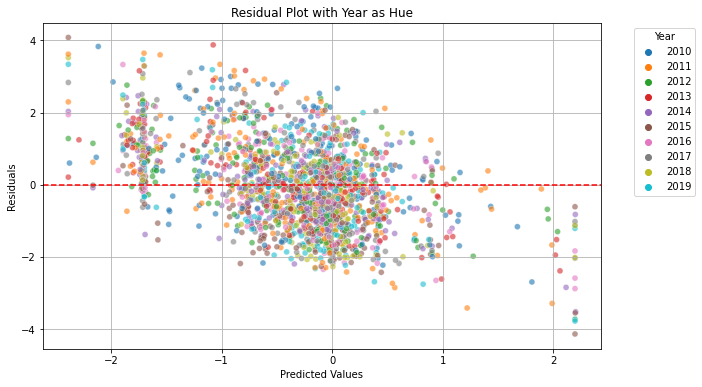

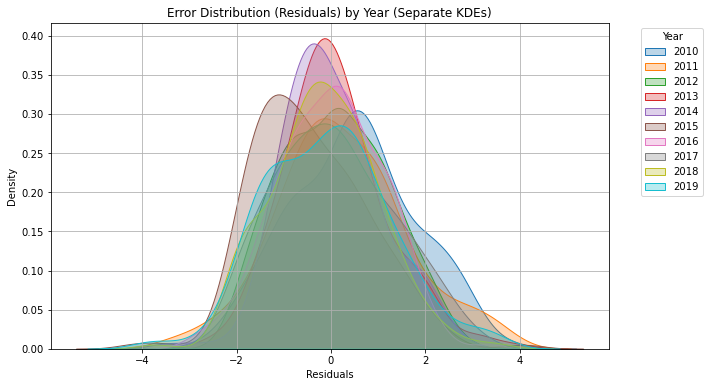

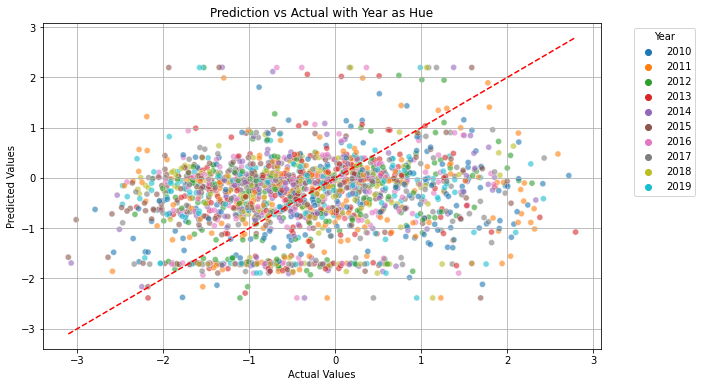

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Initialize lists to collect all actual, predicted values, and years across countries
all_actual_values = []
all_predicted_values = []
all_years = []

for country, predictions in country_recursive_predictions_rf.items():
    # Get predictions and corresponding years
    predicted_years = [year for year in predictions.keys() if year >= 2010]
    predicted_values = [predictions[year] for year in predicted_years]

    # Extract actual values from selected_df for the specified prediction years
    actual_data = selected_df_3[(selected_df_3['Country Name'] == country) & (selected_df_3['Year'].isin(predicted_years))]
    actual_values = actual_data['Standardised Precipitation-Evapotranspiration Index'].values
    years = actual_data['Year'].values

    # Ensure no NaN or inf values in actual and predicted values
    if len(actual_values) == len(predicted_values):
        actual_values_clean = np.array(actual_values)
        predicted_values_clean = np.array(predicted_values)
        
        # Filter out any NaN or inf values
        valid_indices = ~np.isnan(actual_values_clean) & ~np.isinf(actual_values_clean) & \
                        ~np.isnan(predicted_values_clean) & ~np.isinf(predicted_values_clean)
        
        actual_values_clean = actual_values_clean[valid_indices]
        predicted_values_clean = predicted_values_clean[valid_indices]
        years_clean = years[valid_indices]

        # Append clean values from 2010 onward to the overall lists
        all_actual_values.extend(actual_values_clean)
        all_predicted_values.extend(predicted_values_clean)
        all_years.extend(years_clean)

# Create a DataFrame for easier plotting with hue
plot_data = pd.DataFrame({
    'Actual': all_actual_values,
    'Predicted': all_predicted_values,
    'Residuals': np.array(all_actual_values) - np.array(all_predicted_values),
    'Year': all_years
})

# 1. Residual Plot with Year as Hue
plt.figure(figsize=(10, 6))
sns.scatterplot(data=plot_data, x="Predicted", y="Residuals", hue="Year", palette="tab10", alpha=0.6)  # Using a discrete palette
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot with Year as Hue")
plt.grid(True)
plt.legend(title="Year", bbox_to_anchor=(1.05, 1), loc='upper left', ncol=1)  # Adjust legend for clarity
plt.show()

# 2. Error Distribution Plot with Year as Hue (using Kernel Density Estimate)
plt.figure(figsize=(10, 6))
for year in plot_data['Year'].unique():
    sns.kdeplot(data=plot_data[plot_data['Year'] == year], x="Residuals", label=str(year), fill=True, alpha=0.3)
plt.xlabel("Residuals")
plt.title("Error Distribution (Residuals) by Year (Separate KDEs)")
plt.grid(True)
plt.legend(title="Year", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# 3. Prediction vs. Actual Plot with Year as Hue
plt.figure(figsize=(10, 6))
sns.scatterplot(data=plot_data, x="Actual", y="Predicted", hue="Year", palette="tab10", alpha=0.6)  # Using a discrete palette
plt.plot([plot_data['Actual'].min(), plot_data['Actual'].max()],
         [plot_data['Actual'].min(), plot_data['Actual'].max()], 'r--')  # Line of perfect prediction
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Prediction vs Actual with Year as Hue")
plt.grid(True)
plt.legend(title="Year", bbox_to_anchor=(1.05, 1), loc='upper left', ncol=1)  # Adjust legend for better readability
plt.show()

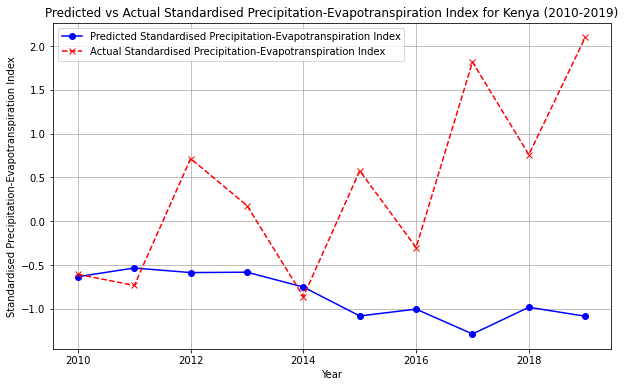

In [21]:
import matplotlib.pyplot as plt

# Function to plot predictions vs actual values for a specified country
def plot_country_predictions_vs_actual(country_name):
    # Extracting predictions for the specified country
    if country_name not in country_recursive_predictions_rf:
        logger.error(f"No predictions found for {country_name}.")
        return

    predictions = country_recursive_predictions_rf[country_name]
    predicted_years = [year for year in predictions.keys() if year >= 2010]
    predicted_values = [predictions[year] for year in predicted_years]

    # Extracting actual values for the specified country and prediction years (2010 onward)
    actual_data = test_df[(test_df['Country Name'] == country_name) & (test_df['Year'].isin(predicted_years))]
    actual_years = actual_data['Year'].values
    actual_values = actual_data['Standardised Precipitation-Evapotranspiration Index'].values

    # Plotting predictions vs actual values from 2010 onward
    plt.figure(figsize=(10, 6))
    plt.plot(predicted_years, predicted_values, label='Predicted Standardised Precipitation-Evapotranspiration Index', color='blue', marker='o')
    plt.plot(actual_years, actual_values, label='Actual Standardised Precipitation-Evapotranspiration Index', color='red', linestyle='--', marker='x')
    plt.xlabel("Year")
    plt.ylabel("Standardised Precipitation-Evapotranspiration Index")
    plt.title(f"Predicted vs Actual Standardised Precipitation-Evapotranspiration Index for {country_name} (2010-2019)")
    plt.legend()
    plt.grid(True)
    plt.show()

# Redefining test_df based on the years 2010-2019 from selected_df
test_df = selected_df_3[(selected_df_3['Year'] >= 2010) & (selected_df_3['Year'] <= 2019)].dropna(subset=['Standardised Precipitation-Evapotranspiration Index'])

# Rerun the plotting function for Kenya as an example
plot_country_predictions_vs_actual("Kenya")

## Forecasting

In [22]:
import logging
from sklearn.ensemble import RandomForestRegressor

# Define year variables for training and prediction
TRAIN_START_YEAR = 2000
TRAIN_END_YEAR = 2019
PREDICTION_START_YEAR = 2019
PREDICTION_END_YEAR = 2030

# Setting up logging configuration
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
logger = logging.getLogger()

# Splitting data into training (2000-2019) set and setting up prediction years
train_df = selected_df_3[(selected_df_3['Year'] >= TRAIN_START_YEAR) & (selected_df_3['Year'] <= TRAIN_END_YEAR)].dropna(subset=['Standardised Precipitation-Evapotranspiration Index'])
prediction_years = range(PREDICTION_START_YEAR, PREDICTION_END_YEAR + 1)

# Preparing training data for the model
X_train = train_df[['Year', 'SPEI Moving_Avg_2Y', 'SPEI Moving_Avg_3Y', 'SPEI Moving_Avg_5Y', 'SPEI Moving_Avg_10Y']].values
y_train = train_df['Standardised Precipitation-Evapotranspiration Index'].values

# Initializing and training the Random Forest model on all training data
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)
logger.info(f"Model trained on all countries' data ({TRAIN_START_YEAR}-{TRAIN_END_YEAR}). Starting recursive forecasting.")

# Dictionary to store predictions for each country
country_recursive_predictions_rf = {}

# Recursive forecasting for each country separately with detailed logging
for country in train_df['Country Name'].unique():
    logger.info(f"Processing country: {country}")

    # Get the last available data point for the country to start recursive prediction
    country_data = train_df[train_df['Country Name'] == country].iloc[-1].copy()
    predictions_per_country = {country_data['Year']: country_data['Standardised Precipitation-Evapotranspiration Index']}

    # Recursive prediction loop from PREDICTION_START_YEAR to PREDICTION_END_YEAR
    for year in prediction_years:
        country_data['Year'] = year
        
        # Logging the input data used for this prediction
        logger.info(f"Prediction inputs for {country} in {year}: Year={year}, "
                    f"SPEI Moving_Avg_2Y={country_data['SPEI Moving_Avg_2Y']}, "
                    f"SPEI Moving_Avg_3Y={country_data['SPEI Moving_Avg_3Y']}, "
                    f"SPEI Moving_Avg_5Y={country_data['SPEI Moving_Avg_5Y']}, "
                    f"SPEI Moving_Avg_10Y={country_data['SPEI Moving_Avg_10Y']}")
        
        # Preparing the features for the current prediction
        X_test = country_data[['Year', 'SPEI Moving_Avg_2Y', 'SPEI Moving_Avg_3Y', 'SPEI Moving_Avg_5Y', 'SPEI Moving_Avg_10Y']].values.reshape(1, -1)
        
        # Predicting life expectancy for the current year
        predicted_value = model_rf.predict(X_test)[0]
        logger.info(f"Predicted value for {country} in {year}: {predicted_value}")
        
        # Update the prediction in the dictionary
        predictions_per_country[year] = predicted_value
        
        # Update the features for the next prediction year based on the new prediction
        country_data['Standardised Precipitation-Evapotranspiration Index'] = predicted_value
        country_data['SPEI Moving_Avg_2Y'] = (predictions_per_country.get(year - 1, predicted_value) + predicted_value) / 2
        country_data['SPEI Moving_Avg_3Y'] = (predictions_per_country.get(year - 2, predicted_value) +
                                         predictions_per_country.get(year - 1, predicted_value) + predicted_value) / 3
        country_data['SPEI Moving_Avg_5Y'] = (sum(predictions_per_country.get(y, predicted_value) for y in range(year - 4, year + 1)) / 5)
        country_data['SPEI Moving_Avg_10Y'] = (sum(predictions_per_country.get(y, predicted_value) for y in range(year - 9, year + 1)) / 10)

    # Store the predictions for the country
    country_recursive_predictions_rf[country] = predictions_per_country


2024-11-11 16:56:16,578 - INFO - Model trained on all countries' data (2000-2019). Starting recursive forecasting.
2024-11-11 16:56:16,578 - INFO - Processing country: Afghanistan
2024-11-11 16:56:16,590 - INFO - Prediction inputs for Afghanistan in 2019: Year=2019, SPEI Moving_Avg_2Y=-0.19896912300000003, SPEI Moving_Avg_3Y=-0.5094512770000003, SPEI Moving_Avg_5Y=0.06305176279999998, SPEI Moving_Avg_10Y=-0.07207376730000004
2024-11-11 16:56:16,598 - INFO - Predicted value for Afghanistan in 2019: 0.5398342499399995
2024-11-11 16:56:16,599 - INFO - Prediction inputs for Afghanistan in 2020: Year=2020, SPEI Moving_Avg_2Y=0.5398342499399995, SPEI Moving_Avg_3Y=0.5398342499399995, SPEI Moving_Avg_5Y=0.5398342499399995, SPEI Moving_Avg_10Y=0.5398342499399994
2024-11-11 16:56:16,605 - INFO - Predicted value for Afghanistan in 2020: 0.4606158901699998
2024-11-11 16:56:16,605 - INFO - Prediction inputs for Afghanistan in 2021: Year=2021, SPEI Moving_Avg_2Y=0.5002250700549997, SPEI Moving_Avg_

2024-11-11 16:56:16,749 - INFO - Processing country: Algeria
2024-11-11 16:56:16,749 - INFO - Prediction inputs for Algeria in 2019: Year=2019, SPEI Moving_Avg_2Y=-0.992100358, SPEI Moving_Avg_3Y=-1.2748547753333332, SPEI Moving_Avg_5Y=-1.4669220036000001, SPEI Moving_Avg_10Y=-1.3866004493
2024-11-11 16:56:16,749 - INFO - Predicted value for Algeria in 2019: -1.3590902503899998
2024-11-11 16:56:16,749 - INFO - Prediction inputs for Algeria in 2020: Year=2020, SPEI Moving_Avg_2Y=-1.3590902503899998, SPEI Moving_Avg_3Y=-1.3590902503899998, SPEI Moving_Avg_5Y=-1.3590902503899998, SPEI Moving_Avg_10Y=-1.35909025039
2024-11-11 16:56:16,765 - INFO - Predicted value for Algeria in 2020: -1.2722067744100003
2024-11-11 16:56:16,765 - INFO - Prediction inputs for Algeria in 2021: Year=2021, SPEI Moving_Avg_2Y=-1.3156485124000001, SPEI Moving_Avg_3Y=-1.3011679330700001, SPEI Moving_Avg_5Y=-1.2895834696060002, SPEI Moving_Avg_10Y=-1.280895122008
2024-11-11 16:56:16,765 - INFO - Predicted value for

2024-11-11 16:56:16,915 - INFO - Predicted value for Angola in 2019: -0.10561171888000022
2024-11-11 16:56:16,915 - INFO - Prediction inputs for Angola in 2020: Year=2020, SPEI Moving_Avg_2Y=-0.10561171888000022, SPEI Moving_Avg_3Y=-0.10561171888000022, SPEI Moving_Avg_5Y=-0.10561171888000023, SPEI Moving_Avg_10Y=-0.10561171888000023
2024-11-11 16:56:16,915 - INFO - Predicted value for Angola in 2020: 0.07035343723999998
2024-11-11 16:56:16,915 - INFO - Prediction inputs for Angola in 2021: Year=2021, SPEI Moving_Avg_2Y=-0.017629140820000118, SPEI Moving_Avg_3Y=0.011698385199999916, SPEI Moving_Avg_5Y=0.03516040601599994, SPEI Moving_Avg_10Y=0.05275692162799996
2024-11-11 16:56:16,915 - INFO - Predicted value for Angola in 2021: 0.03672666608999998
2024-11-11 16:56:16,915 - INFO - Prediction inputs for Angola in 2022: Year=2022, SPEI Moving_Avg_2Y=0.05354005166499998, SPEI Moving_Avg_3Y=0.0004894614833332473, SPEI Moving_Avg_5Y=0.014984343325999938, SPEI Moving_Avg_10Y=0.02585550470799

2024-11-11 16:56:17,049 - INFO - Predicted value for Argentina in 2019: -0.15589964456999966
2024-11-11 16:56:17,049 - INFO - Prediction inputs for Argentina in 2020: Year=2020, SPEI Moving_Avg_2Y=-0.15589964456999966, SPEI Moving_Avg_3Y=-0.15589964456999966, SPEI Moving_Avg_5Y=-0.15589964456999966, SPEI Moving_Avg_10Y=-0.15589964456999963
2024-11-11 16:56:17,065 - INFO - Predicted value for Argentina in 2020: -0.30821625112000034
2024-11-11 16:56:17,065 - INFO - Prediction inputs for Argentina in 2021: Year=2021, SPEI Moving_Avg_2Y=-0.232057947845, SPEI Moving_Avg_3Y=-0.2574440489366668, SPEI Moving_Avg_5Y=-0.2777529298100002, SPEI Moving_Avg_10Y=-0.29298459046500025
2024-11-11 16:56:17,065 - INFO - Predicted value for Argentina in 2021: -0.16660434336
2024-11-11 16:56:17,065 - INFO - Prediction inputs for Argentina in 2022: Year=2022, SPEI Moving_Avg_2Y=-0.23741029724000018, SPEI Moving_Avg_3Y=-0.21024007968333333, SPEI Moving_Avg_5Y=-0.19278578515399997, SPEI Moving_Avg_10Y=-0.17969

2024-11-11 16:56:17,222 - INFO - Prediction inputs for Australia in 2020: Year=2020, SPEI Moving_Avg_2Y=-2.4000968984299966, SPEI Moving_Avg_3Y=-2.4000968984299966, SPEI Moving_Avg_5Y=-2.4000968984299966, SPEI Moving_Avg_10Y=-2.4000968984299966
2024-11-11 16:56:17,232 - INFO - Predicted value for Australia in 2020: -1.96707650841
2024-11-11 16:56:17,233 - INFO - Prediction inputs for Australia in 2021: Year=2021, SPEI Moving_Avg_2Y=-2.1835867034199983, SPEI Moving_Avg_3Y=-2.1114166384166655, SPEI Moving_Avg_5Y=-2.053680586413999, SPEI Moving_Avg_10Y=-2.010378547411999
2024-11-11 16:56:17,238 - INFO - Predicted value for Australia in 2021: -1.9574485107100004
2024-11-11 16:56:17,239 - INFO - Prediction inputs for Australia in 2022: Year=2022, SPEI Moving_Avg_2Y=-1.9622625095600001, SPEI Moving_Avg_3Y=-2.1082073058499993, SPEI Moving_Avg_5Y=-2.0479037877939996, SPEI Moving_Avg_10Y=-2.0026761492519998
2024-11-11 16:56:17,239 - INFO - Predicted value for Australia in 2022: -1.9091599730500

2024-11-11 16:56:17,406 - INFO - Predicted value for Azerbaijan in 2020: -1.890951921240002
2024-11-11 16:56:17,406 - INFO - Prediction inputs for Azerbaijan in 2021: Year=2021, SPEI Moving_Avg_2Y=-1.918288022100001, SPEI Moving_Avg_3Y=-1.9091759884800013, SPEI Moving_Avg_5Y=-1.9018863615840018, SPEI Moving_Avg_10Y=-1.8964191414120024
2024-11-11 16:56:17,420 - INFO - Predicted value for Azerbaijan in 2021: -1.912453886940001
2024-11-11 16:56:17,421 - INFO - Prediction inputs for Azerbaijan in 2022: Year=2022, SPEI Moving_Avg_2Y=-1.9017029040900015, SPEI Moving_Avg_3Y=-1.916343310380001, SPEI Moving_Avg_5Y=-1.9147875410040007, SPEI Moving_Avg_10Y=-1.913620713972001
2024-11-11 16:56:17,422 - INFO - Predicted value for Azerbaijan in 2022: -1.9014159843100007
2024-11-11 16:56:17,422 - INFO - Prediction inputs for Azerbaijan in 2023: Year=2023, SPEI Moving_Avg_2Y=-1.9069349356250007, SPEI Moving_Avg_3Y=-1.9016072641633344, SPEI Moving_Avg_5Y=-1.9103723799520007, SPEI Moving_Avg_10Y=-1.90589

2024-11-11 16:56:17,572 - INFO - Predicted value for Bahrain in 2020: 0.02592800452999998
2024-11-11 16:56:17,572 - INFO - Prediction inputs for Bahrain in 2021: Year=2021, SPEI Moving_Avg_2Y=-0.01688980785500005, SPEI Moving_Avg_3Y=-0.0026172037266667066, SPEI Moving_Avg_5Y=0.008800879575999968, SPEI Moving_Avg_10Y=0.01736444205299998
2024-11-11 16:56:17,583 - INFO - Predicted value for Bahrain in 2021: 0.041588433740000014
2024-11-11 16:56:17,583 - INFO - Prediction inputs for Bahrain in 2022: Year=2022, SPEI Moving_Avg_2Y=0.033758219134999996, SPEI Moving_Avg_3Y=0.002602939343333305, SPEI Moving_Avg_5Y=0.018197137101999987, SPEI Moving_Avg_10Y=0.029892785421
2024-11-11 16:56:17,589 - INFO - Predicted value for Bahrain in 2022: 0.1542934480700001
2024-11-11 16:56:17,589 - INFO - Prediction inputs for Bahrain in 2023: Year=2023, SPEI Moving_Avg_2Y=0.09794094090500005, SPEI Moving_Avg_3Y=0.07393662878000003, SPEI Moving_Avg_5Y=0.06327914283400002, SPEI Moving_Avg_10Y=0.1087862954520000

2024-11-11 16:56:17,732 - INFO - Prediction inputs for Barbados in 2021: Year=2021, SPEI Moving_Avg_2Y=-2.011603692075002, SPEI Moving_Avg_3Y=-1.9978138074233345, SPEI Moving_Avg_5Y=-1.986781899702001, SPEI Moving_Avg_10Y=-1.978507968911001
2024-11-11 16:56:17,749 - INFO - Predicted value for Barbados in 2021: -1.962280485710001
2024-11-11 16:56:17,749 - INFO - Prediction inputs for Barbados in 2022: Year=2022, SPEI Moving_Avg_2Y=-1.9662572619150005, SPEI Moving_Avg_3Y=-1.9951626232866682, SPEI Moving_Avg_5Y=-1.9820097682560012, SPEI Moving_Avg_10Y=-1.9721451269830008
2024-11-11 16:56:17,749 - INFO - Predicted value for Barbados in 2022: -1.9067306618900013
2024-11-11 16:56:17,749 - INFO - Prediction inputs for Barbados in 2023: Year=2023, SPEI Moving_Avg_2Y=-1.934505573800001, SPEI Moving_Avg_3Y=-1.9464150619066674, SPEI Moving_Avg_5Y=-1.9597898387280015, SPEI Moving_Avg_10Y=-1.9332602503090015
2024-11-11 16:56:17,749 - INFO - Predicted value for Barbados in 2023: -1.891283614260002
2

2024-11-11 16:56:17,899 - INFO - Predicted value for Belgium in 2021: -1.0633425887999999
2024-11-11 16:56:17,899 - INFO - Prediction inputs for Belgium in 2022: Year=2022, SPEI Moving_Avg_2Y=-1.049451645965, SPEI Moving_Avg_3Y=-1.1082165528499996, SPEI Moving_Avg_5Y=-1.0902669672299996, SPEI Moving_Avg_10Y=-1.0768047780149996
2024-11-11 16:56:17,899 - INFO - Predicted value for Belgium in 2022: -0.9434412495000007
2024-11-11 16:56:17,899 - INFO - Prediction inputs for Belgium in 2023: Year=2023, SPEI Moving_Avg_2Y=-1.0033919191500003, SPEI Moving_Avg_3Y=-1.0141148471433337, SPEI Moving_Avg_5Y=-1.0423064315100004, SPEI Moving_Avg_10Y=-0.9928738405050005
2024-11-11 16:56:17,916 - INFO - Predicted value for Belgium in 2023: -0.9842022927400003
2024-11-11 16:56:17,916 - INFO - Prediction inputs for Belgium in 2024: Year=2024, SPEI Moving_Avg_2Y=-0.9638217711200006, SPEI Moving_Avg_3Y=-0.9969953770133335, SPEI Moving_Avg_5Y=-1.0504586401579998, SPEI Moving_Avg_10Y=-1.0173304664490002
2024-

2024-11-11 16:56:18,065 - INFO - Prediction inputs for Benin in 2023: Year=2023, SPEI Moving_Avg_2Y=0.8400851648, SPEI Moving_Avg_3Y=0.8271165891266667, SPEI Moving_Avg_5Y=0.823445874344, SPEI Moving_Avg_10Y=0.8434589963720001
2024-11-11 16:56:18,082 - INFO - Predicted value for Benin in 2023: 0.8213895295000003
2024-11-11 16:56:18,082 - INFO - Prediction inputs for Benin in 2024: Year=2024, SPEI Moving_Avg_2Y=0.8424308239500002, SPEI Moving_Avg_3Y=0.8338532863666668, SPEI Moving_Avg_5Y=0.815029356564, SPEI Moving_Avg_10Y=0.8182094430320002
2024-11-11 16:56:18,082 - INFO - Predicted value for Benin in 2024: 0.8205115699600001
2024-11-11 16:56:18,082 - INFO - Prediction inputs for Benin in 2025: Year=2025, SPEI Moving_Avg_2Y=0.8209505497300003, SPEI Moving_Avg_3Y=0.8351244059533336, SPEI Moving_Avg_5Y=0.8246501733680001, SPEI Moving_Avg_10Y=0.8177704632620001
2024-11-11 16:56:18,099 - INFO - Predicted value for Benin in 2025: 0.8399151625800004
2024-11-11 16:56:18,099 - INFO - Predictio

2024-11-11 16:56:18,235 - INFO - Prediction inputs for Bolivia in 2024: Year=2024, SPEI Moving_Avg_2Y=-0.8453588314449998, SPEI Moving_Avg_3Y=-0.8498991248633333, SPEI Moving_Avg_5Y=-0.819729877232, SPEI Moving_Avg_10Y=-0.8624832401509999
2024-11-11 16:56:18,251 - INFO - Predicted value for Bolivia in 2024: -0.6701035833000002
2024-11-11 16:56:18,251 - INFO - Prediction inputs for Bolivia in 2025: Year=2025, SPEI Moving_Avg_2Y=-0.7876700931849998, SPEI Moving_Avg_3Y=-0.7869404153966665, SPEI Moving_Avg_5Y=-0.7811661207160002, SPEI Moving_Avg_10Y=-0.7449167302660001
2024-11-11 16:56:18,251 - INFO - Predicted value for Bolivia in 2025: -1.0839249464999994
2024-11-11 16:56:18,251 - INFO - Prediction inputs for Bolivia in 2026: Year=2026, SPEI Moving_Avg_2Y=-0.8770142648999998, SPEI Moving_Avg_3Y=-0.8864217109566663, SPEI Moving_Avg_5Y=-0.8607451808779999, SPEI Moving_Avg_10Y=-0.9104452755459997
2024-11-11 16:56:18,267 - INFO - Predicted value for Bolivia in 2026: -0.6371764776800002
2024-

2024-11-11 16:56:18,400 - INFO - Predicted value for Botswana in 2023: -1.4483158064100001
2024-11-11 16:56:18,400 - INFO - Prediction inputs for Botswana in 2024: Year=2024, SPEI Moving_Avg_2Y=-1.4454582870400001, SPEI Moving_Avg_3Y=-1.473021412526667, SPEI Moving_Avg_5Y=-1.448355932932, SPEI Moving_Avg_10Y=-1.4483358696709998
2024-11-11 16:56:18,400 - INFO - Predicted value for Botswana in 2024: -1.5479675555899999
2024-11-11 16:56:18,415 - INFO - Prediction inputs for Botswana in 2025: Year=2025, SPEI Moving_Avg_2Y=-1.498141681, SPEI Moving_Avg_3Y=-1.4796280432233333, SPEI Moving_Avg_5Y=-1.4850224091200002, SPEI Moving_Avg_10Y=-1.498161744261
2024-11-11 16:56:18,423 - INFO - Predicted value for Botswana in 2025: -1.46627870175
2024-11-11 16:56:18,424 - INFO - Prediction inputs for Botswana in 2026: Year=2026, SPEI Moving_Avg_2Y=-1.50712312867, SPEI Moving_Avg_3Y=-1.4875206879166667, SPEI Moving_Avg_5Y=-1.486662098984, SPEI Moving_Avg_10Y=-1.465486202725
2024-11-11 16:56:18,434 - INF

2024-11-11 16:56:18,614 - INFO - Predicted value for Brunei Darussalam in 2024: -0.44830967025
2024-11-11 16:56:18,615 - INFO - Prediction inputs for Brunei Darussalam in 2025: Year=2025, SPEI Moving_Avg_2Y=-0.4728139141950001, SPEI Moving_Avg_3Y=-0.5067718818133334, SPEI Moving_Avg_5Y=-0.45140047241799997, SPEI Moving_Avg_10Y=-0.44900169404299994
2024-11-11 16:56:18,622 - INFO - Predicted value for Brunei Darussalam in 2025: -0.4435833706199999
2024-11-11 16:56:18,622 - INFO - Prediction inputs for Brunei Darussalam in 2026: Year=2026, SPEI Moving_Avg_2Y=-0.44594652043499994, SPEI Moving_Avg_3Y=-0.46307039967, SPEI Moving_Avg_5Y=-0.47395596822600006, SPEI Moving_Avg_10Y=-0.447111174191
2024-11-11 16:56:18,630 - INFO - Predicted value for Brunei Darussalam in 2026: -0.28606265384999985
2024-11-11 16:56:18,631 - INFO - Prediction inputs for Brunei Darussalam in 2027: Year=2027, SPEI Moving_Avg_2Y=-0.3648230122349999, SPEI Moving_Avg_3Y=-0.39265189823999985, SPEI Moving_Avg_5Y=-0.4499923

2024-11-11 16:56:18,788 - INFO - Predicted value for Burkina Faso in 2024: 0.8673200542200002
2024-11-11 16:56:18,789 - INFO - Prediction inputs for Burkina Faso in 2025: Year=2025, SPEI Moving_Avg_2Y=0.8661188323150004, SPEI Moving_Avg_3Y=0.8587406349100003, SPEI Moving_Avg_5Y=0.8543791288140004, SPEI Moving_Avg_10Y=0.8553825464360001
2024-11-11 16:56:18,796 - INFO - Predicted value for Burkina Faso in 2025: 0.9423117483400004
2024-11-11 16:56:18,796 - INFO - Prediction inputs for Burkina Faso in 2026: Year=2026, SPEI Moving_Avg_2Y=0.9048159012800003, SPEI Moving_Avg_3Y=0.8915164709900004, SPEI Moving_Avg_5Y=0.8741064964100005, SPEI Moving_Avg_10Y=0.8853792240840003
2024-11-11 16:56:18,804 - INFO - Predicted value for Burkina Faso in 2026: 0.9565339742400005
2024-11-11 16:56:18,804 - INFO - Prediction inputs for Burkina Faso in 2027: Year=2027, SPEI Moving_Avg_2Y=0.9494228612900004, SPEI Moving_Avg_3Y=0.9220552589333337, SPEI Moving_Avg_5Y=0.8950135254620004, SPEI Moving_Avg_10Y=0.889

2024-11-11 16:56:18,963 - INFO - Predicted value for Cabo Verde in 2025: 0.5008593224599996
2024-11-11 16:56:18,964 - INFO - Prediction inputs for Cabo Verde in 2026: Year=2026, SPEI Moving_Avg_2Y=0.49019889618499973, SPEI Moving_Avg_3Y=0.5147080039799997, SPEI Moving_Avg_5Y=0.5114220731619998, SPEI Moving_Avg_10Y=0.5134091377029997
2024-11-11 16:56:18,969 - INFO - Predicted value for Cabo Verde in 2026: 0.5702911779399996
2024-11-11 16:56:18,969 - INFO - Prediction inputs for Cabo Verde in 2027: Year=2027, SPEI Moving_Avg_2Y=0.5355752501999996, SPEI Moving_Avg_3Y=0.5168963234366664, SPEI Moving_Avg_5Y=0.5543444207499997, SPEI Moving_Avg_10Y=0.5342386943469997
2024-11-11 16:56:18,975 - INFO - Predicted value for Cabo Verde in 2027: 0.5049328734899996
2024-11-11 16:56:18,976 - INFO - Prediction inputs for Cabo Verde in 2028: Year=2028, SPEI Moving_Avg_2Y=0.5376120257149997, SPEI Moving_Avg_3Y=0.5253611246299996, SPEI Moving_Avg_5Y=0.5238696126739997, SPEI Moving_Avg_10Y=0.52116703345699

2024-11-11 16:56:19,134 - INFO - Predicted value for Cameroon in 2026: 0.5807075990599997
2024-11-11 16:56:19,135 - INFO - Prediction inputs for Cameroon in 2027: Year=2027, SPEI Moving_Avg_2Y=0.5182298993749997, SPEI Moving_Avg_3Y=0.5236032506899998, SPEI Moving_Avg_5Y=0.5176203657019998, SPEI Moving_Avg_10Y=0.5273769230819998
2024-11-11 16:56:19,138 - INFO - Predicted value for Cameroon in 2027: 0.4564981232599999
2024-11-11 16:56:19,138 - INFO - Prediction inputs for Cameroon in 2028: Year=2028, SPEI Moving_Avg_2Y=0.5186028611599998, SPEI Moving_Avg_3Y=0.49765264066999976, SPEI Moving_Avg_5Y=0.5155310762139999, SPEI Moving_Avg_10Y=0.5025350279219998
2024-11-11 16:56:19,138 - INFO - Predicted value for Cameroon in 2028: 0.4288364013499998
2024-11-11 16:56:19,148 - INFO - Prediction inputs for Cameroon in 2029: Year=2029, SPEI Moving_Avg_2Y=0.44266726230499986, SPEI Moving_Avg_3Y=0.4886807078899998, SPEI Moving_Avg_5Y=0.4912288553359998, SPEI Moving_Avg_10Y=0.49976885573099983
2024-11

2024-11-11 16:56:19,292 - INFO - Predicted value for Central African Republic in 2026: -0.5490030377699999
2024-11-11 16:56:19,293 - INFO - Prediction inputs for Central African Republic in 2027: Year=2027, SPEI Moving_Avg_2Y=-0.4330260099499999, SPEI Moving_Avg_3Y=-0.4189032237366666, SPEI Moving_Avg_5Y=-0.45826418217599996, SPEI Moving_Avg_10Y=-0.4603397012889999
2024-11-11 16:56:19,300 - INFO - Predicted value for Central African Republic in 2027: -0.4035877499499999
2024-11-11 16:56:19,301 - INFO - Prediction inputs for Central African Republic in 2028: Year=2028, SPEI Moving_Avg_2Y=-0.4762953938599999, SPEI Moving_Avg_3Y=-0.4232132566166666, SPEI Moving_Avg_5Y=-0.43448142675199997, SPEI Moving_Avg_10Y=-0.43125664372499994
2024-11-11 16:56:19,307 - INFO - Predicted value for Central African Republic in 2028: -0.5254111532900001
2024-11-11 16:56:19,308 - INFO - Prediction inputs for Central African Republic in 2029: Year=2029, SPEI Moving_Avg_2Y=-0.46449945162, SPEI Moving_Avg_3Y=-0

2024-11-11 16:56:19,475 - INFO - Prediction inputs for Chile in 2027: Year=2027, SPEI Moving_Avg_2Y=-1.5025014671250005, SPEI Moving_Avg_3Y=-1.5070541891333338, SPEI Moving_Avg_5Y=-1.5151324509780006, SPEI Moving_Avg_10Y=-1.5087758591990006
2024-11-11 16:56:19,485 - INFO - Predicted value for Chile in 2027: -1.516972592160001
2024-11-11 16:56:19,486 - INFO - Prediction inputs for Chile in 2028: Year=2028, SPEI Moving_Avg_2Y=-1.4964970134650006, SPEI Moving_Avg_3Y=-1.5073251754700008, SPEI Moving_Avg_5Y=-1.5147790964060006, SPEI Moving_Avg_10Y=-1.5169660906770008
2024-11-11 16:56:19,488 - INFO - Predicted value for Chile in 2028: -1.5205866459600008
2024-11-11 16:56:19,488 - INFO - Prediction inputs for Chile in 2029: Year=2029, SPEI Moving_Avg_2Y=-1.518779619060001, SPEI Moving_Avg_3Y=-1.5045268909633343, SPEI Moving_Avg_5Y=-1.5117443611040007, SPEI Moving_Avg_10Y=-1.517327496057001
2024-11-11 16:56:19,500 - INFO - Predicted value for Chile in 2029: -1.5059817329100005
2024-11-11 16:56

2024-11-11 16:56:19,649 - INFO - Predicted value for Colombia in 2027: -1.07626228224
2024-11-11 16:56:19,649 - INFO - Prediction inputs for Colombia in 2028: Year=2028, SPEI Moving_Avg_2Y=-1.0430546763950002, SPEI Moving_Avg_3Y=-1.0175995452833335, SPEI Moving_Avg_5Y=-1.0163026255660004, SPEI Moving_Avg_10Y=-1.0410037609510001
2024-11-11 16:56:19,655 - INFO - Predicted value for Colombia in 2028: -0.8372094429700004
2024-11-11 16:56:19,655 - INFO - Prediction inputs for Colombia in 2029: Year=2029, SPEI Moving_Avg_2Y=-0.9567358626050002, SPEI Moving_Avg_3Y=-0.9744395985866668, SPEI Moving_Avg_5Y=-0.9736050324240006, SPEI Moving_Avg_10Y=-1.0170984770240001
2024-11-11 16:56:19,655 - INFO - Predicted value for Colombia in 2029: -0.8708535911000004
2024-11-11 16:56:19,665 - INFO - Prediction inputs for Colombia in 2030: Year=2030, SPEI Moving_Avg_2Y=-0.8540315170350004, SPEI Moving_Avg_3Y=-0.9281084387700003, SPEI Moving_Avg_5Y=-0.9521723339840003, SPEI Moving_Avg_10Y=-0.9854639226240003


2024-11-11 16:56:19,814 - INFO - Prediction inputs for Congo, Dem. Rep. in 2028: Year=2028, SPEI Moving_Avg_2Y=0.5314021048599997, SPEI Moving_Avg_3Y=0.5177901809866664, SPEI Moving_Avg_5Y=0.5550115682339999, SPEI Moving_Avg_10Y=0.5059145845479999
2024-11-11 16:56:19,820 - INFO - Predicted value for Congo, Dem. Rep. in 2028: 0.49518122238999956
2024-11-11 16:56:19,821 - INFO - Prediction inputs for Congo, Dem. Rep. in 2029: Year=2029, SPEI Moving_Avg_2Y=0.5149427267699996, SPEI Moving_Avg_3Y=0.5193284773699997, SPEI Moving_Avg_5Y=0.5038777918159998, SPEI Moving_Avg_10Y=0.5019622836719998
2024-11-11 16:56:19,826 - INFO - Predicted value for Congo, Dem. Rep. in 2029: 0.4417634806599998
2024-11-11 16:56:19,826 - INFO - Prediction inputs for Congo, Dem. Rep. in 2030: Year=2030, SPEI Moving_Avg_2Y=0.46847235152499966, SPEI Moving_Avg_3Y=0.49054964473333307, SPEI Moving_Avg_5Y=0.4980630492019997, SPEI Moving_Avg_10Y=0.5054391064179998
2024-11-11 16:56:19,832 - INFO - Predicted value for Cong

2024-11-11 16:56:19,982 - INFO - Predicted value for Costa Rica in 2028: 0.8670283987300001
2024-11-11 16:56:19,982 - INFO - Prediction inputs for Costa Rica in 2029: Year=2029, SPEI Moving_Avg_2Y=0.9400074875100004, SPEI Moving_Avg_3Y=0.9105592375800003, SPEI Moving_Avg_5Y=0.9181899802940002, SPEI Moving_Avg_10Y=0.9218569586910002
2024-11-11 16:56:19,982 - INFO - Predicted value for Costa Rica in 2029: 0.9102515141800002
2024-11-11 16:56:19,982 - INFO - Prediction inputs for Costa Rica in 2030: Year=2030, SPEI Moving_Avg_2Y=0.8886399564550002, SPEI Moving_Avg_3Y=0.9300888297333336, SPEI Moving_Avg_5Y=0.9095602021140003, SPEI Moving_Avg_10Y=0.9201802295350003
2024-11-11 16:56:19,999 - INFO - Predicted value for Costa Rica in 2030: 1.0134003776700005
2024-11-11 16:56:19,999 - INFO - Processing country: Cote d'Ivoire
2024-11-11 16:56:20,002 - INFO - Prediction inputs for Cote d'Ivoire in 2019: Year=2019, SPEI Moving_Avg_2Y=0.612139083, SPEI Moving_Avg_3Y=-0.19946922133333334, SPEI Moving

2024-11-11 16:56:20,155 - INFO - Predicted value for Croatia in 2028: 0.08502331908000008
2024-11-11 16:56:20,155 - INFO - Prediction inputs for Croatia in 2029: Year=2029, SPEI Moving_Avg_2Y=0.07989607515000005, SPEI Moving_Avg_3Y=0.030937987740000034, SPEI Moving_Avg_5Y=0.053421022844000035, SPEI Moving_Avg_10Y=0.05022690980600002
2024-11-11 16:56:20,166 - INFO - Predicted value for Croatia in 2029: 0.05255553812
2024-11-11 16:56:20,166 - INFO - Prediction inputs for Croatia in 2030: Year=2030, SPEI Moving_Avg_2Y=0.06878942860000004, SPEI Moving_Avg_3Y=0.0707825628066667, SPEI Moving_Avg_5Y=0.04967153813600004, SPEI Moving_Avg_10Y=0.05045149784800003
2024-11-11 16:56:20,172 - INFO - Predicted value for Croatia in 2030: 0.00934811650000001
2024-11-11 16:56:20,172 - INFO - Processing country: Cuba
2024-11-11 16:56:20,172 - INFO - Prediction inputs for Cuba in 2019: Year=2019, SPEI Moving_Avg_2Y=-0.09567461849999978, SPEI Moving_Avg_3Y=0.31508730366666676, SPEI Moving_Avg_5Y=-0.15511303

2024-11-11 16:56:20,324 - INFO - Predicted value for Cyprus in 2029: 0.8542516357100004
2024-11-11 16:56:20,324 - INFO - Prediction inputs for Cyprus in 2030: Year=2030, SPEI Moving_Avg_2Y=0.8508703054000004, SPEI Moving_Avg_3Y=0.8405737830533336, SPEI Moving_Avg_5Y=0.8421135532340003, SPEI Moving_Avg_10Y=0.8100577379580001
2024-11-11 16:56:20,329 - INFO - Predicted value for Cyprus in 2030: 0.8416999951100003
2024-11-11 16:56:20,329 - INFO - Processing country: Czechia
2024-11-11 16:56:20,331 - INFO - Prediction inputs for Czechia in 2019: Year=2019, SPEI Moving_Avg_2Y=-1.8861997369999999, SPEI Moving_Avg_3Y=-1.4806527336666668, SPEI Moving_Avg_5Y=-1.3327677938, SPEI Moving_Avg_10Y=-0.7388423960000001
2024-11-11 16:56:20,332 - INFO - Predicted value for Czechia in 2019: -1.5343775221500011
2024-11-11 16:56:20,332 - INFO - Prediction inputs for Czechia in 2020: Year=2020, SPEI Moving_Avg_2Y=-1.5343775221500011, SPEI Moving_Avg_3Y=-1.5343775221500013, SPEI Moving_Avg_5Y=-1.5343775221500

2024-11-11 16:56:20,479 - INFO - Prediction inputs for Denmark in 2030: Year=2030, SPEI Moving_Avg_2Y=-0.18153573328499994, SPEI Moving_Avg_3Y=-0.17742169225999993, SPEI Moving_Avg_5Y=-0.17566327364599998, SPEI Moving_Avg_10Y=-0.190617876691
2024-11-11 16:56:20,484 - INFO - Predicted value for Denmark in 2030: -0.32963201767
2024-11-11 16:56:20,485 - INFO - Processing country: Djibouti
2024-11-11 16:56:20,488 - INFO - Prediction inputs for Djibouti in 2019: Year=2019, SPEI Moving_Avg_2Y=-0.1275458754999998, SPEI Moving_Avg_3Y=-0.21973148833333342, SPEI Moving_Avg_5Y=-0.6587267225999998, SPEI Moving_Avg_10Y=-0.5545750214
2024-11-11 16:56:20,488 - INFO - Predicted value for Djibouti in 2019: -0.1491263011399999
2024-11-11 16:56:20,488 - INFO - Prediction inputs for Djibouti in 2020: Year=2020, SPEI Moving_Avg_2Y=-0.1491263011399999, SPEI Moving_Avg_3Y=-0.1491263011399999, SPEI Moving_Avg_5Y=-0.1491263011399999, SPEI Moving_Avg_10Y=-0.1491263011399999
2024-11-11 16:56:20,488 - INFO - Pred

2024-11-11 16:56:20,655 - INFO - Predicted value for Dominica in 2030: -0.6662931947899999
2024-11-11 16:56:20,655 - INFO - Processing country: Dominican Republic
2024-11-11 16:56:20,655 - INFO - Prediction inputs for Dominican Republic in 2019: Year=2019, SPEI Moving_Avg_2Y=-1.6553548304999999, SPEI Moving_Avg_3Y=-1.036539231, SPEI Moving_Avg_5Y=-0.3680818723999998, SPEI Moving_Avg_10Y=-0.38431074469999993
2024-11-11 16:56:20,665 - INFO - Predicted value for Dominican Republic in 2019: -1.7267619223199993
2024-11-11 16:56:20,666 - INFO - Prediction inputs for Dominican Republic in 2020: Year=2020, SPEI Moving_Avg_2Y=-1.7267619223199993, SPEI Moving_Avg_3Y=-1.726761922319999, SPEI Moving_Avg_5Y=-1.7267619223199993, SPEI Moving_Avg_10Y=-1.7267619223199993
2024-11-11 16:56:20,672 - INFO - Predicted value for Dominican Republic in 2020: -1.6829378346900017
2024-11-11 16:56:20,672 - INFO - Prediction inputs for Dominican Republic in 2021: Year=2021, SPEI Moving_Avg_2Y=-1.7048498785050006, 

2024-11-11 16:56:20,835 - INFO - Predicted value for Ecuador in 2030: 0.5285327141999997
2024-11-11 16:56:20,835 - INFO - Processing country: Egypt, Arab Rep.
2024-11-11 16:56:20,837 - INFO - Prediction inputs for Egypt, Arab Rep. in 2019: Year=2019, SPEI Moving_Avg_2Y=-1.5302856260000002, SPEI Moving_Avg_3Y=-1.5343083920000005, SPEI Moving_Avg_5Y=-1.5920442300000002, SPEI Moving_Avg_10Y=-1.5778003443
2024-11-11 16:56:20,838 - INFO - Predicted value for Egypt, Arab Rep. in 2019: -1.3221595126799994
2024-11-11 16:56:20,838 - INFO - Prediction inputs for Egypt, Arab Rep. in 2020: Year=2020, SPEI Moving_Avg_2Y=-1.3221595126799994, SPEI Moving_Avg_3Y=-1.3221595126799994, SPEI Moving_Avg_5Y=-1.3221595126799994, SPEI Moving_Avg_10Y=-1.3221595126799992
2024-11-11 16:56:20,850 - INFO - Predicted value for Egypt, Arab Rep. in 2020: -1.1313553496700002
2024-11-11 16:56:20,851 - INFO - Prediction inputs for Egypt, Arab Rep. in 2021: Year=2021, SPEI Moving_Avg_2Y=-1.2267574311749998, SPEI Moving_A

2024-11-11 16:56:21,001 - INFO - Predicted value for El Salvador in 2030: -1.85809472884
2024-11-11 16:56:21,001 - INFO - Processing country: Equatorial Guinea
2024-11-11 16:56:21,003 - INFO - Prediction inputs for Equatorial Guinea in 2019: Year=2019, SPEI Moving_Avg_2Y=0.35572197, SPEI Moving_Avg_3Y=0.04809540966666681, SPEI Moving_Avg_5Y=-0.7019691256000001, SPEI Moving_Avg_10Y=-0.6459890476
2024-11-11 16:56:21,008 - INFO - Predicted value for Equatorial Guinea in 2019: 0.3800390045400001
2024-11-11 16:56:21,008 - INFO - Prediction inputs for Equatorial Guinea in 2020: Year=2020, SPEI Moving_Avg_2Y=0.3800390045400001, SPEI Moving_Avg_3Y=0.3800390045400001, SPEI Moving_Avg_5Y=0.3800390045400001, SPEI Moving_Avg_10Y=0.38003900454000006
2024-11-11 16:56:21,015 - INFO - Predicted value for Equatorial Guinea in 2020: 0.6445162164399997
2024-11-11 16:56:21,016 - INFO - Prediction inputs for Equatorial Guinea in 2021: Year=2021, SPEI Moving_Avg_2Y=0.5122776104899999, SPEI Moving_Avg_3Y=0.5

2024-11-11 16:56:21,143 - INFO - Predicted value for Eritrea in 2030: 0.9360488725999998
2024-11-11 16:56:21,143 - INFO - Processing country: Estonia
2024-11-11 16:56:21,143 - INFO - Prediction inputs for Estonia in 2019: Year=2019, SPEI Moving_Avg_2Y=-0.825024996, SPEI Moving_Avg_3Y=0.015642734999999908, SPEI Moving_Avg_5Y=-0.07768399619999991, SPEI Moving_Avg_10Y=0.0842786476
2024-11-11 16:56:21,143 - INFO - Predicted value for Estonia in 2019: -0.4612396823100005
2024-11-11 16:56:21,158 - INFO - Prediction inputs for Estonia in 2020: Year=2020, SPEI Moving_Avg_2Y=-0.4612396823100005, SPEI Moving_Avg_3Y=-0.4612396823100005, SPEI Moving_Avg_5Y=-0.46123968231000056, SPEI Moving_Avg_10Y=-0.46123968231000056
2024-11-11 16:56:21,158 - INFO - Predicted value for Estonia in 2020: -0.3679944076899999
2024-11-11 16:56:21,158 - INFO - Prediction inputs for Estonia in 2021: Year=2021, SPEI Moving_Avg_2Y=-0.4146170450000002, SPEI Moving_Avg_3Y=-0.3990761658966668, SPEI Moving_Avg_5Y=-0.386643462

2024-11-11 16:56:21,324 - INFO - Prediction inputs for Ethiopia in 2019: Year=2019, SPEI Moving_Avg_2Y=1.109371539, SPEI Moving_Avg_3Y=1.000089987666667, SPEI Moving_Avg_5Y=0.5431084128, SPEI Moving_Avg_10Y=0.3221122618999999
2024-11-11 16:56:21,333 - INFO - Predicted value for Ethiopia in 2019: 1.4409768381600008
2024-11-11 16:56:21,333 - INFO - Prediction inputs for Ethiopia in 2020: Year=2020, SPEI Moving_Avg_2Y=1.4409768381600008, SPEI Moving_Avg_3Y=1.4409768381600008, SPEI Moving_Avg_5Y=1.4409768381600008, SPEI Moving_Avg_10Y=1.4409768381600008
2024-11-11 16:56:21,338 - INFO - Predicted value for Ethiopia in 2020: 1.48819429195
2024-11-11 16:56:21,339 - INFO - Prediction inputs for Ethiopia in 2021: Year=2021, SPEI Moving_Avg_2Y=1.4645855650550004, SPEI Moving_Avg_3Y=1.4724551406866668, SPEI Moving_Avg_5Y=1.478750801192, SPEI Moving_Avg_10Y=1.4834725465710001
2024-11-11 16:56:21,344 - INFO - Predicted value for Ethiopia in 2021: 1.4805146301599998
2024-11-11 16:56:21,345 - INFO - 

2024-11-11 16:56:21,491 - INFO - Prediction inputs for Finland in 2020: Year=2020, SPEI Moving_Avg_2Y=0.5006320295100006, SPEI Moving_Avg_3Y=0.5006320295100006, SPEI Moving_Avg_5Y=0.5006320295100006, SPEI Moving_Avg_10Y=0.5006320295100007
2024-11-11 16:56:21,491 - INFO - Predicted value for Finland in 2020: 0.5533666577899996
2024-11-11 16:56:21,491 - INFO - Prediction inputs for Finland in 2021: Year=2021, SPEI Moving_Avg_2Y=0.5269993436500001, SPEI Moving_Avg_3Y=0.5357884483633333, SPEI Moving_Avg_5Y=0.5428197321339999, SPEI Moving_Avg_10Y=0.5480931949619998
2024-11-11 16:56:21,506 - INFO - Predicted value for Finland in 2021: 0.45623284528999974
2024-11-11 16:56:21,506 - INFO - Prediction inputs for Finland in 2022: Year=2022, SPEI Moving_Avg_2Y=0.5047997515399997, SPEI Moving_Avg_3Y=0.5034105108633333, SPEI Moving_Avg_5Y=0.48453944463399984, SPEI Moving_Avg_10Y=0.4703861449619998
2024-11-11 16:56:21,506 - INFO - Predicted value for Finland in 2022: 0.5020330860999999
2024-11-11 16:

2024-11-11 16:56:21,658 - INFO - Predicted value for Gabon in 2020: 0.9482839215800007
2024-11-11 16:56:21,659 - INFO - Prediction inputs for Gabon in 2021: Year=2021, SPEI Moving_Avg_2Y=0.91121140497, SPEI Moving_Avg_3Y=0.9235689105066669, SPEI Moving_Avg_5Y=0.9334549149360004, SPEI Moving_Avg_10Y=0.9408694182580006
2024-11-11 16:56:21,666 - INFO - Predicted value for Gabon in 2021: 0.9839259073100004
2024-11-11 16:56:21,667 - INFO - Prediction inputs for Gabon in 2022: Year=2022, SPEI Moving_Avg_2Y=0.9661049144450006, SPEI Moving_Avg_3Y=0.9354495724166668, SPEI Moving_Avg_5Y=0.9548401063740002, SPEI Moving_Avg_10Y=0.9693830068420004
2024-11-11 16:56:21,673 - INFO - Predicted value for Gabon in 2022: 0.8336484069700001
2024-11-11 16:56:21,674 - INFO - Prediction inputs for Gabon in 2023: Year=2023, SPEI Moving_Avg_2Y=0.9087871571400002, SPEI Moving_Avg_3Y=0.9219527452866672, SPEI Moving_Avg_5Y=0.8947291062380002, SPEI Moving_Avg_10Y=0.8641887566040001
2024-11-11 16:56:21,679 - INFO - 

2024-11-11 16:56:21,825 - INFO - Predicted value for Georgia in 2021: -1.4428678437799995
2024-11-11 16:56:21,825 - INFO - Prediction inputs for Georgia in 2022: Year=2022, SPEI Moving_Avg_2Y=-1.4357021305450002, SPEI Moving_Avg_3Y=-1.4806225185299995, SPEI Moving_Avg_5Y=-1.4655206486299994, SPEI Moving_Avg_10Y=-1.4541942462049997
2024-11-11 16:56:21,825 - INFO - Predicted value for Georgia in 2022: -1.5524517312600008
2024-11-11 16:56:21,825 - INFO - Prediction inputs for Georgia in 2023: Year=2023, SPEI Moving_Avg_2Y=-1.4976597875200002, SPEI Moving_Avg_3Y=-1.474618664116667, SPEI Moving_Avg_5Y=-1.5093542036219998, SPEI Moving_Avg_10Y=-1.5309029674410006
2024-11-11 16:56:21,825 - INFO - Predicted value for Georgia in 2023: -1.5158866462700002
2024-11-11 16:56:21,825 - INFO - Prediction inputs for Georgia in 2024: Year=2024, SPEI Moving_Avg_2Y=-1.5341691887650004, SPEI Moving_Avg_3Y=-1.5037354071033338, SPEI Moving_Avg_5Y=-1.5020411866239998, SPEI Moving_Avg_10Y=-1.5089639164470003
20

2024-11-11 16:56:22,000 - INFO - Predicted value for Ghana in 2022: 1.1733803792699995
2024-11-11 16:56:22,000 - INFO - Prediction inputs for Ghana in 2023: Year=2023, SPEI Moving_Avg_2Y=1.1719821841749996, SPEI Moving_Avg_3Y=1.1792750066299993, SPEI Moving_Avg_5Y=1.2013993891939998, SPEI Moving_Avg_10Y=1.1873898842319996
2024-11-11 16:56:22,000 - INFO - Predicted value for Ghana in 2023: 1.153637383309999
2024-11-11 16:56:22,000 - INFO - Prediction inputs for Ghana in 2024: Year=2024, SPEI Moving_Avg_2Y=1.1635088812899994, SPEI Moving_Avg_3Y=1.1658672505533327, SPEI Moving_Avg_5Y=1.1974507900019997, SPEI Moving_Avg_10Y=1.1755440866559994
2024-11-11 16:56:22,014 - INFO - Predicted value for Ghana in 2024: 1.1537060281999991
2024-11-11 16:56:22,014 - INFO - Prediction inputs for Ghana in 2025: Year=2025, SPEI Moving_Avg_2Y=1.153671705754999, SPEI Moving_Avg_3Y=1.1602412635933328, SPEI Moving_Avg_5Y=1.1690336862799993, SPEI Moving_Avg_10Y=1.1755784091009995
2024-11-11 16:56:22,014 - INFO

2024-11-11 16:56:22,171 - INFO - Predicted value for Grenada in 2023: -1.8984907842800007
2024-11-11 16:56:22,171 - INFO - Prediction inputs for Grenada in 2024: Year=2024, SPEI Moving_Avg_2Y=-1.8992638113550009, SPEI Moving_Avg_3Y=-1.9008024705633346, SPEI Moving_Avg_5Y=-1.922472169352001, SPEI Moving_Avg_10Y=-1.9104814768160008
2024-11-11 16:56:22,191 - INFO - Predicted value for Grenada in 2024: -1.8920660192900007
2024-11-11 16:56:22,192 - INFO - Prediction inputs for Grenada in 2025: Year=2025, SPEI Moving_Avg_2Y=-1.8952784017850006, SPEI Moving_Avg_3Y=-1.896864547333334, SPEI Moving_Avg_5Y=-1.9025808435400013, SPEI Moving_Avg_10Y=-1.907269094321001
2024-11-11 16:56:22,198 - INFO - Predicted value for Grenada in 2025: -1.8875205104000006
2024-11-11 16:56:22,199 - INFO - Prediction inputs for Grenada in 2026: Year=2026, SPEI Moving_Avg_2Y=-1.8897932648450007, SPEI Moving_Avg_3Y=-1.8926924379900008, SPEI Moving_Avg_5Y=-1.896398788276001, SPEI Moving_Avg_10Y=-1.905450890765001
2024-1

2024-11-11 16:56:22,350 - INFO - Prediction inputs for Guinea in 2024: Year=2024, SPEI Moving_Avg_2Y=-0.19233352555999994, SPEI Moving_Avg_3Y=-0.20130851871999997, SPEI Moving_Avg_5Y=-0.23634323241399993, SPEI Moving_Avg_10Y=-0.256048044152
2024-11-11 16:56:22,350 - INFO - Predicted value for Guinea in 2024: -0.12050970644999996
2024-11-11 16:56:22,350 - INFO - Prediction inputs for Guinea in 2025: Year=2025, SPEI Moving_Avg_2Y=-0.19813128116999995, SPEI Moving_Avg_3Y=-0.16839225252333326, SPEI Moving_Avg_5Y=-0.19973302202599996, SPEI Moving_Avg_10Y=-0.17842646943199997
2024-11-11 16:56:22,350 - INFO - Predicted value for Guinea in 2025: -0.21456141268
2024-11-11 16:56:22,350 - INFO - Prediction inputs for Guinea in 2026: Year=2026, SPEI Moving_Avg_2Y=-0.167535559565, SPEI Moving_Avg_3Y=-0.20360799167333332, SPEI Moving_Avg_5Y=-0.18779933505799998, SPEI Moving_Avg_10Y=-0.21604715192399998
2024-11-11 16:56:22,365 - INFO - Predicted value for Guinea in 2026: -0.22713209278000002
2024-11-

2024-11-11 16:56:22,506 - INFO - Prediction inputs for Guyana in 2024: Year=2024, SPEI Moving_Avg_2Y=-0.423582113895, SPEI Moving_Avg_3Y=-0.45513009372666674, SPEI Moving_Avg_5Y=-0.46458304034600006, SPEI Moving_Avg_10Y=-0.47752828177800016
2024-11-11 16:56:22,506 - INFO - Predicted value for Guyana in 2024: -0.47603127119
2024-11-11 16:56:22,506 - INFO - Prediction inputs for Guyana in 2025: Year=2025, SPEI Moving_Avg_2Y=-0.4832523972000001, SPEI Moving_Avg_3Y=-0.4410651663266667, SPEI Moving_Avg_5Y=-0.437835005584, SPEI Moving_Avg_10Y=-0.47030715576800003
2024-11-11 16:56:22,521 - INFO - Predicted value for Guyana in 2025: -0.6795934053400003
2024-11-11 16:56:22,521 - INFO - Prediction inputs for Guyana in 2026: Year=2026, SPEI Moving_Avg_2Y=-0.5778123382650002, SPEI Moving_Avg_3Y=-0.5486993999133335, SPEI Moving_Avg_5Y=-0.5042029915420001, SPEI Moving_Avg_10Y=-0.5517320094280003
2024-11-11 16:56:22,521 - INFO - Predicted value for Guyana in 2026: -0.4871003509099998
2024-11-11 16:56

2024-11-11 16:56:22,694 - INFO - Prediction inputs for Honduras in 2025: Year=2025, SPEI Moving_Avg_2Y=-1.85809472884, SPEI Moving_Avg_3Y=-1.85809472884, SPEI Moving_Avg_5Y=-1.857004141498, SPEI Moving_Avg_10Y=-1.8581051175510002
2024-11-11 16:56:22,694 - INFO - Predicted value for Honduras in 2025: -1.85809472884
2024-11-11 16:56:22,694 - INFO - Prediction inputs for Honduras in 2026: Year=2026, SPEI Moving_Avg_2Y=-1.85809472884, SPEI Moving_Avg_3Y=-1.85809472884, SPEI Moving_Avg_5Y=-1.8568517535400002, SPEI Moving_Avg_10Y=-1.8581051175509997
2024-11-11 16:56:22,708 - INFO - Predicted value for Honduras in 2026: -1.85809472884
2024-11-11 16:56:22,709 - INFO - Prediction inputs for Honduras in 2027: Year=2027, SPEI Moving_Avg_2Y=-1.85809472884, SPEI Moving_Avg_3Y=-1.85809472884, SPEI Moving_Avg_5Y=-1.85809472884, SPEI Moving_Avg_10Y=-1.8581051175509997
2024-11-11 16:56:22,715 - INFO - Predicted value for Honduras in 2027: -1.85809472884
2024-11-11 16:56:22,716 - INFO - Prediction input

2024-11-11 16:56:22,863 - INFO - Prediction inputs for Iceland in 2026: Year=2026, SPEI Moving_Avg_2Y=0.9288803734, SPEI Moving_Avg_3Y=0.9368009073166669, SPEI Moving_Avg_5Y=0.9082635681000001, SPEI Moving_Avg_10Y=0.8998892534180001
2024-11-11 16:56:22,870 - INFO - Predicted value for Iceland in 2026: 0.8905789328000001
2024-11-11 16:56:22,870 - INFO - Prediction inputs for Iceland in 2027: Year=2027, SPEI Moving_Avg_2Y=0.9313118619399998, SPEI Moving_Avg_3Y=0.9161132265333333, SPEI Moving_Avg_5Y=0.9309956980580003, SPEI Moving_Avg_10Y=0.875449495934
2024-11-11 16:56:22,875 - INFO - Predicted value for Iceland in 2027: 0.8781117849000003
2024-11-11 16:56:22,876 - INFO - Prediction inputs for Iceland in 2028: Year=2028, SPEI Moving_Avg_2Y=0.8843453588500002, SPEI Moving_Avg_3Y=0.9135785029266666, SPEI Moving_Avg_5Y=0.9158186879300002, SPEI Moving_Avg_10Y=0.8729560663540001
2024-11-11 16:56:22,881 - INFO - Predicted value for Iceland in 2028: 1.0408368655500007
2024-11-11 16:56:22,882 - 

2024-11-11 16:56:23,015 - INFO - Predicted value for Indonesia in 2026: -1.4994129333900004
2024-11-11 16:56:23,015 - INFO - Prediction inputs for Indonesia in 2027: Year=2027, SPEI Moving_Avg_2Y=-1.5110151088550006, SPEI Moving_Avg_3Y=-1.5081795148300008, SPEI Moving_Avg_5Y=-1.5062064604600005, SPEI Moving_Avg_10Y=-1.4954701270340003
2024-11-11 16:56:23,015 - INFO - Predicted value for Indonesia in 2027: -1.5035491848900002
2024-11-11 16:56:23,015 - INFO - Prediction inputs for Indonesia in 2028: Year=2028, SPEI Moving_Avg_2Y=-1.5014810591400003, SPEI Moving_Avg_3Y=-1.5085264675333339, SPEI Moving_Avg_5Y=-1.5041144062220007, SPEI Moving_Avg_10Y=-1.4962973773340003
2024-11-11 16:56:23,033 - INFO - Predicted value for Indonesia in 2028: -1.536410232420001
2024-11-11 16:56:23,034 - INFO - Prediction inputs for Indonesia in 2029: Year=2029, SPEI Moving_Avg_2Y=-1.5199797086550006, SPEI Moving_Avg_3Y=-1.5131241169000005, SPEI Moving_Avg_5Y=-1.5128995923600008, SPEI Moving_Avg_10Y=-1.4995834

2024-11-11 16:56:23,179 - INFO - Predicted value for Iraq in 2026: -0.6439796671699999
2024-11-11 16:56:23,179 - INFO - Prediction inputs for Iraq in 2027: Year=2027, SPEI Moving_Avg_2Y=-0.555881023855, SPEI Moving_Avg_3Y=-0.4845326028366667, SPEI Moving_Avg_5Y=-0.466017000038, SPEI Moving_Avg_10Y=-0.5242571622209999
2024-11-11 16:56:23,194 - INFO - Predicted value for Iraq in 2027: -0.52020068231
2024-11-11 16:56:23,194 - INFO - Prediction inputs for Iraq in 2028: Year=2028, SPEI Moving_Avg_2Y=-0.58209017474, SPEI Moving_Avg_3Y=-0.5439875766733334, SPEI Moving_Avg_5Y=-0.5022995286440001, SPEI Moving_Avg_10Y=-0.499501365249
2024-11-11 16:56:23,194 - INFO - Predicted value for Iraq in 2028: -0.53173424098
2024-11-11 16:56:23,194 - INFO - Prediction inputs for Iraq in 2029: Year=2029, SPEI Moving_Avg_2Y=-0.5259674616450001, SPEI Moving_Avg_3Y=-0.5653048634866668, SPEI Moving_Avg_5Y=-0.5011065463600001, SPEI Moving_Avg_10Y=-0.500654721116
2024-11-11 16:56:23,194 - INFO - Predicted value f

2024-11-11 16:56:23,336 - INFO - Predicted value for Israel in 2027: -0.008186207489999991
2024-11-11 16:56:23,336 - INFO - Prediction inputs for Israel in 2028: Year=2028, SPEI Moving_Avg_2Y=-0.03601612109000001, SPEI Moving_Avg_3Y=-0.008805857833333345, SPEI Moving_Avg_5Y=0.02705068891999999, SPEI Moving_Avg_10Y=-0.07540338903499999
2024-11-11 16:56:23,352 - INFO - Predicted value for Israel in 2028: 0.03486309474
2024-11-11 16:56:23,352 - INFO - Prediction inputs for Israel in 2029: Year=2029, SPEI Moving_Avg_2Y=0.013338443625000005, SPEI Moving_Avg_3Y=-0.01238971581333334, SPEI Moving_Avg_5Y=-0.007881204788000005, SPEI Moving_Avg_10Y=-0.07109845881199997
2024-11-11 16:56:23,352 - INFO - Predicted value for Israel in 2029: 0.10393010323000006
2024-11-11 16:56:23,352 - INFO - Prediction inputs for Israel in 2030: Year=2030, SPEI Moving_Avg_2Y=0.06939659898500003, SPEI Moving_Avg_3Y=0.043535663493333356, SPEI Moving_Avg_5Y=0.022475124894000005, SPEI Moving_Avg_10Y=0.001524262197999994

2024-11-11 16:56:23,523 - INFO - Predicted value for Jamaica in 2028: -0.31637464417000005
2024-11-11 16:56:23,523 - INFO - Prediction inputs for Jamaica in 2029: Year=2029, SPEI Moving_Avg_2Y=-0.40059240525500006, SPEI Moving_Avg_3Y=-0.4628193571833334, SPEI Moving_Avg_5Y=-0.4950993777020002, SPEI Moving_Avg_10Y=-0.5402170706370002
2024-11-11 16:56:23,533 - INFO - Predicted value for Jamaica in 2029: -0.55278101696
2024-11-11 16:56:23,534 - INFO - Prediction inputs for Jamaica in 2030: Year=2030, SPEI Moving_Avg_2Y=-0.43457783056500005, SPEI Moving_Avg_3Y=-0.45132194249000007, SPEI Moving_Avg_5Y=-0.5031223469840002, SPEI Moving_Avg_10Y=-0.5102820999420001
2024-11-11 16:56:23,539 - INFO - Predicted value for Jamaica in 2030: -0.3029223881499999
2024-11-11 16:56:23,540 - INFO - Processing country: Japan
2024-11-11 16:56:23,541 - INFO - Prediction inputs for Japan in 2019: Year=2019, SPEI Moving_Avg_2Y=-0.2716669440000002, SPEI Moving_Avg_3Y=-0.5790990733333331, SPEI Moving_Avg_5Y=-0.113

2024-11-11 16:56:23,692 - INFO - Predicted value for Jordan in 2029: -0.4647683239099999
2024-11-11 16:56:23,692 - INFO - Prediction inputs for Jordan in 2030: Year=2030, SPEI Moving_Avg_2Y=-0.46929684254500004, SPEI Moving_Avg_3Y=-0.47834401821000005, SPEI Moving_Avg_5Y=-0.479583623406, SPEI Moving_Avg_10Y=-0.47903515794999996
2024-11-11 16:56:23,692 - INFO - Predicted value for Jordan in 2030: -0.4931838596500001
2024-11-11 16:56:23,692 - INFO - Processing country: Kazakhstan
2024-11-11 16:56:23,708 - INFO - Prediction inputs for Kazakhstan in 2019: Year=2019, SPEI Moving_Avg_2Y=-0.8569528765000001, SPEI Moving_Avg_3Y=-0.9400489416666667, SPEI Moving_Avg_5Y=-0.272335467, SPEI Moving_Avg_10Y=-0.5544778412000001
2024-11-11 16:56:23,708 - INFO - Predicted value for Kazakhstan in 2019: -1.1117358383899987
2024-11-11 16:56:23,708 - INFO - Prediction inputs for Kazakhstan in 2020: Year=2020, SPEI Moving_Avg_2Y=-1.1117358383899987, SPEI Moving_Avg_3Y=-1.1117358383899987, SPEI Moving_Avg_5Y=

2024-11-11 16:56:23,849 - INFO - Predicted value for Kenya in 2030: 2.2080822039199997
2024-11-11 16:56:23,849 - INFO - Processing country: Kiribati
2024-11-11 16:56:23,849 - INFO - Prediction inputs for Kiribati in 2019: Year=2019, SPEI Moving_Avg_2Y=0.20420544600000035, SPEI Moving_Avg_3Y=0.2042584786666665, SPEI Moving_Avg_5Y=0.2043009047999999, SPEI Moving_Avg_10Y=0.20433272440000003
2024-11-11 16:56:23,864 - INFO - Predicted value for Kiribati in 2019: 0.27109797250999984
2024-11-11 16:56:23,864 - INFO - Prediction inputs for Kiribati in 2020: Year=2020, SPEI Moving_Avg_2Y=0.27109797250999984, SPEI Moving_Avg_3Y=0.27109797250999984, SPEI Moving_Avg_5Y=0.27109797250999984, SPEI Moving_Avg_10Y=0.27109797250999984
2024-11-11 16:56:23,871 - INFO - Predicted value for Kiribati in 2020: 0.7678914170400002
2024-11-11 16:56:23,871 - INFO - Prediction inputs for Kiribati in 2021: Year=2021, SPEI Moving_Avg_2Y=0.519494694775, SPEI Moving_Avg_3Y=0.6022936021966667, SPEI Moving_Avg_5Y=0.66853

2024-11-11 16:56:23,990 - INFO - Prediction inputs for Korea, Dem. People's Rep. in 2030: Year=2030, SPEI Moving_Avg_2Y=-1.5117469527500007, SPEI Moving_Avg_3Y=-1.5001112339166671, SPEI Moving_Avg_5Y=-1.5130130758040008, SPEI Moving_Avg_10Y=-1.5092829317910006
2024-11-11 16:56:24,006 - INFO - Predicted value for Korea, Dem. People's Rep. in 2030: -1.5141460575000005
2024-11-11 16:56:24,006 - INFO - Processing country: Korea, Rep.
2024-11-11 16:56:24,006 - INFO - Prediction inputs for Korea, Rep. in 2019: Year=2019, SPEI Moving_Avg_2Y=-0.16072461850000008, SPEI Moving_Avg_3Y=-0.6821259126666668, SPEI Moving_Avg_5Y=-0.7102444386000002, SPEI Moving_Avg_10Y=-0.17214582180000004
2024-11-11 16:56:24,006 - INFO - Predicted value for Korea, Rep. in 2019: -0.5321214979500004
2024-11-11 16:56:24,006 - INFO - Prediction inputs for Korea, Rep. in 2020: Year=2020, SPEI Moving_Avg_2Y=-0.5321214979500004, SPEI Moving_Avg_3Y=-0.5321214979500004, SPEI Moving_Avg_5Y=-0.5321214979500004, SPEI Moving_Avg_

2024-11-11 16:56:24,161 - INFO - Predicted value for Kuwait in 2030: -1.0063889619900008
2024-11-11 16:56:24,161 - INFO - Processing country: Kyrgyz Republic
2024-11-11 16:56:24,161 - INFO - Prediction inputs for Kyrgyz Republic in 2019: Year=2019, SPEI Moving_Avg_2Y=-0.1658304790000001, SPEI Moving_Avg_3Y=-0.005800142666666526, SPEI Moving_Avg_5Y=0.4636374362000001, SPEI Moving_Avg_10Y=0.1873682037
2024-11-11 16:56:24,161 - INFO - Predicted value for Kyrgyz Republic in 2019: -0.20638564336999965
2024-11-11 16:56:24,161 - INFO - Prediction inputs for Kyrgyz Republic in 2020: Year=2020, SPEI Moving_Avg_2Y=-0.20638564336999965, SPEI Moving_Avg_3Y=-0.20638564336999965, SPEI Moving_Avg_5Y=-0.20638564336999962, SPEI Moving_Avg_10Y=-0.2063856433699996
2024-11-11 16:56:24,177 - INFO - Predicted value for Kyrgyz Republic in 2020: -0.2083862906399999
2024-11-11 16:56:24,177 - INFO - Prediction inputs for Kyrgyz Republic in 2021: Year=2021, SPEI Moving_Avg_2Y=-0.20738596700499978, SPEI Moving_Av

2024-11-11 16:56:24,318 - INFO - Predicted value for Lao PDR in 2030: -1.9155153073400009
2024-11-11 16:56:24,318 - INFO - Processing country: Latvia
2024-11-11 16:56:24,318 - INFO - Prediction inputs for Latvia in 2019: Year=2019, SPEI Moving_Avg_2Y=-1.2332174140000003, SPEI Moving_Avg_3Y=-0.2276637153333333, SPEI Moving_Avg_5Y=-0.3347990768, SPEI Moving_Avg_10Y=-0.008543752699999973
2024-11-11 16:56:24,334 - INFO - Predicted value for Latvia in 2019: -0.7863220657999999
2024-11-11 16:56:24,334 - INFO - Prediction inputs for Latvia in 2020: Year=2020, SPEI Moving_Avg_2Y=-0.7863220657999999, SPEI Moving_Avg_3Y=-0.7863220657999999, SPEI Moving_Avg_5Y=-0.7863220657999999, SPEI Moving_Avg_10Y=-0.7863220658
2024-11-11 16:56:24,334 - INFO - Predicted value for Latvia in 2020: -1.00060357857
2024-11-11 16:56:24,334 - INFO - Prediction inputs for Latvia in 2021: Year=2021, SPEI Moving_Avg_2Y=-0.893462822185, SPEI Moving_Avg_3Y=-0.9291764076466666, SPEI Moving_Avg_5Y=-0.9577472760160001, SPEI 

2024-11-11 16:56:24,491 - INFO - Predicted value for Lesotho in 2019: -1.4398833435899987
2024-11-11 16:56:24,491 - INFO - Prediction inputs for Lesotho in 2020: Year=2020, SPEI Moving_Avg_2Y=-1.4398833435899987, SPEI Moving_Avg_3Y=-1.4398833435899985, SPEI Moving_Avg_5Y=-1.4398833435899987, SPEI Moving_Avg_10Y=-1.439883343589999
2024-11-11 16:56:24,491 - INFO - Predicted value for Lesotho in 2020: -1.5071328302400002
2024-11-11 16:56:24,491 - INFO - Prediction inputs for Lesotho in 2021: Year=2021, SPEI Moving_Avg_2Y=-1.4735080869149995, SPEI Moving_Avg_3Y=-1.4847163346899996, SPEI Moving_Avg_5Y=-1.49368293291, SPEI Moving_Avg_10Y=-1.500407881575
2024-11-11 16:56:24,507 - INFO - Predicted value for Lesotho in 2021: -1.5123491702700003
2024-11-11 16:56:24,507 - INFO - Prediction inputs for Lesotho in 2022: Year=2022, SPEI Moving_Avg_2Y=-1.5097410002550002, SPEI Moving_Avg_3Y=-1.4864551146999998, SPEI Moving_Avg_5Y=-1.496812736928, SPEI Moving_Avg_10Y=-1.5045809535990002
2024-11-11 16:5

2024-11-11 16:56:24,681 - INFO - Predicted value for Libya in 2020: -0.9780120059599996
2024-11-11 16:56:24,681 - INFO - Prediction inputs for Libya in 2021: Year=2021, SPEI Moving_Avg_2Y=-0.9764346677900007, SPEI Moving_Avg_3Y=-0.9769604471800003, SPEI Moving_Avg_5Y=-0.9773810706919999, SPEI Moving_Avg_10Y=-0.9776965383259999
2024-11-11 16:56:24,681 - INFO - Predicted value for Libya in 2021: -0.9903264297399995
2024-11-11 16:56:24,681 - INFO - Prediction inputs for Libya in 2022: Year=2022, SPEI Moving_Avg_2Y=-0.9841692178499996, SPEI Moving_Avg_3Y=-0.981065255106667, SPEI Moving_Avg_5Y=-0.9847697249599999, SPEI Moving_Avg_10Y=-0.9875480773499998
2024-11-11 16:56:24,697 - INFO - Predicted value for Libya in 2022: -1.01398726033
2024-11-11 16:56:24,697 - INFO - Prediction inputs for Libya in 2023: Year=2023, SPEI Moving_Avg_2Y=-1.0021568450349998, SPEI Moving_Avg_3Y=-0.9941085653433331, SPEI Moving_Avg_5Y=-0.9942340571960002, SPEI Moving_Avg_10Y=-1.004110658763
2024-11-11 16:56:24,697

2024-11-11 16:56:24,844 - INFO - Prediction inputs for Lithuania in 2021: Year=2021, SPEI Moving_Avg_2Y=-1.5692920326400006, SPEI Moving_Avg_3Y=-1.5523830783766674, SPEI Moving_Avg_5Y=-1.5388559149660006, SPEI Moving_Avg_10Y=-1.528710542408001
2024-11-11 16:56:24,844 - INFO - Predicted value for Lithuania in 2021: -1.5189711193800013
2024-11-11 16:56:24,855 - INFO - Prediction inputs for Lithuania in 2022: Year=2022, SPEI Moving_Avg_2Y=-1.518768144615001, SPEI Moving_Avg_3Y=-1.5525183948866674, SPEI Moving_Avg_5Y=-1.5390994846840012, SPEI Moving_Avg_10Y=-1.529035302032001
2024-11-11 16:56:24,855 - INFO - Predicted value for Lithuania in 2022: -1.4589565893299998
2024-11-11 16:56:24,855 - INFO - Prediction inputs for Lithuania in 2023: Year=2023, SPEI Moving_Avg_2Y=-1.4889638543550006, SPEI Moving_Avg_3Y=-1.4988309595200004, SPEI Moving_Avg_5Y=-1.5150936726640005, SPEI Moving_Avg_10Y=-1.4870251309970004
2024-11-11 16:56:24,863 - INFO - Predicted value for Lithuania in 2023: -1.528815623

2024-11-11 16:56:24,981 - INFO - Prediction inputs for Madagascar in 2021: Year=2021, SPEI Moving_Avg_2Y=0.2522279922599999, SPEI Moving_Avg_3Y=0.2654211475833333, SPEI Moving_Avg_5Y=0.275975671842, SPEI Moving_Avg_10Y=0.283891565036
2024-11-11 16:56:24,992 - INFO - Predicted value for Madagascar in 2021: 0.5424504425300001
2024-11-11 16:56:24,992 - INFO - Prediction inputs for Madagascar in 2022: Year=2022, SPEI Moving_Avg_2Y=0.4171289503800001, SPEI Moving_Avg_3Y=0.34896880901666666, SPEI Moving_Avg_5Y=0.42636146242200007, SPEI Moving_Avg_10Y=0.48440595247599993
2024-11-11 16:56:24,996 - INFO - Predicted value for Madagascar in 2022: 0.7059684635600001
2024-11-11 16:56:24,996 - INFO - Prediction inputs for Madagascar in 2023: Year=2023, SPEI Moving_Avg_2Y=0.6242094530450001, SPEI Moving_Avg_3Y=0.5134087881066668, SPEI Moving_Avg_5Y=0.491768670834, SPEI Moving_Avg_10Y=0.598868567197
2024-11-11 16:56:24,996 - INFO - Predicted value for Madagascar in 2023: 0.5621966933799998
2024-11-11 

2024-11-11 16:56:25,139 - INFO - Predicted value for Malaysia in 2021: -0.8376725226200005
2024-11-11 16:56:25,139 - INFO - Prediction inputs for Malaysia in 2022: Year=2022, SPEI Moving_Avg_2Y=-0.9191919385600003, SPEI Moving_Avg_3Y=-0.980444419876667, SPEI Moving_Avg_5Y=-0.9233356609740003, SPEI Moving_Avg_10Y=-0.8805040917970004
2024-11-11 16:56:25,139 - INFO - Predicted value for Malaysia in 2022: -1.02472079877
2024-11-11 16:56:25,139 - INFO - Prediction inputs for Malaysia in 2023: Year=2023, SPEI Moving_Avg_2Y=-0.9311966606950002, SPEI Moving_Avg_3Y=-0.9543682252966669, SPEI Moving_Avg_5Y=-0.9981549714340001, SPEI Moving_Avg_10Y=-1.011437885102
2024-11-11 16:56:25,154 - INFO - Predicted value for Malaysia in 2023: -0.89233281621
2024-11-11 16:56:25,154 - INFO - Prediction inputs for Malaysia in 2024: Year=2024, SPEI Moving_Avg_2Y=-0.95852680749, SPEI Moving_Avg_3Y=-0.9182420458666668, SPEI Moving_Avg_5Y=-0.9716773749220001, SPEI Moving_Avg_10Y=-0.9320050955660001
2024-11-11 16:5

2024-11-11 16:56:25,296 - INFO - Predicted value for Malta in 2022: -0.10368739150999996
2024-11-11 16:56:25,296 - INFO - Prediction inputs for Malta in 2023: Year=2023, SPEI Moving_Avg_2Y=-0.170330058015, SPEI Moving_Avg_3Y=-0.17922883946666665, SPEI Moving_Avg_5Y=-0.25311843283599983, SPEI Moving_Avg_10Y=-0.17840291217299992
2024-11-11 16:56:25,296 - INFO - Predicted value for Malta in 2023: -0.061392472379999986
2024-11-11 16:56:25,296 - INFO - Prediction inputs for Malta in 2024: Year=2024, SPEI Moving_Avg_2Y=-0.08253993194499998, SPEI Moving_Avg_3Y=-0.13401752947, SPEI Moving_Avg_5Y=-0.2446594490099998, SPEI Moving_Avg_10Y=-0.1530259606949999
2024-11-11 16:56:25,312 - INFO - Predicted value for Malta in 2024: 0.22588479208000004
2024-11-11 16:56:25,312 - INFO - Prediction inputs for Malta in 2025: Year=2025, SPEI Moving_Avg_2Y=0.08224615985000003, SPEI Moving_Avg_3Y=0.020268309396666694, SPEI Moving_Avg_5Y=-0.07463883973999999, SPEI Moving_Avg_10Y=-0.009387328464999897
2024-11-11 

2024-11-11 16:56:25,470 - INFO - Prediction inputs for Mauritius in 2023: Year=2023, SPEI Moving_Avg_2Y=0.6059245375449999, SPEI Moving_Avg_3Y=0.5360535264533333, SPEI Moving_Avg_5Y=0.49045616043999984, SPEI Moving_Avg_10Y=0.5846396063549997
2024-11-11 16:56:25,478 - INFO - Predicted value for Mauritius in 2023: 0.46612913388999994
2024-11-11 16:56:25,478 - INFO - Prediction inputs for Mauritius in 2024: Year=2024, SPEI Moving_Avg_2Y=0.5724760930799998, SPEI Moving_Avg_3Y=0.5593260696599999, SPEI Moving_Avg_5Y=0.4479173767639999, SPEI Moving_Avg_10Y=0.45702325532699983
2024-11-11 16:56:25,486 - INFO - Predicted value for Mauritius in 2024: 0.6016399999599996
2024-11-11 16:56:25,486 - INFO - Prediction inputs for Mauritius in 2025: Year=2025, SPEI Moving_Avg_2Y=0.5338845669249997, SPEI Moving_Avg_3Y=0.582197395373333, SPEI Moving_Avg_5Y=0.5351859426419999, SPEI Moving_Avg_10Y=0.5247786883619997
2024-11-11 16:56:25,502 - INFO - Predicted value for Mauritius in 2025: 0.4926167043699995
20

2024-11-11 16:56:25,644 - INFO - Predicted value for Micronesia, Fed. Sts. in 2023: 0.9455177503200005
2024-11-11 16:56:25,644 - INFO - Prediction inputs for Micronesia, Fed. Sts. in 2024: Year=2024, SPEI Moving_Avg_2Y=0.9643687575450002, SPEI Moving_Avg_3Y=0.9117831594766669, SPEI Moving_Avg_5Y=0.8820534379260003, SPEI Moving_Avg_10Y=0.9137855941230004
2024-11-11 16:56:25,644 - INFO - Predicted value for Micronesia, Fed. Sts. in 2024: 0.9020686111300003
2024-11-11 16:56:25,644 - INFO - Prediction inputs for Micronesia, Fed. Sts. in 2025: Year=2025, SPEI Moving_Avg_2Y=0.9237931807250004, SPEI Moving_Avg_3Y=0.9436020420733335, SPEI Moving_Avg_5Y=0.8610762183980002, SPEI Moving_Avg_10Y=0.8920610245280003
2024-11-11 16:56:25,644 - INFO - Predicted value for Micronesia, Fed. Sts. in 2025: 0.9430126531799999
2024-11-11 16:56:25,644 - INFO - Prediction inputs for Micronesia, Fed. Sts. in 2026: Year=2026, SPEI Moving_Avg_2Y=0.922540632155, SPEI Moving_Avg_3Y=0.9301996715433335, SPEI Moving_Av

2024-11-11 16:56:25,801 - INFO - Prediction inputs for Monaco in 2024: Year=2024, SPEI Moving_Avg_2Y=-0.4640971822899999, SPEI Moving_Avg_3Y=-0.4228820638566666, SPEI Moving_Avg_5Y=-0.43157661645, SPEI Moving_Avg_10Y=-0.47868092387499994
2024-11-11 16:56:25,817 - INFO - Predicted value for Monaco in 2024: -0.5730842475900001
2024-11-11 16:56:25,817 - INFO - Prediction inputs for Monaco in 2025: Year=2025, SPEI Moving_Avg_2Y=-0.5494347394450001, SPEI Moving_Avg_3Y=-0.5004262040566666, SPEI Moving_Avg_5Y=-0.442714350328, SPEI Moving_Avg_10Y=-0.50233043202
2024-11-11 16:56:25,817 - INFO - Predicted value for Monaco in 2025: -0.47218737864000004
2024-11-11 16:56:25,817 - INFO - Prediction inputs for Monaco in 2026: Year=2026, SPEI Moving_Avg_2Y=-0.5226358131150001, SPEI Moving_Avg_3Y=-0.5236856191766668, SPEI Moving_Avg_5Y=-0.46278356356000006, SPEI Moving_Avg_10Y=-0.46197168444000003
2024-11-11 16:56:25,832 - INFO - Predicted value for Monaco in 2026: -0.32783560937000006
2024-11-11 16:56

2024-11-11 16:56:25,959 - INFO - Predicted value for Montenegro in 2024: 0.7077382638199997
2024-11-11 16:56:25,959 - INFO - Prediction inputs for Montenegro in 2025: Year=2025, SPEI Moving_Avg_2Y=0.6638247537449998, SPEI Moving_Avg_3Y=0.5300618434966666, SPEI Moving_Avg_5Y=0.5227409295159998, SPEI Moving_Avg_10Y=0.5796730437899998
2024-11-11 16:56:25,975 - INFO - Predicted value for Montenegro in 2025: 0.43260094817999994
2024-11-11 16:56:25,975 - INFO - Prediction inputs for Montenegro in 2026: Year=2026, SPEI Moving_Avg_2Y=0.5701696059999999, SPEI Moving_Avg_3Y=0.5867501518899999, SPEI Moving_Avg_5Y=0.46872041618599986, SPEI Moving_Avg_10Y=0.46961811753399996
2024-11-11 16:56:25,975 - INFO - Predicted value for Montenegro in 2026: 0.5212403283599996
2024-11-11 16:56:25,975 - INFO - Prediction inputs for Montenegro in 2027: Year=2027, SPEI Moving_Avg_2Y=0.47692063826999975, SPEI Moving_Avg_3Y=0.5538598467866664, SPEI Moving_Avg_5Y=0.5088053614059997, SPEI Moving_Avg_10Y=0.49620993158

2024-11-11 16:56:26,148 - INFO - Prediction inputs for Mozambique in 2025: Year=2025, SPEI Moving_Avg_2Y=0.5250056413399996, SPEI Moving_Avg_3Y=0.5165705844566665, SPEI Moving_Avg_5Y=0.4871653948899999, SPEI Moving_Avg_10Y=0.5317798098829998
2024-11-11 16:56:26,148 - INFO - Predicted value for Mozambique in 2025: 0.45449474652999966
2024-11-11 16:56:26,164 - INFO - Prediction inputs for Mozambique in 2026: Year=2026, SPEI Moving_Avg_2Y=0.5081205054299995, SPEI Moving_Avg_3Y=0.5015020097366664, SPEI Moving_Avg_5Y=0.5423309942559997, SPEI Moving_Avg_10Y=0.4888792027629999
2024-11-11 16:56:26,164 - INFO - Predicted value for Mozambique in 2026: 0.5570525767199999
2024-11-11 16:56:26,164 - INFO - Prediction inputs for Mozambique in 2027: Year=2027, SPEI Moving_Avg_2Y=0.5057736616249997, SPEI Moving_Avg_3Y=0.5244311958599996, SPEI Moving_Avg_5Y=0.5122518153239998, SPEI Moving_Avg_10Y=0.5196465518199999
2024-11-11 16:56:26,179 - INFO - Predicted value for Mozambique in 2027: 0.53621731733999

2024-11-11 16:56:26,328 - INFO - Predicted value for Namibia in 2025: -0.4683343515000001
2024-11-11 16:56:26,328 - INFO - Prediction inputs for Namibia in 2026: Year=2026, SPEI Moving_Avg_2Y=-0.47865212917000005, SPEI Moving_Avg_3Y=-0.47604240433, SPEI Moving_Avg_5Y=-0.4642027540660001, SPEI Moving_Avg_10Y=-0.43868082021300003
2024-11-11 16:56:26,328 - INFO - Predicted value for Namibia in 2026: -0.44501469551
2024-11-11 16:56:26,344 - INFO - Prediction inputs for Namibia in 2027: Year=2027, SPEI Moving_Avg_2Y=-0.45667452350500004, SPEI Moving_Avg_3Y=-0.46743965128333337, SPEI Moving_Avg_5Y=-0.482870482188, SPEI Moving_Avg_10Y=-0.431684923416
2024-11-11 16:56:26,344 - INFO - Predicted value for Namibia in 2027: -0.35268756484999986
2024-11-11 16:56:26,344 - INFO - Prediction inputs for Namibia in 2028: Year=2028, SPEI Moving_Avg_2Y=-0.39885113017999996, SPEI Moving_Avg_3Y=-0.42201220395333333, SPEI Moving_Avg_5Y=-0.44516589467, SPEI Moving_Avg_10Y=-0.413219497284
2024-11-11 16:56:26,3

2024-11-11 16:56:26,485 - INFO - Predicted value for Netherlands in 2026: -1.0387133825700003
2024-11-11 16:56:26,485 - INFO - Prediction inputs for Netherlands in 2027: Year=2027, SPEI Moving_Avg_2Y=-1.0150385738700005, SPEI Moving_Avg_3Y=-1.0136532714466673, SPEI Moving_Avg_5Y=-1.0132967686420007, SPEI Moving_Avg_10Y=-1.0414154596210006
2024-11-11 16:56:26,500 - INFO - Predicted value for Netherlands in 2027: -0.9951392946300007
2024-11-11 16:56:26,500 - INFO - Prediction inputs for Netherlands in 2028: Year=2028, SPEI Moving_Avg_2Y=-1.0169263386000005, SPEI Moving_Avg_3Y=-1.0084054807900007, SPEI Moving_Avg_5Y=-1.0149896327840007, SPEI Moving_Avg_10Y=-1.0327006420330007
2024-11-11 16:56:26,500 - INFO - Predicted value for Netherlands in 2028: -0.9777830786500007
2024-11-11 16:56:26,500 - INFO - Prediction inputs for Netherlands in 2029: Year=2029, SPEI Moving_Avg_2Y=-0.9864611866400007, SPEI Moving_Avg_3Y=-1.0038785852833338, SPEI Moving_Avg_5Y=-1.0027764375240005, SPEI Moving_Avg_1

2024-11-11 16:56:26,667 - INFO - Prediction inputs for Nicaragua in 2027: Year=2027, SPEI Moving_Avg_2Y=-1.5089151029100005, SPEI Moving_Avg_3Y=-1.5116585173100008, SPEI Moving_Avg_5Y=-1.5033649144340004, SPEI Moving_Avg_10Y=-1.5058560651320003
2024-11-11 16:56:26,672 - INFO - Predicted value for Nicaragua in 2027: -1.5462705072100014
2024-11-11 16:56:26,672 - INFO - Prediction inputs for Nicaragua in 2028: Year=2028, SPEI Moving_Avg_2Y=-1.5187790224200008, SPEI Moving_Avg_3Y=-1.5213669043433342, SPEI Moving_Avg_5Y=-1.516959048806001, SPEI Moving_Avg_10Y=-1.5168526590480007
2024-11-11 16:56:26,672 - INFO - Predicted value for Nicaragua in 2028: -1.4691437589200005
2024-11-11 16:56:26,672 - INFO - Prediction inputs for Nicaragua in 2029: Year=2029, SPEI Moving_Avg_2Y=-1.507707133065001, SPEI Moving_Avg_3Y=-1.5022339345866673, SPEI Moving_Avg_5Y=-1.5100779636120008, SPEI Moving_Avg_10Y=-1.5091399842190003
2024-11-11 16:56:26,685 - INFO - Predicted value for Nicaragua in 2029: -1.54848020

2024-11-11 16:56:26,838 - INFO - Predicted value for Nigeria in 2027: 0.9574460096499999
2024-11-11 16:56:26,838 - INFO - Prediction inputs for Nigeria in 2028: Year=2028, SPEI Moving_Avg_2Y=0.9084303062399999, SPEI Moving_Avg_3Y=0.9319830228766667, SPEI Moving_Avg_5Y=0.9266849842199999, SPEI Moving_Avg_10Y=0.9532249421939998
2024-11-11 16:56:26,845 - INFO - Predicted value for Nigeria in 2028: 0.9578062747500001
2024-11-11 16:56:26,848 - INFO - Prediction inputs for Nigeria in 2029: Year=2029, SPEI Moving_Avg_2Y=0.9576261422000001, SPEI Moving_Avg_3Y=0.92488896241, SPEI Moving_Avg_5Y=0.9370186306860001, SPEI Moving_Avg_10Y=0.9532609687039999
2024-11-11 16:56:26,854 - INFO - Predicted value for Nigeria in 2029: 0.9074915254500001
2024-11-11 16:56:26,855 - INFO - Prediction inputs for Nigeria in 2030: Year=2030, SPEI Moving_Avg_2Y=0.9326489001000001, SPEI Moving_Avg_3Y=0.9409146032833334, SPEI Moving_Avg_5Y=0.932249373766, SPEI Moving_Avg_10Y=0.930216112256
2024-11-11 16:56:26,861 - INF

2024-11-11 16:56:26,993 - INFO - Prediction inputs for Norway in 2028: Year=2028, SPEI Moving_Avg_2Y=0.9198637570350005, SPEI Moving_Avg_3Y=0.8984364952300005, SPEI Moving_Avg_5Y=0.8746391275420005, SPEI Moving_Avg_10Y=0.8701141707050002
2024-11-11 16:56:27,009 - INFO - Predicted value for Norway in 2028: 0.9357456470500002
2024-11-11 16:56:27,009 - INFO - Prediction inputs for Norway in 2029: Year=2029, SPEI Moving_Avg_2Y=0.9390386758300004, SPEI Moving_Avg_3Y=0.9251577203733338, SPEI Moving_Avg_5Y=0.9001338159820003, SPEI Moving_Avg_10Y=0.8694555649490004
2024-11-11 16:56:27,009 - INFO - Predicted value for Norway in 2029: 0.8499130073700002
2024-11-11 16:56:27,009 - INFO - Prediction inputs for Norway in 2030: Year=2030, SPEI Moving_Avg_2Y=0.8928293272100002, SPEI Moving_Avg_3Y=0.909330119676667, SPEI Moving_Avg_5Y=0.8961936280220003, SPEI Moving_Avg_10Y=0.8553078224210002
2024-11-11 16:56:27,024 - INFO - Predicted value for Norway in 2030: 1.0193649680000005
2024-11-11 16:56:27,024

2024-11-11 16:56:27,190 - INFO - Predicted value for Pakistan in 2028: 0.5550557174399997
2024-11-11 16:56:27,190 - INFO - Prediction inputs for Pakistan in 2029: Year=2029, SPEI Moving_Avg_2Y=0.5082452914799998, SPEI Moving_Avg_3Y=0.513167969373333, SPEI Moving_Avg_5Y=0.5272792436479997, SPEI Moving_Avg_10Y=0.49988521727099966
2024-11-11 16:56:27,196 - INFO - Predicted value for Pakistan in 2029: 0.6128821093899998
2024-11-11 16:56:27,196 - INFO - Prediction inputs for Pakistan in 2030: Year=2030, SPEI Moving_Avg_2Y=0.5839689134149997, SPEI Moving_Avg_3Y=0.543124230783333, SPEI Moving_Avg_5Y=0.5401315174799997, SPEI Moving_Avg_10Y=0.5241086537749997
2024-11-11 16:56:27,198 - INFO - Predicted value for Pakistan in 2030: 0.4645824587599999
2024-11-11 16:56:27,198 - INFO - Processing country: Palau
2024-11-11 16:56:27,198 - INFO - Prediction inputs for Palau in 2019: Year=2019, SPEI Moving_Avg_2Y=-0.638393422, SPEI Moving_Avg_3Y=0.15138093899999985, SPEI Moving_Avg_5Y=-0.7200067734, SPEI

2024-11-11 16:56:27,348 - INFO - Predicted value for Panama in 2029: 0.4503270811799996
2024-11-11 16:56:27,348 - INFO - Prediction inputs for Panama in 2030: Year=2030, SPEI Moving_Avg_2Y=0.46333475193499973, SPEI Moving_Avg_3Y=0.5037233758299997, SPEI Moving_Avg_5Y=0.5202568108199996, SPEI Moving_Avg_10Y=0.49343778962899976
2024-11-11 16:56:27,367 - INFO - Predicted value for Panama in 2030: 0.5754917624299999
2024-11-11 16:56:27,368 - INFO - Processing country: Papua New Guinea
2024-11-11 16:56:27,369 - INFO - Prediction inputs for Papua New Guinea in 2019: Year=2019, SPEI Moving_Avg_2Y=0.017318729000000005, SPEI Moving_Avg_3Y=-0.013482470333333468, SPEI Moving_Avg_5Y=-0.05924738260000008, SPEI Moving_Avg_10Y=0.1587788759
2024-11-11 16:56:27,371 - INFO - Predicted value for Papua New Guinea in 2019: 0.14684927253000019
2024-11-11 16:56:27,371 - INFO - Prediction inputs for Papua New Guinea in 2020: Year=2020, SPEI Moving_Avg_2Y=0.14684927253000019, SPEI Moving_Avg_3Y=0.1468492725300

2024-11-11 16:56:27,521 - INFO - Predicted value for Paraguay in 2029: 0.42860229754999984
2024-11-11 16:56:27,532 - INFO - Prediction inputs for Paraguay in 2030: Year=2030, SPEI Moving_Avg_2Y=0.4269304117799998, SPEI Moving_Avg_3Y=0.4850067675299998, SPEI Moving_Avg_5Y=0.49228824067399984, SPEI Moving_Avg_10Y=0.5018709853049997
2024-11-11 16:56:27,537 - INFO - Predicted value for Paraguay in 2030: 0.5509027379399998
2024-11-11 16:56:27,538 - INFO - Processing country: Peru
2024-11-11 16:56:27,540 - INFO - Prediction inputs for Peru in 2019: Year=2019, SPEI Moving_Avg_2Y=0.38995013849999977, SPEI Moving_Avg_3Y=0.241796613, SPEI Moving_Avg_5Y=-0.19313803300000018, SPEI Moving_Avg_10Y=-0.9559590761999999
2024-11-11 16:56:27,546 - INFO - Predicted value for Peru in 2019: 0.5611144201400008
2024-11-11 16:56:27,546 - INFO - Prediction inputs for Peru in 2020: Year=2020, SPEI Moving_Avg_2Y=0.5611144201400008, SPEI Moving_Avg_3Y=0.5611144201400008, SPEI Moving_Avg_5Y=0.5611144201400008, SPEI

2024-11-11 16:56:27,690 - INFO - Predicted value for Philippines in 2030: -0.29133274034
2024-11-11 16:56:27,690 - INFO - Processing country: Poland
2024-11-11 16:56:27,690 - INFO - Prediction inputs for Poland in 2019: Year=2019, SPEI Moving_Avg_2Y=-2.050691897, SPEI Moving_Avg_3Y=-1.095917656, SPEI Moving_Avg_5Y=-1.0821994811999998, SPEI Moving_Avg_10Y=-0.5724479660999999
2024-11-11 16:56:27,690 - INFO - Predicted value for Poland in 2019: -1.7826172458600018
2024-11-11 16:56:27,690 - INFO - Prediction inputs for Poland in 2020: Year=2020, SPEI Moving_Avg_2Y=-1.7826172458600018, SPEI Moving_Avg_3Y=-1.7826172458600018, SPEI Moving_Avg_5Y=-1.782617245860002, SPEI Moving_Avg_10Y=-1.7826172458600023
2024-11-11 16:56:27,706 - INFO - Predicted value for Poland in 2020: -1.7516008265700014
2024-11-11 16:56:27,706 - INFO - Prediction inputs for Poland in 2021: Year=2021, SPEI Moving_Avg_2Y=-1.7671090362150017, SPEI Moving_Avg_3Y=-1.7619396330000017, SPEI Moving_Avg_5Y=-1.7578041104280016, SP

2024-11-11 16:56:27,854 - INFO - Prediction inputs for Qatar in 2019: Year=2019, SPEI Moving_Avg_2Y=-0.9070889654999996, SPEI Moving_Avg_3Y=-0.8882694293333334, SPEI Moving_Avg_5Y=-1.2456330031999998, SPEI Moving_Avg_10Y=-1.1223633082000002
2024-11-11 16:56:27,859 - INFO - Predicted value for Qatar in 2019: -0.23066071703999985
2024-11-11 16:56:27,860 - INFO - Prediction inputs for Qatar in 2020: Year=2020, SPEI Moving_Avg_2Y=-0.23066071703999985, SPEI Moving_Avg_3Y=-0.23066071703999982, SPEI Moving_Avg_5Y=-0.23066071703999985, SPEI Moving_Avg_10Y=-0.23066071703999985
2024-11-11 16:56:27,866 - INFO - Predicted value for Qatar in 2020: -0.13287856360999994
2024-11-11 16:56:27,866 - INFO - Prediction inputs for Qatar in 2021: Year=2021, SPEI Moving_Avg_2Y=-0.1817696403249999, SPEI Moving_Avg_3Y=-0.16547261475333325, SPEI Moving_Avg_5Y=-0.1524349942959999, SPEI Moving_Avg_10Y=-0.14265677895299994
2024-11-11 16:56:27,873 - INFO - Predicted value for Qatar in 2021: -0.33897020697
2024-11-11

2024-11-11 16:56:28,024 - INFO - Predicted value for Russian Federation in 2019: -0.3905404616099997
2024-11-11 16:56:28,024 - INFO - Prediction inputs for Russian Federation in 2020: Year=2020, SPEI Moving_Avg_2Y=-0.3905404616099997, SPEI Moving_Avg_3Y=-0.3905404616099997, SPEI Moving_Avg_5Y=-0.3905404616099997, SPEI Moving_Avg_10Y=-0.3905404616099997
2024-11-11 16:56:28,032 - INFO - Predicted value for Russian Federation in 2020: -0.5679838027799998
2024-11-11 16:56:28,033 - INFO - Prediction inputs for Russian Federation in 2021: Year=2021, SPEI Moving_Avg_2Y=-0.4792621321949998, SPEI Moving_Avg_3Y=-0.5088360223899998, SPEI Moving_Avg_5Y=-0.5324951345459998, SPEI Moving_Avg_10Y=-0.5502394686629998
2024-11-11 16:56:28,040 - INFO - Predicted value for Russian Federation in 2021: -0.5234804513899998
2024-11-11 16:56:28,041 - INFO - Prediction inputs for Russian Federation in 2022: Year=2022, SPEI Moving_Avg_2Y=-0.5457321270849997, SPEI Moving_Avg_3Y=-0.49400157192666644, SPEI Moving_Av

2024-11-11 16:56:28,174 - INFO - Predicted value for Samoa in 2019: 1.0647265477999988
2024-11-11 16:56:28,174 - INFO - Prediction inputs for Samoa in 2020: Year=2020, SPEI Moving_Avg_2Y=1.0647265477999988, SPEI Moving_Avg_3Y=1.0647265477999988, SPEI Moving_Avg_5Y=1.0647265477999988, SPEI Moving_Avg_10Y=1.064726547799999
2024-11-11 16:56:28,189 - INFO - Predicted value for Samoa in 2020: 0.8224710517899997
2024-11-11 16:56:28,189 - INFO - Prediction inputs for Samoa in 2021: Year=2021, SPEI Moving_Avg_2Y=0.9435987997949993, SPEI Moving_Avg_3Y=0.9032228837933327, SPEI Moving_Avg_5Y=0.8709221509919995, SPEI Moving_Avg_10Y=0.8466966013909996
2024-11-11 16:56:28,189 - INFO - Predicted value for Samoa in 2021: 0.8758512273400004
2024-11-11 16:56:28,189 - INFO - Prediction inputs for Samoa in 2022: Year=2022, SPEI Moving_Avg_2Y=0.8491611395650001, SPEI Moving_Avg_3Y=0.921016275643333, SPEI Moving_Avg_5Y=0.902950256322, SPEI Moving_Avg_10Y=0.889400741831
2024-11-11 16:56:28,189 - INFO - Predi

2024-11-11 16:56:28,346 - INFO - Predicted value for Saudi Arabia in 2020: -1.0399735778599999
2024-11-11 16:56:28,346 - INFO - Prediction inputs for Saudi Arabia in 2021: Year=2021, SPEI Moving_Avg_2Y=-1.1025753859249994, SPEI Moving_Avg_3Y=-1.0817081165699995, SPEI Moving_Avg_5Y=-1.0650143010859998, SPEI Moving_Avg_10Y=-1.0524939394729997
2024-11-11 16:56:28,346 - INFO - Predicted value for Saudi Arabia in 2021: -1.00507439929
2024-11-11 16:56:28,346 - INFO - Prediction inputs for Saudi Arabia in 2022: Year=2022, SPEI Moving_Avg_2Y=-1.022523988575, SPEI Moving_Avg_3Y=-1.0700750570466662, SPEI Moving_Avg_5Y=-1.0440747939439998, SPEI Moving_Avg_10Y=-1.024574596617
2024-11-11 16:56:28,362 - INFO - Predicted value for Saudi Arabia in 2022: -1.067709656060001
2024-11-11 16:56:28,362 - INFO - Prediction inputs for Saudi Arabia in 2023: Year=2023, SPEI Moving_Avg_2Y=-1.0363920276750005, SPEI Moving_Avg_3Y=-1.037585877736667, SPEI Moving_Avg_5Y=-1.069128896652, SPEI Moving_Avg_10Y=-1.0684192

2024-11-11 16:56:28,503 - INFO - Prediction inputs for Serbia in 2021: Year=2021, SPEI Moving_Avg_2Y=-0.7066041901700004, SPEI Moving_Avg_3Y=-0.6750930204700003, SPEI Moving_Avg_5Y=-0.6498840847100004, SPEI Moving_Avg_10Y=-0.6309773828900005
2024-11-11 16:56:28,503 - INFO - Predicted value for Serbia in 2021: -0.5356340386300001
2024-11-11 16:56:28,503 - INFO - Prediction inputs for Serbia in 2022: Year=2022, SPEI Moving_Avg_2Y=-0.5738523598500003, SPEI Moving_Avg_3Y=-0.6496141396566669, SPEI Moving_Avg_5Y=-0.6040220992460003, SPEI Moving_Avg_10Y=-0.5698280689380002
2024-11-11 16:56:28,503 - INFO - Predicted value for Serbia in 2022: -0.2661598646400001
2024-11-11 16:56:28,503 - INFO - Prediction inputs for Serbia in 2023: Year=2023, SPEI Moving_Avg_2Y=-0.4008969516350001, SPEI Moving_Avg_3Y=-0.4712881947800002, SPEI Moving_Avg_5Y=-0.4962324296500003, SPEI Moving_Avg_10Y=-0.38119614714500016
2024-11-11 16:56:28,519 - INFO - Predicted value for Serbia in 2023: -0.44436267007999997
2024-

2024-11-11 16:56:28,676 - INFO - Predicted value for Sierra Leone in 2021: -0.9990608125099998
2024-11-11 16:56:28,676 - INFO - Prediction inputs for Sierra Leone in 2022: Year=2022, SPEI Moving_Avg_2Y=-1.032675719625, SPEI Moving_Avg_3Y=-1.0895440328000003, SPEI Moving_Avg_5Y=-1.053350744684, SPEI Moving_Avg_10Y=-1.026205778597
2024-11-11 16:56:28,676 - INFO - Predicted value for Sierra Leone in 2022: -1.0944537087600008
2024-11-11 16:56:28,691 - INFO - Prediction inputs for Sierra Leone in 2023: Year=2023, SPEI Moving_Avg_2Y=-1.0467572606350002, SPEI Moving_Avg_3Y=-1.0532683826700004, SPEI Moving_Avg_5Y=-1.0915079031840003, SPEI Moving_Avg_10Y=-1.0929808059720008
2024-11-11 16:56:28,691 - INFO - Predicted value for Sierra Leone in 2023: -0.9144837772200011
2024-11-11 16:56:28,691 - INFO - Prediction inputs for Sierra Leone in 2024: Year=2024, SPEI Moving_Avg_2Y=-1.004468742990001, SPEI Moving_Avg_3Y=-1.0026660994966672, SPEI Moving_Avg_5Y=-1.0555139168760006, SPEI Moving_Avg_10Y=-0.9

2024-11-11 16:56:28,817 - INFO - Predicted value for Slovak Republic in 2021: -0.9523377024000002
2024-11-11 16:56:28,817 - INFO - Prediction inputs for Slovak Republic in 2022: Year=2022, SPEI Moving_Avg_2Y=-0.9393699181950002, SPEI Moving_Avg_3Y=-0.9591749849499998, SPEI Moving_Avg_5Y=-0.95644007193, SPEI Moving_Avg_10Y=-0.9543888871650001
2024-11-11 16:56:28,833 - INFO - Predicted value for Slovak Republic in 2022: -0.8829007768300002
2024-11-11 16:56:28,833 - INFO - Prediction inputs for Slovak Republic in 2023: Year=2023, SPEI Moving_Avg_2Y=-0.9176192396150002, SPEI Moving_Avg_3Y=-0.9205468710733334, SPEI Moving_Avg_5Y=-0.9286653017020001, SPEI Moving_Avg_10Y=-0.9057830392660001
2024-11-11 16:56:28,837 - INFO - Predicted value for Slovak Republic in 2023: -1.0178821538599996
2024-11-11 16:56:28,837 - INFO - Prediction inputs for Slovak Republic in 2024: Year=2024, SPEI Moving_Avg_2Y=-0.9503914653449999, SPEI Moving_Avg_3Y=-0.95104021103, SPEI Moving_Avg_5Y=-0.9556615771079997, SPE

2024-11-11 16:56:28,990 - INFO - Predicted value for Solomon Islands in 2021: 0.11965702059
2024-11-11 16:56:28,991 - INFO - Prediction inputs for Solomon Islands in 2022: Year=2022, SPEI Moving_Avg_2Y=0.12480375931500005, SPEI Moving_Avg_3Y=0.09127138236333338, SPEI Moving_Avg_5Y=0.10262563765400001, SPEI Moving_Avg_10Y=0.11114132912200003
2024-11-11 16:56:28,997 - INFO - Predicted value for Solomon Islands in 2022: -0.015574692239999995
2024-11-11 16:56:28,997 - INFO - Prediction inputs for Solomon Islands in 2023: Year=2023, SPEI Moving_Avg_2Y=0.052041164175, SPEI Moving_Avg_3Y=0.07801094213000004, SPEI Moving_Avg_5Y=0.048532952522000024, SPEI Moving_Avg_10Y=0.01647913014100002
2024-11-11 16:56:29,003 - INFO - Predicted value for Solomon Islands in 2023: 0.012512893049999996
2024-11-11 16:56:29,005 - INFO - Prediction inputs for Solomon Islands in 2024: Year=2024, SPEI Moving_Avg_2Y=-0.0015308995949999994, SPEI Moving_Avg_3Y=0.038865073800000004, SPEI Moving_Avg_5Y=0.054150469580000

2024-11-11 16:56:29,158 - INFO - Prediction inputs for South Africa in 2022: Year=2022, SPEI Moving_Avg_2Y=-1.9662572619150005, SPEI Moving_Avg_3Y=-1.9942965754866677, SPEI Moving_Avg_5Y=-1.981490139576001, SPEI Moving_Avg_10Y=-1.9718853126430005
2024-11-11 16:56:29,164 - INFO - Predicted value for South Africa in 2022: -1.9067306618900013
2024-11-11 16:56:29,165 - INFO - Prediction inputs for South Africa in 2023: Year=2023, SPEI Moving_Avg_2Y=-1.934505573800001, SPEI Moving_Avg_3Y=-1.9464150619066674, SPEI Moving_Avg_5Y=-1.959270210048001, SPEI Moving_Avg_10Y=-1.9330004359690016
2024-11-11 16:56:29,171 - INFO - Predicted value for South Africa in 2023: -1.891283614260002
2024-11-11 16:56:29,171 - INFO - Prediction inputs for South Africa in 2024: Year=2024, SPEI Moving_Avg_2Y=-1.8990071380750018, SPEI Moving_Avg_3Y=-1.9200982539533349, SPEI Moving_Avg_5Y=-1.9561808005220012, SPEI Moving_Avg_10Y=-1.923732207391002
2024-11-11 16:56:29,177 - INFO - Predicted value for South Africa in 20

2024-11-11 16:56:29,317 - INFO - Prediction inputs for Spain in 2022: Year=2022, SPEI Moving_Avg_2Y=-1.0566577232650003, SPEI Moving_Avg_3Y=-1.148792447006667, SPEI Moving_Avg_5Y=-1.0807919610120003, SPEI Moving_Avg_10Y=-1.029791596516
2024-11-11 16:56:29,317 - INFO - Predicted value for Spain in 2022: -0.9759483478500008
2024-11-11 16:56:29,317 - INFO - Prediction inputs for Spain in 2023: Year=2023, SPEI Moving_Avg_2Y=-0.9773697899350005, SPEI Moving_Avg_3Y=-1.0297545981266671, SPEI Moving_Avg_5Y=-1.0796548073440007, SPEI Moving_Avg_10Y=-1.0278015775970009
2024-11-11 16:56:29,317 - INFO - Predicted value for Spain in 2023: -1.0674359258500001
2024-11-11 16:56:29,317 - INFO - Prediction inputs for Spain in 2024: Year=2024, SPEI Moving_Avg_2Y=-1.0216921368500005, SPEI Moving_Avg_3Y=-1.0073918352400002, SPEI Moving_Avg_5Y=-1.0979523229440002, SPEI Moving_Avg_10Y=-1.0826941243970003
2024-11-11 16:56:29,334 - INFO - Predicted value for Spain in 2024: -0.962117371960001
2024-11-11 16:56:29

2024-11-11 16:56:29,494 - INFO - Predicted value for St. Kitts and Nevis in 2022: -0.9407842587600008
2024-11-11 16:56:29,494 - INFO - Prediction inputs for St. Kitts and Nevis in 2023: Year=2023, SPEI Moving_Avg_2Y=-0.9822902050200004, SPEI Moving_Avg_3Y=-1.0097807879666671, SPEI Moving_Avg_5Y=-1.0185095546200007, SPEI Moving_Avg_10Y=-0.9796469066900008
2024-11-11 16:56:29,499 - INFO - Predicted value for St. Kitts and Nevis in 2023: -0.9390530407599994
2024-11-11 16:56:29,499 - INFO - Prediction inputs for St. Kitts and Nevis in 2024: Year=2024, SPEI Moving_Avg_2Y=-0.9399186497600001, SPEI Moving_Avg_3Y=-0.9678778169333334, SPEI Moving_Avg_5Y=-1.0181633110200004, SPEI Moving_Avg_10Y=-0.9786081758899998
2024-11-11 16:56:29,499 - INFO - Predicted value for St. Kitts and Nevis in 2024: -0.8098280849200006
2024-11-11 16:56:29,499 - INFO - Prediction inputs for St. Kitts and Nevis in 2025: Year=2025, SPEI Moving_Avg_2Y=-0.87444056284, SPEI Moving_Avg_3Y=-0.8965551281466668, SPEI Moving_Av

2024-11-11 16:56:29,663 - INFO - Prediction inputs for St. Vincent and the Grenadines in 2022: Year=2022, SPEI Moving_Avg_2Y=-1.6736749436350014, SPEI Moving_Avg_3Y=-1.6695850111666675, SPEI Moving_Avg_5Y=-1.6694361446560013, SPEI Moving_Avg_10Y=-1.6693244947730015
2024-11-11 16:56:29,668 - INFO - Predicted value for St. Vincent and the Grenadines in 2022: -1.7028033784500016
2024-11-11 16:56:29,668 - INFO - Prediction inputs for St. Vincent and the Grenadines in 2023: Year=2023, SPEI Moving_Avg_2Y=-1.6860081116700016, SPEI Moving_Avg_3Y=-1.683384421906668, SPEI Moving_Avg_5Y=-1.6828723580800014, SPEI Moving_Avg_10Y=-1.6928378682650016
2024-11-11 16:56:29,672 - INFO - Predicted value for St. Vincent and the Grenadines in 2023: -1.7015570593600018
2024-11-11 16:56:29,672 - INFO - Prediction inputs for St. Vincent and the Grenadines in 2024: Year=2024, SPEI Moving_Avg_2Y=-1.7021802189050017, SPEI Moving_Avg_3Y=-1.691191094233335, SPEI Moving_Avg_5Y=-1.682623094262001, SPEI Moving_Avg_10Y

2024-11-11 16:56:29,837 - INFO - Predicted value for Suriname in 2021: -1.58814651275
2024-11-11 16:56:29,838 - INFO - Prediction inputs for Suriname in 2022: Year=2022, SPEI Moving_Avg_2Y=-1.5505796002150003, SPEI Moving_Avg_3Y=-1.4961595801666663, SPEI Moving_Avg_5Y=-1.5329543531999998, SPEI Moving_Avg_10Y=-1.5605504329750002
2024-11-11 16:56:29,843 - INFO - Predicted value for Suriname in 2022: -1.5335480307900005
2024-11-11 16:56:29,844 - INFO - Prediction inputs for Suriname in 2023: Year=2023, SPEI Moving_Avg_2Y=-1.5608472717700002, SPEI Moving_Avg_3Y=-1.544902410406667, SPEI Moving_Avg_5Y=-1.511114960416, SPEI Moving_Avg_10Y=-1.5223314956030003
2024-11-11 16:56:29,850 - INFO - Predicted value for Suriname in 2023: -1.538272351970001
2024-11-11 16:56:29,850 - INFO - Prediction inputs for Suriname in 2024: Year=2024, SPEI Moving_Avg_2Y=-1.5359101913800006, SPEI Moving_Avg_3Y=-1.5533222985033337, SPEI Moving_Avg_5Y=-1.512059824652, SPEI Moving_Avg_10Y=-1.5251660883110005
2024-11-11

2024-11-11 16:56:29,998 - INFO - Predicted value for Switzerland in 2022: -0.6570001782000001
2024-11-11 16:56:29,998 - INFO - Prediction inputs for Switzerland in 2023: Year=2023, SPEI Moving_Avg_2Y=-0.7429302666050001, SPEI Moving_Avg_3Y=-0.7808615218833334, SPEI Moving_Avg_5Y=-0.7445527740760002, SPEI Moving_Avg_10Y=-0.7007764761380001
2024-11-11 16:56:29,998 - INFO - Predicted value for Switzerland in 2023: -0.7769879646800003
2024-11-11 16:56:29,998 - INFO - Prediction inputs for Switzerland in 2024: Year=2024, SPEI Moving_Avg_2Y=-0.7169940714400003, SPEI Moving_Avg_3Y=-0.7542828326300001, SPEI Moving_Avg_5Y=-0.7685503313720001, SPEI Moving_Avg_10Y=-0.7727691480260003
2024-11-11 16:56:30,018 - INFO - Predicted value for Switzerland in 2024: -0.6601351006000006
2024-11-11 16:56:30,018 - INFO - Prediction inputs for Switzerland in 2025: Year=2025, SPEI Moving_Avg_2Y=-0.7185615326400004, SPEI Moving_Avg_3Y=-0.6980410811600004, SPEI Moving_Avg_5Y=-0.7559415261860003, SPEI Moving_Avg_1

2024-11-11 16:56:30,161 - INFO - Prediction inputs for Tajikistan in 2022: Year=2022, SPEI Moving_Avg_2Y=0.514316045275, SPEI Moving_Avg_3Y=0.4577499948499999, SPEI Moving_Avg_5Y=0.41296119041, SPEI Moving_Avg_10Y=0.37936958708000007
2024-11-11 16:56:30,167 - INFO - Predicted value for Tajikistan in 2022: 0.4073132352200001
2024-11-11 16:56:30,168 - INFO - Prediction inputs for Tajikistan in 2023: Year=2023, SPEI Moving_Avg_2Y=0.37654560948500015, SPEI Moving_Avg_3Y=0.4786484419233334, SPEI Moving_Avg_5Y=0.4375752909979999, SPEI Moving_Avg_10Y=0.4224442631090001
2024-11-11 16:56:30,174 - INFO - Predicted value for Tajikistan in 2023: 0.5847635848299998
2024-11-11 16:56:30,174 - INFO - Prediction inputs for Tajikistan in 2024: Year=2024, SPEI Moving_Avg_2Y=0.49603841002499993, SPEI Moving_Avg_3Y=0.44595160126666666, SPEI Moving_Avg_5Y=0.4730653609199999, SPEI Moving_Avg_10Y=0.5289144728749999
2024-11-11 16:56:30,180 - INFO - Predicted value for Tajikistan in 2024: 0.5828180133799997
202

2024-11-11 16:56:30,331 - INFO - Predicted value for Thailand in 2022: -1.8583672593899998
2024-11-11 16:56:30,331 - INFO - Prediction inputs for Thailand in 2023: Year=2023, SPEI Moving_Avg_2Y=-1.85208362864, SPEI Moving_Avg_3Y=-1.8519943694166665, SPEI Moving_Avg_5Y=-1.8486569039679996, SPEI Moving_Avg_10Y=-1.8535120816789998
2024-11-11 16:56:30,331 - INFO - Predicted value for Thailand in 2023: -1.85967199154
2024-11-11 16:56:30,331 - INFO - Prediction inputs for Thailand in 2024: Year=2024, SPEI Moving_Avg_2Y=-1.8590196254649998, SPEI Moving_Avg_3Y=-1.85461308294, SPEI Moving_Avg_5Y=-1.8489178503979993, SPEI Moving_Avg_10Y=-1.854294920969
2024-11-11 16:56:30,331 - INFO - Predicted value for Thailand in 2024: -1.85582306897
2024-11-11 16:56:30,331 - INFO - Prediction inputs for Thailand in 2025: Year=2025, SPEI Moving_Avg_2Y=-1.857747530255, SPEI Moving_Avg_3Y=-1.8579541066333334, SPEI Moving_Avg_5Y=-1.854295633752, SPEI Moving_Avg_10Y=-1.8523704596839998
2024-11-11 16:56:30,349 - I

2024-11-11 16:56:30,523 - INFO - Predicted value for Togo in 2023: 1.2576480920899988
2024-11-11 16:56:30,524 - INFO - Prediction inputs for Togo in 2024: Year=2024, SPEI Moving_Avg_2Y=1.2816432235699988, SPEI Moving_Avg_3Y=1.2901939282333326, SPEI Moving_Avg_5Y=1.3072198507919992, SPEI Moving_Avg_10Y=1.2824339714409991
2024-11-11 16:56:30,531 - INFO - Predicted value for Togo in 2024: 1.2381112455799992
2024-11-11 16:56:30,532 - INFO - Prediction inputs for Togo in 2025: Year=2025, SPEI Moving_Avg_2Y=1.2478796688349991, SPEI Moving_Avg_3Y=1.2671325642399989, SPEI Moving_Avg_5Y=1.282233603361999, SPEI Moving_Avg_10Y=1.2726655481859992
2024-11-11 16:56:30,538 - INFO - Predicted value for Togo in 2025: 1.1467640201999993
2024-11-11 16:56:30,539 - INFO - Prediction inputs for Togo in 2026: Year=2026, SPEI Moving_Avg_2Y=1.1924376328899993, SPEI Moving_Avg_3Y=1.2141744526233325, SPEI Moving_Avg_5Y=1.2510914100959991, SPEI Moving_Avg_10Y=1.2361266580339991
2024-11-11 16:56:30,546 - INFO - Pr

2024-11-11 16:56:30,698 - INFO - Predicted value for Trinidad and Tobago in 2024: -1.85809472884
2024-11-11 16:56:30,698 - INFO - Prediction inputs for Trinidad and Tobago in 2025: Year=2025, SPEI Moving_Avg_2Y=-1.856170267555, SPEI Moving_Avg_3Y=-1.8566400488800001, SPEI Moving_Avg_5Y=-1.857730758948, SPEI Moving_Avg_10Y=-1.8568108386000002
2024-11-11 16:56:30,698 - INFO - Predicted value for Trinidad and Tobago in 2025: -1.85809472884
2024-11-11 16:56:30,698 - INFO - Prediction inputs for Trinidad and Tobago in 2026: Year=2026, SPEI Moving_Avg_2Y=-1.85809472884, SPEI Moving_Avg_3Y=-1.85681175465, SPEI Moving_Avg_5Y=-1.857888681916, SPEI Moving_Avg_10Y=-1.8568108386000006
2024-11-11 16:56:30,715 - INFO - Predicted value for Trinidad and Tobago in 2026: -1.85809472884
2024-11-11 16:56:30,715 - INFO - Prediction inputs for Trinidad and Tobago in 2027: Year=2027, SPEI Moving_Avg_2Y=-1.85809472884, SPEI Moving_Avg_3Y=-1.85809472884, SPEI Moving_Avg_5Y=-1.857221920864, SPEI Moving_Avg_10Y=

2024-11-11 16:56:30,872 - INFO - Prediction inputs for Turkiye in 2025: Year=2025, SPEI Moving_Avg_2Y=0.09931833371000001, SPEI Moving_Avg_3Y=4.964931333331646e-05, SPEI Moving_Avg_5Y=-0.06885787015400002, SPEI Moving_Avg_10Y=0.03304355505900004
2024-11-11 16:56:30,878 - INFO - Predicted value for Turkiye in 2025: 0.007846700920000015
2024-11-11 16:56:30,878 - INFO - Prediction inputs for Turkiye in 2026: Year=2026, SPEI Moving_Avg_2Y=0.124798962745, SPEI Moving_Avg_3Y=0.06882778944666668, SPEI Moving_Avg_5Y=-0.028143574481999993, SPEI Moving_Avg_10Y=-0.06051825440099996
2024-11-11 16:56:30,884 - INFO - Predicted value for Turkiye in 2026: -0.33007126881999993
2024-11-11 16:56:30,884 - INFO - Prediction inputs for Turkiye in 2027: Year=2027, SPEI Moving_Avg_2Y=-0.16111228394999996, SPEI Moving_Avg_3Y=-0.02682444777666664, SPEI Moving_Avg_5Y=-0.06441512399199999, SPEI Moving_Avg_10Y=-0.16189364532299994
2024-11-11 16:56:30,889 - INFO - Predicted value for Turkiye in 2027: -0.25626689318

2024-11-11 16:56:31,032 - INFO - Predicted value for Uganda in 2025: 2.2080822039199997
2024-11-11 16:56:31,032 - INFO - Prediction inputs for Uganda in 2026: Year=2026, SPEI Moving_Avg_2Y=2.2080822039199997, SPEI Moving_Avg_3Y=2.2080822039199997, SPEI Moving_Avg_5Y=2.20839055181, SPEI Moving_Avg_10Y=2.1858768352239997
2024-11-11 16:56:31,032 - INFO - Predicted value for Uganda in 2026: 2.2080822039199997
2024-11-11 16:56:31,032 - INFO - Prediction inputs for Uganda in 2027: Year=2027, SPEI Moving_Avg_2Y=2.2080822039199997, SPEI Moving_Avg_3Y=2.2080822039199997, SPEI Moving_Avg_5Y=2.208094892008, SPEI Moving_Avg_10Y=2.1858768352239997
2024-11-11 16:56:31,048 - INFO - Predicted value for Uganda in 2027: 2.2080822039199997
2024-11-11 16:56:31,048 - INFO - Prediction inputs for Uganda in 2028: Year=2028, SPEI Moving_Avg_2Y=2.2080822039199997, SPEI Moving_Avg_3Y=2.2080822039199997, SPEI Moving_Avg_5Y=2.2080822039199997, SPEI Moving_Avg_10Y=2.1858768352239997
2024-11-11 16:56:31,048 - INFO 

2024-11-11 16:56:31,203 - INFO - Predicted value for United Arab Emirates in 2026: -1.4896893206800004
2024-11-11 16:56:31,204 - INFO - Prediction inputs for United Arab Emirates in 2027: Year=2027, SPEI Moving_Avg_2Y=-1.5054818211800005, SPEI Moving_Avg_3Y=-1.5113065075433338, SPEI Moving_Avg_5Y=-1.5022035731300005, SPEI Moving_Avg_10Y=-1.4957455886100004
2024-11-11 16:56:31,204 - INFO - Predicted value for United Arab Emirates in 2027: -1.5426638817200011
2024-11-11 16:56:31,204 - INFO - Prediction inputs for United Arab Emirates in 2028: Year=2028, SPEI Moving_Avg_2Y=-1.5161766012000006, SPEI Moving_Avg_3Y=-1.5178758413600006, SPEI Moving_Avg_5Y=-1.5104060299480007, SPEI Moving_Avg_10Y=-1.5063405008180006
2024-11-11 16:56:31,217 - INFO - Predicted value for United Arab Emirates in 2028: -1.4882049319300004
2024-11-11 16:56:31,217 - INFO - Prediction inputs for United Arab Emirates in 2029: Year=2029, SPEI Moving_Avg_2Y=-1.5154344068250007, SPEI Moving_Avg_3Y=-1.5068527114433339, SPE

2024-11-11 16:56:31,378 - INFO - Predicted value for United States in 2026: 2.2080822039199997
2024-11-11 16:56:31,378 - INFO - Prediction inputs for United States in 2027: Year=2027, SPEI Moving_Avg_2Y=2.2080822039199997, SPEI Moving_Avg_3Y=2.2080822039199997, SPEI Moving_Avg_5Y=2.2080822039199997, SPEI Moving_Avg_10Y=2.1967807110799997
2024-11-11 16:56:31,378 - INFO - Predicted value for United States in 2027: 2.2080822039199997
2024-11-11 16:56:31,378 - INFO - Prediction inputs for United States in 2028: Year=2028, SPEI Moving_Avg_2Y=2.2080822039199997, SPEI Moving_Avg_3Y=2.2080822039199997, SPEI Moving_Avg_5Y=2.2080822039199997, SPEI Moving_Avg_10Y=2.19678071108
2024-11-11 16:56:31,389 - INFO - Predicted value for United States in 2028: 2.2080822039199997
2024-11-11 16:56:31,393 - INFO - Prediction inputs for United States in 2029: Year=2029, SPEI Moving_Avg_2Y=2.2080822039199997, SPEI Moving_Avg_3Y=2.2080822039199997, SPEI Moving_Avg_5Y=2.2080822039199997, SPEI Moving_Avg_10Y=2.19

2024-11-11 16:56:31,535 - INFO - Prediction inputs for Uzbekistan in 2027: Year=2027, SPEI Moving_Avg_2Y=-0.3320571516099999, SPEI Moving_Avg_3Y=-0.41946781849666664, SPEI Moving_Avg_5Y=-0.57316952954, SPEI Moving_Avg_10Y=-0.6178087005849998
2024-11-11 16:56:31,535 - INFO - Predicted value for Uzbekistan in 2027: -0.6931365920000003
2024-11-11 16:56:31,535 - INFO - Prediction inputs for Uzbekistan in 2028: Year=2028, SPEI Moving_Avg_2Y=-0.527646839725, SPEI Moving_Avg_3Y=-0.45241696507333334, SPEI Moving_Avg_5Y=-0.527652073184, SPEI Moving_Avg_10Y=-0.6840046014949999
2024-11-11 16:56:31,535 - INFO - Predicted value for Uzbekistan in 2028: -0.5845031771000002
2024-11-11 16:56:31,535 - INFO - Prediction inputs for Uzbekistan in 2029: Year=2029, SPEI Moving_Avg_2Y=-0.6388198845500003, SPEI Moving_Avg_3Y=-0.5465989521833334, SPEI Moving_Avg_5Y=-0.507208644918, SPEI Moving_Avg_10Y=-0.6731412600049999
2024-11-11 16:56:31,550 - INFO - Predicted value for Uzbekistan in 2029: -0.562377315899999

2024-11-11 16:56:31,680 - INFO - Prediction inputs for Venezuela, RB in 2027: Year=2027, SPEI Moving_Avg_2Y=-0.80589838928, SPEI Moving_Avg_3Y=-0.7703353794400002, SPEI Moving_Avg_5Y=-0.7881388187780001, SPEI Moving_Avg_10Y=-0.814664895048
2024-11-11 16:56:31,695 - INFO - Predicted value for Venezuela, RB in 2027: -0.8754327661099996
2024-11-11 16:56:31,695 - INFO - Prediction inputs for Venezuela, RB in 2028: Year=2028, SPEI Moving_Avg_2Y=-0.8445208690399999, SPEI Moving_Avg_3Y=-0.82907651489, SPEI Moving_Avg_5Y=-0.780457143758, SPEI Moving_Avg_10Y=-0.8270296538759998
2024-11-11 16:56:31,695 - INFO - Predicted value for Venezuela, RB in 2028: -0.7152115598999998
2024-11-11 16:56:31,695 - INFO - Prediction inputs for Venezuela, RB in 2029: Year=2029, SPEI Moving_Avg_2Y=-0.7953221630049998, SPEI Moving_Avg_3Y=-0.8014177659933331, SPEI Moving_Avg_5Y=-0.780330092866, SPEI Moving_Avg_10Y=-0.8110075332549999
2024-11-11 16:56:31,712 - INFO - Predicted value for Venezuela, RB in 2029: -0.7659

2024-11-11 16:56:31,854 - INFO - Predicted value for Yemen, Rep. in 2027: -0.9543644112599998
2024-11-11 16:56:31,854 - INFO - Prediction inputs for Yemen, Rep. in 2028: Year=2028, SPEI Moving_Avg_2Y=-0.9642216992199998, SPEI Moving_Avg_3Y=-0.9625399209399997, SPEI Moving_Avg_5Y=-0.9706646778179998, SPEI Moving_Avg_10Y=-0.9892437641220001
2024-11-11 16:56:31,854 - INFO - Predicted value for Yemen, Rep. in 2028: -0.8576373895900002
2024-11-11 16:56:31,854 - INFO - Prediction inputs for Yemen, Rep. in 2029: Year=2029, SPEI Moving_Avg_2Y=-0.906000900425, SPEI Moving_Avg_3Y=-0.9286935960099999, SPEI Moving_Avg_5Y=-0.9440809390579998, SPEI Moving_Avg_10Y=-0.979571061955
2024-11-11 16:56:31,867 - INFO - Predicted value for Yemen, Rep. in 2029: -0.8558402849199999
2024-11-11 16:56:31,868 - INFO - Prediction inputs for Yemen, Rep. in 2030: Year=2030, SPEI Moving_Avg_2Y=-0.856738837255, SPEI Moving_Avg_3Y=-0.8892806952566666, SPEI Moving_Avg_5Y=-0.9202194874659998, SPEI Moving_Avg_10Y=-0.963149

2024-11-11 16:56:32,027 - INFO - Predicted value for Zimbabwe in 2028: -0.50090676399
2024-11-11 16:56:32,028 - INFO - Prediction inputs for Zimbabwe in 2029: Year=2029, SPEI Moving_Avg_2Y=-0.47312443727, SPEI Moving_Avg_3Y=-0.49608107931333345, SPEI Moving_Avg_5Y=-0.541808456372, SPEI Moving_Avg_10Y=-0.493420408991
2024-11-11 16:56:32,034 - INFO - Predicted value for Zimbabwe in 2029: -0.45888294053
2024-11-11 16:56:32,035 - INFO - Prediction inputs for Zimbabwe in 2030: Year=2030, SPEI Moving_Avg_2Y=-0.47989485226, SPEI Moving_Avg_3Y=-0.46837727168999993, SPEI Moving_Avg_5Y=-0.511298753186, SPEI Moving_Avg_10Y=-0.5005010769159999
2024-11-11 16:56:32,041 - INFO - Predicted value for Zimbabwe in 2030: -0.49061911317


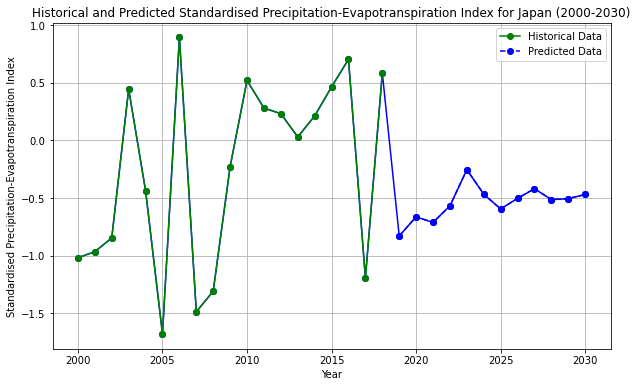

In [23]:
import matplotlib.pyplot as plt

# Function to plot historical and predicted life expectancy for a specified country
def plot_country_predictions_vs_actual(country_name):
    # Extracting predictions for the specified country
    if country_name not in country_recursive_predictions_rf:
        logger.error(f"No predictions found for {country_name}.")
        return

    predictions = country_recursive_predictions_rf[country_name]
    predicted_years = list(predictions.keys())
    predicted_values = list(predictions.values())

    # Extracting historical values for the specified country (2000-2019)
    historical_data = selected_df_3[(selected_df_3['Country Name'] == country_name) & 
                                  (selected_df_3['Year'] >= TRAIN_START_YEAR) & 
                                  (selected_df_3['Year'] <= TRAIN_END_YEAR-1)]
    historical_years = historical_data['Year'].values
    historical_values = historical_data['Standardised Precipitation-Evapotranspiration Index'].values

    # Combining historical and predicted data to ensure a continuous line
    combined_years = list(historical_years) + predicted_years
    combined_values = list(historical_values) + predicted_values

    # Plotting historical and predicted values as a single line
    plt.figure(figsize=(10, 6))
    plt.plot(combined_years, combined_values, color='blue', marker='o', linestyle='-')
    plt.plot(historical_years, historical_values, label='Historical Data', color='green', marker='o')
    plt.plot(predicted_years, predicted_values, label='Predicted Data', color='blue', marker='o', linestyle='--')
    plt.xlabel("Year")
    plt.ylabel("Standardised Precipitation-Evapotranspiration Index")
    plt.title(f"Historical and Predicted Standardised Precipitation-Evapotranspiration Index for {country_name} (2000-2030)")
    plt.legend()
    plt.grid(True)
    plt.show()

# Rerun the plotting function for Canada as an example
plot_country_predictions_vs_actual("Japan")

In [24]:
# !pip install shap

In [25]:
# Displaying feature importances from the Random Forest model directly

# Calculating feature importances
feature_importances = model_rf.feature_importances_
feature_names = ['Year', 'SPEI Moving_Avg_2Y', 'SPEI Moving_Avg_3Y', 'SPEI Moving_Avg_5Y', 'SPEI Moving_Avg_10Y']

# Creating a DataFrame to organize and sort feature importances
import pandas as pd
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the sorted feature importances
importance_df.reset_index(drop=True, inplace=True)
importance_df

,Feature,Importance
0,SPEI Moving_Avg_2Y,0.686660
1,SPEI Moving_Avg_3Y,0.091418
2,SPEI Moving_Avg_5Y,0.087941
3,SPEI Moving_Avg_10Y,0.078342
4,Year,0.055639


In [26]:
# Converting the dictionary of predictions for each country (country_recursive_predictions_rf) into a DataFrame

# Initialize an empty list to store rows for the DataFrame
rows = []

# Loop through each country and its predictions to build the DataFrame rows
for country, predictions in country_recursive_predictions_rf.items():
    for year, precip in predictions.items():
        # Append each prediction as a new row with the country, year, and predicted value
        rows.append({'Country Name': country, 'Year': year, 'Standardised Precipitation-Evapotranspiration Index': precip})

# Convert the list of rows into a DataFrame
predictions_df = pd.DataFrame(rows)

# Display the first few rows of the DataFrame
predictions_df

,Country Name,Year,Standardised Precipitation-Evapotranspiration Index
0,Afghanistan,2019,0.539834
1,Afghanistan,2020,0.460616
2,Afghanistan,2021,0.514842
3,Afghanistan,2022,0.538949
4,Afghanistan,2023,0.443789
...,...,...,...
2251,Zimbabwe,2026,-0.541994
2252,Zimbabwe,2027,-0.445342
2253,Zimbabwe,2028,-0.500907
2254,Zimbabwe,2029,-0.458883
